In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [2]:
import statsmodels.api as sm
#import dask.dataframe as dd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
from scipy import stats
import scipy
import geopandas as gpd
import urllib
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import sklearn

# AK Data

In [4]:
#Data preprocessing 
df_AK = pd.read_csv('AK.csv',index_col=None, header=0)
df_AK['sub_cat'] = df_AK['sub_cat'].fillna(0)
df_temp = df_AK[(df_AK['liv_arr'] == 'Living independently')|(df_AK['liv_arr'] == 'Living independently with ineligible spouse')]
df_temp['state_indv_sum'] = df_temp['state_indv']
temp = df_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_AK = pd.merge(left=df_AK,
              right=temp,
              how='left',
              on='year')
df_AK


year state                                            liv_arr  sub_cat  \
0   1990    AK                               Living independently      0.0   
1   1990    AK        Living independently with ineligible spouse      0.0   
2   1990    AK                     Living in household of another      0.0   
3   1990    AK  Living in household of another with ineligible...      0.0   
4   1990    AK                                  Medicaid facility      0.0   
..   ...   ...                                                ...      ...   
84  2011    AK                     Living in household of another      0.0   
85  2011    AK  Living in household of another with ineligible...      0.0   
86  2011    AK                               Assisted living home      0.0   
87  2011    AK     Assisted living home with an ineligible spouse      0.0   
88  2011    AK                                  Medicaid facility      0.0   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0       717.00     1063.0       331.0      484.0    386.00    579.0   
1       862.00        0.0       476.0        0.0    386.00      0.0   
2       594.34      883.0       337.0      497.0    257.34    386.0   
3       681.34        0.0       424.0        0.0    257.34      0.0   
4        75.00      150.0        45.0       90.0     30.00     60.0   
..         ...        ...         ...        ...       ...      ...   
84      817.34     1217.0       368.0      543.0    449.34    674.0   
85      913.34        0.0       464.0        0.0    449.34      0.0   
86      774.00     1211.0       100.0      200.0    674.00   1011.0   
87      774.00        0.0       100.0        0.0    674.00      0.0   
88       75.00      150.0        45.0       90.0     30.00     60.0   

    state_diff  state_diff_dbl  state_indv_sum  
0        153.0           False           807.0  
1       -476.0           False           807.0  
2        160.0           False           807.0  
3       -424.0           False           807.0  
4         45.0            True           807.0  
..         ...             ...             ...  
84       175.0           False           883.0  
85      -464.0           False           883.0  
86       100.0            True           883.0  
87      -100.0           False           883.0  
88        45.0            True           883.0  

[89 rows x 13 columns]

In [5]:
df1 = df_AK[(df_AK['liv_arr'] == 'Living independently')|(df_AK['liv_arr'] == 'Living independently with ineligible spouse')]
#df1.reset_index()
#df1_new = df1.drop(columns = 'index')
df1 = df1[['year','state','liv_arr','state_indv','state_cpl','state_indv_sum']] .reset_index()

In [6]:
df1_new = df1.drop(columns = ['index'])
df_AK = df1_new[df1_new['liv_arr'].isin(['Living independently'])].reset_index()
df_AK['year'].apply(str)
df_AK = df_AK.drop(columns = ['index'])
df_AK

year state               liv_arr  state_indv  state_cpl  state_indv_sum
0   1990    AK  Living independently       331.0      484.0           807.0
1   1991    AK  Living independently       349.0      510.0           851.0
2   1992    AK  Living independently       362.0      528.0           883.0
3   1994    AK  Living independently       362.0      528.0           883.0
4   1995    AK  Living independently       362.0      528.0           883.0
5   1996    AK  Living independently       362.0      528.0           883.0
6   1997    AK  Living independently       362.0      528.0           883.0
7   1998    AK  Living independently       362.0      528.0           883.0
8   1999    AK  Living independently       362.0      528.0           883.0
9   2000    AK  Living independently       362.0      528.0           883.0
10  2004    AK  Living independently       362.0      528.0           883.0
11  2005    AK  Living independently       362.0      528.0           883.0
12  2006    AK  Living independently       362.0      528.0           883.0
13  2007    AK  Living independently       362.0      528.0           883.0
14  2008    AK  Living independently       362.0      528.0           883.0
15  2011    AK  Living independently       362.0      528.0           883.0

In [7]:
import warnings

warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

In [8]:
#Anlyaze the data via linear model 
lm=sm.OLS(df_AK.state_indv_sum[:16],sm.add_constant(df_AK.year.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         state_indv_sum   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     5.809
Date:                Mon, 25 Jul 2022   Prob (F-statistic):             0.0303
Time:                        16:22:50   Log-Likelihood:                -67.436
No. Observations:                  16   AIC:                             138.9
Df Residuals:                      14   BIC:                             140.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        859.0882      8.358    102.784      0.0

Select the parameters before modeling 

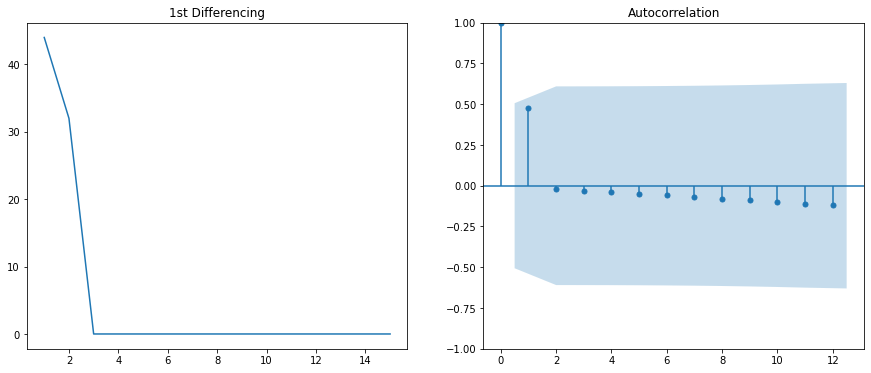

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].plot(df_AK['state_indv_sum'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df_AK['state_indv_sum'].diff().dropna(), ax=axes[1])

plt.show()

Obviously, we should choose MA(q)=1 from the above graph. 

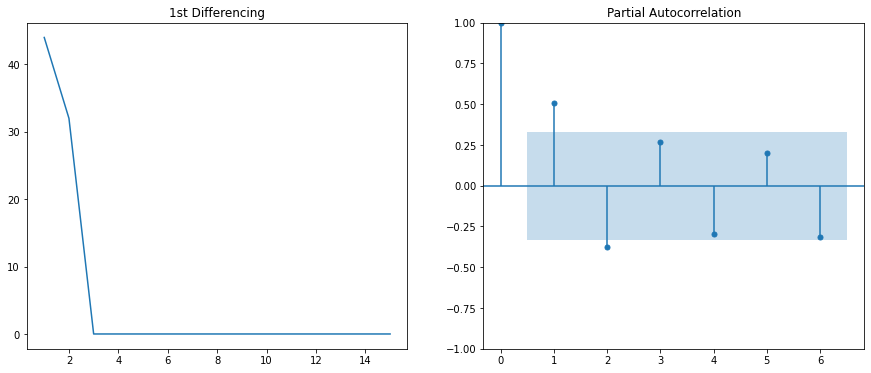

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].plot(df_AK['state_indv_sum'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df_AK['state_indv_sum'].diff().dropna(),lags=6, ax=axes[1],alpha=0.2) #plot differences between consequtive observations

plt.show()

From the above graph, we might choose AR(P)=1 OR 2 

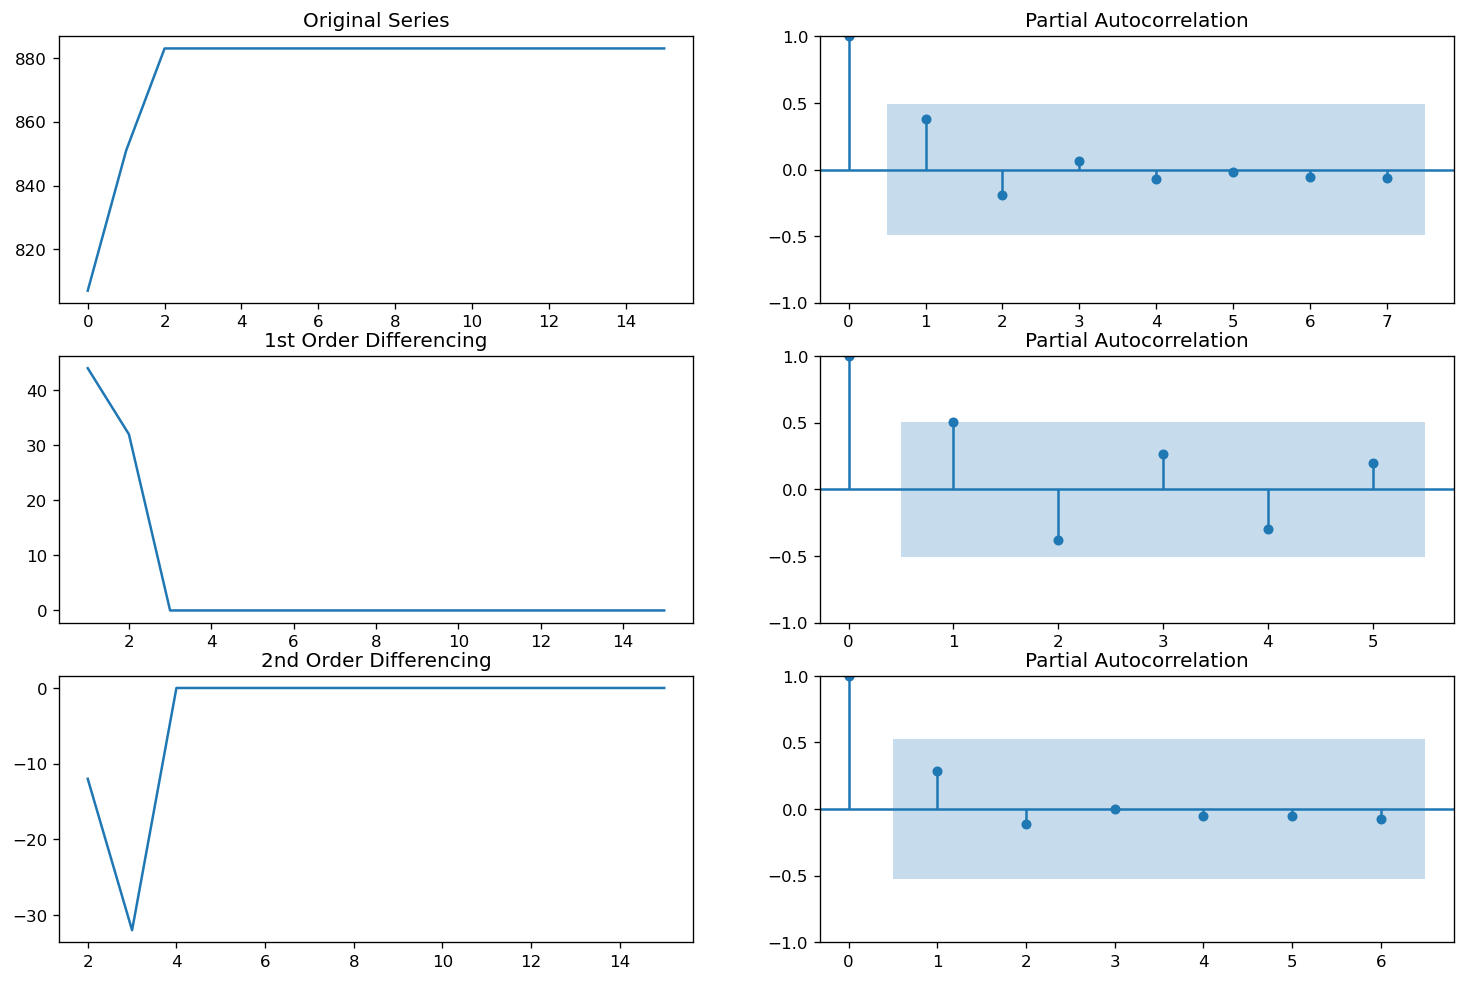

In [11]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_AK['state_indv_sum']); axes[0, 0].set_title('Original Series')
plot_pacf(df_AK['state_indv_sum'], lags=7, ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df_AK['state_indv_sum'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df_AK['state_indv_sum'].diff().dropna(),lags=5, ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(df_AK['state_indv_sum'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df_AK['state_indv_sum'].diff().diff().dropna(),lags=6, ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

From the above results, we might choose d=0 or 1, but d=1 will be appropriate in this situation. 

                               SARIMAX Results                                
Dep. Variable:         state_indv_sum   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -9789569.685
Date:                Mon, 25 Jul 2022   AIC                       19579145.370
Time:                        16:22:51   BIC                       19579146.563
Sample:                             0   HQIC                      19579144.617
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.423e-07   6.07e-08      5.635      0.000    2.23e-07    4.61e-07
ma.L1       3.422e-07   6.07e-08      5.635      0.000    2.23e-07    4.61e-07
sigma2         0.0002   2.36e-11    6.4e+06      0.0

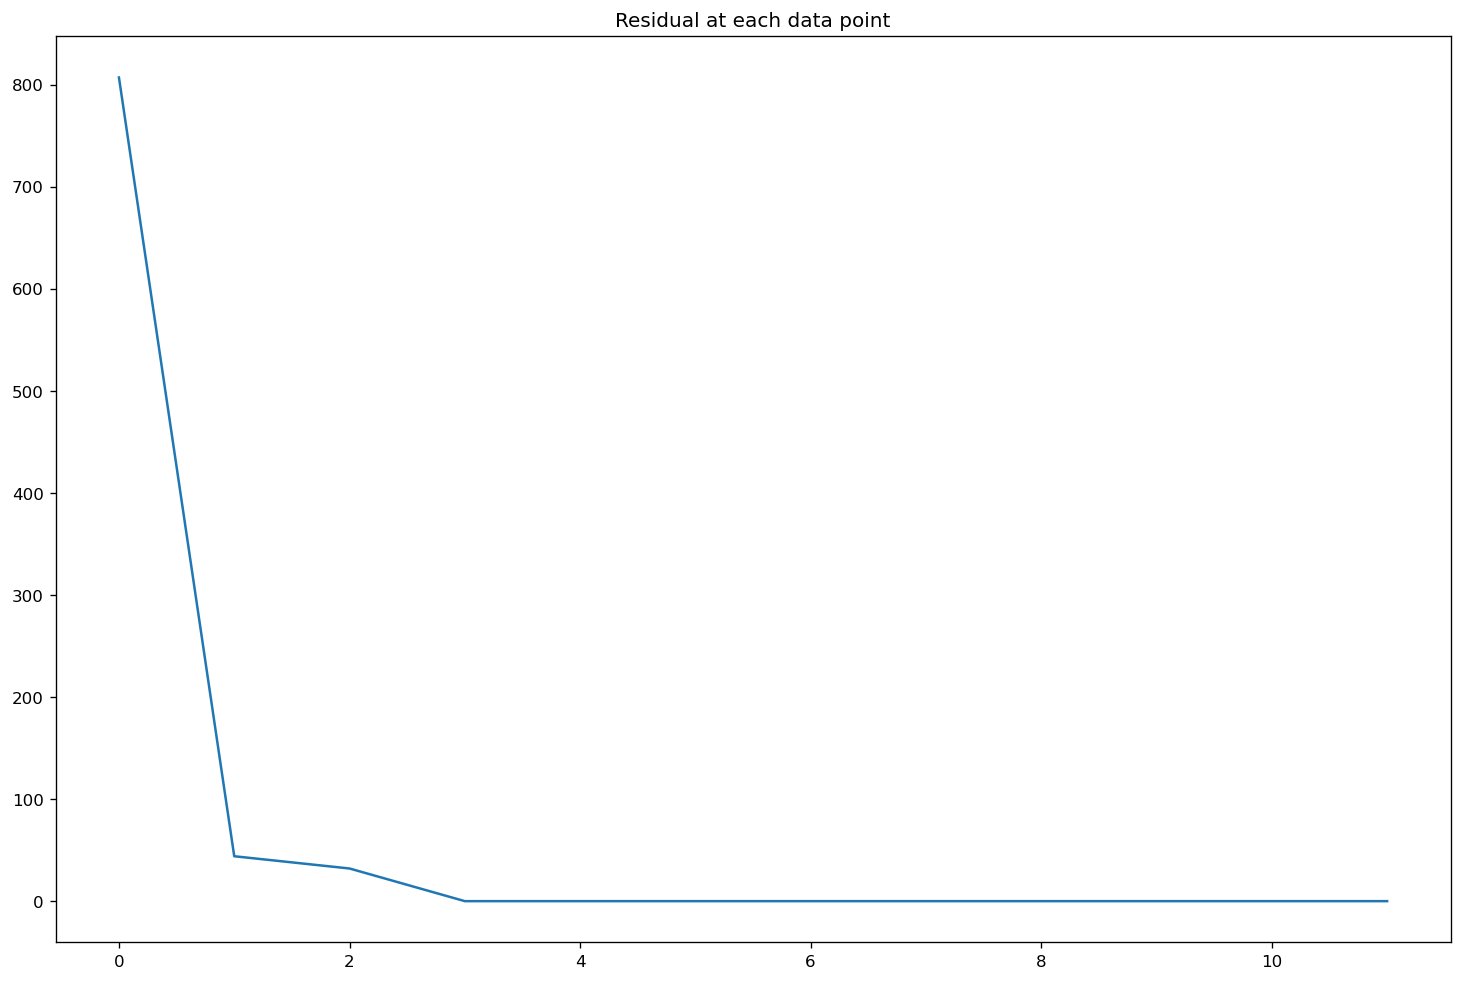

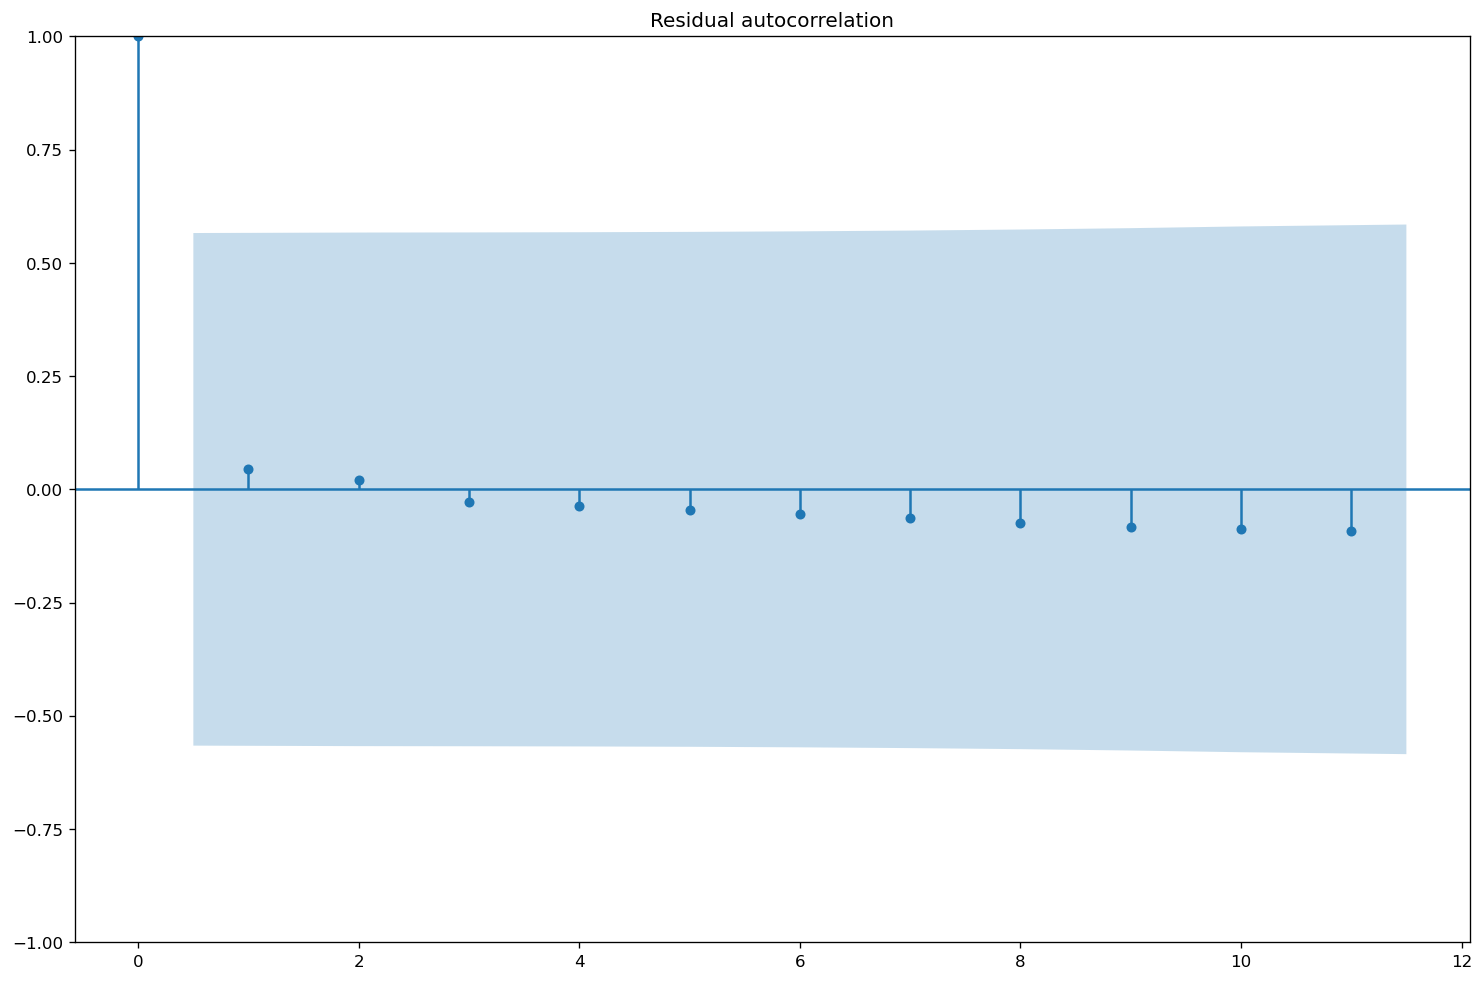

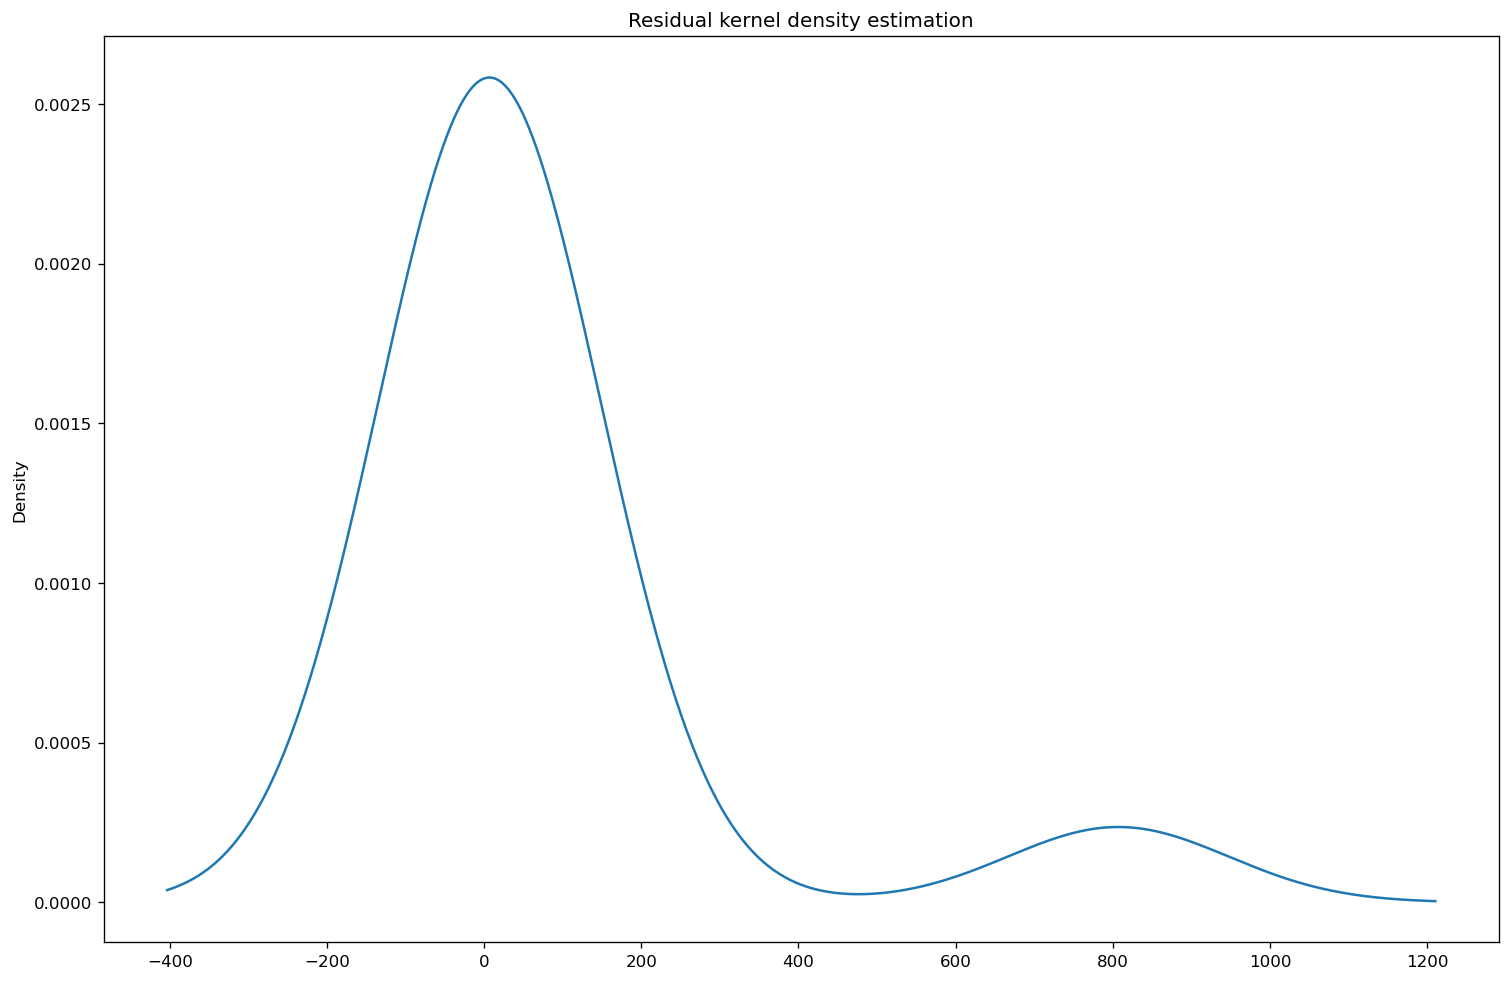

                0
count   12.000000
mean    73.583330
std    231.445050
min     -0.000014
25%      0.000000
50%      0.000000
75%      7.999992
max    807.000000
p value is  5.745440441701399e-08
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.029529   0.863564
2  0.037260   0.981542


In [12]:
#So we could use the above parameters to build the ARIMA Model, training on the 75% dataset
P=1
D=1
Q=1

# fit model
N = 12
series = df_AK['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [13]:
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_AK['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

In [14]:
Y = pd.DataFrame(range(N-1,len(df_AK)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

In [15]:
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

In [16]:
NA = 16
series = df_AK['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

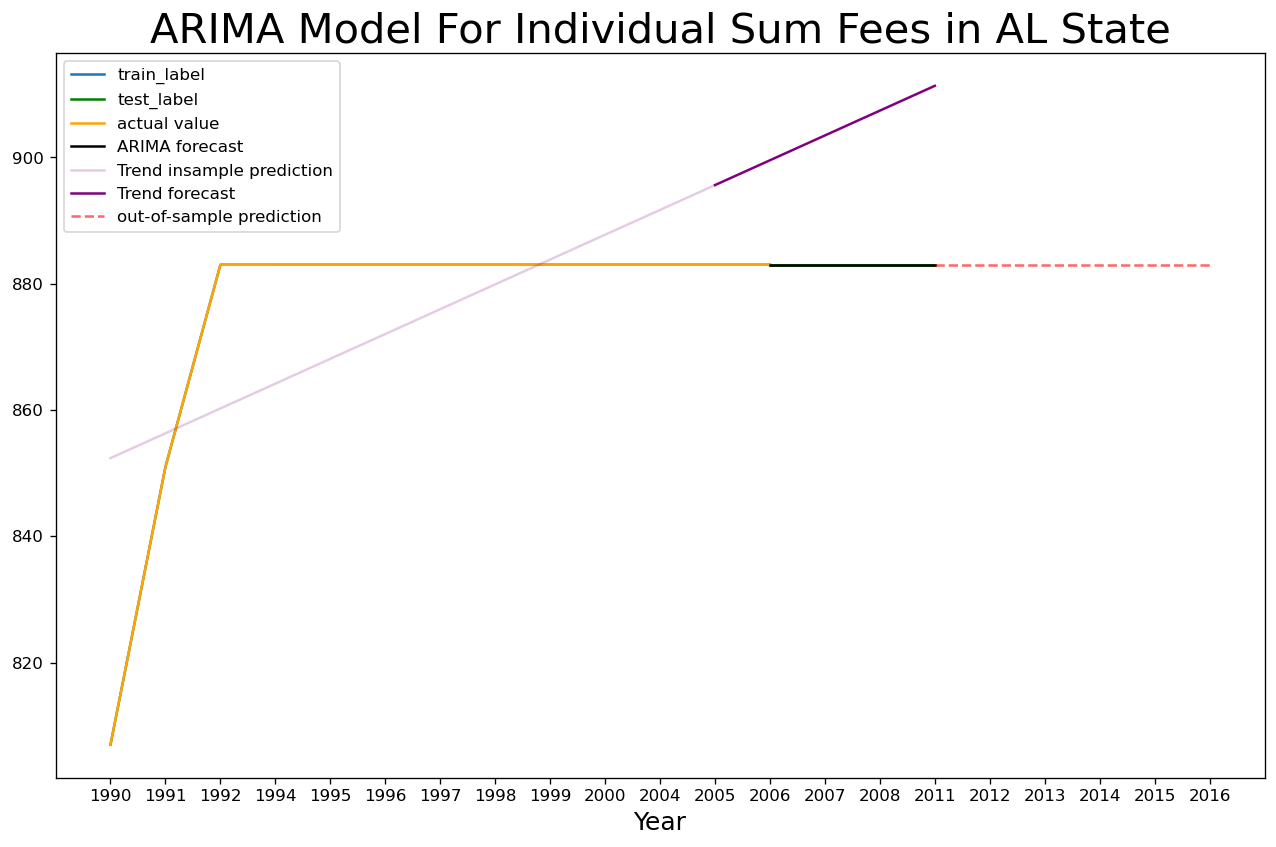

In [17]:
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_AK.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_AK.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df_AK.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='actual value') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_AK)),pred, label='Trend forecast', color='purple')

#ax.plot(df_AK.index[:NA+1],series[:NA+1],label='actual value') # train
ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_AK['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in AL State', fontsize=25)
plt.legend(loc='upper left')

# AL Data

In [18]:
#Prepocessing the data first
df2 = pd.read_csv('AL.csv',index_col=None, header=0)
df2_temp = df2[(df2['liv_arr'] == 'Receiving IHC in a private home or a personal care home')|(df2['liv_arr'] == 'Receiving IHC and support and maintenance in a private home or personal care home')]
df2_temp['state_indv_sum'] = df2_temp['state_indv']

temp = df2_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_AL = pd.merge(left=df2,
              right=temp,
              how='left',
              on='year')
df_AL


year state                                            liv_arr  sub_cat  \
0    1990    AL  Receiving IHC in a private home or a personal ...  Level A   
1    1990    AL  Receiving IHC in a private home or a personal ...  Level B   
2    1990    AL  Receiving IHC and support and maintenance in a...  Level A   
3    1990    AL  Receiving IHC and support and maintenance in a...  Level B   
4    1990    AL  Receiving specialized IHC in a private home or...      NaN   
..    ...   ...                                                ...      ...   
123  2011    AL  Receiving IHC and support and maintenance in a...  Level B   
124  2011    AL  Receiving specialized IHC in a private home or...      NaN   
125  2011    AL  Receiving specialized IHC and support and main...      NaN   
126  2011    AL  Living in foster home with IHC or specialized IHC      NaN   
127  2011    AL          Living in cerebral palsy treatment center      NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        446.00      699.0        60.0      120.0    386.00    579.0   
1        442.00      691.0        56.0      112.0    386.00    579.0   
2        317.34      506.0        60.0      120.0    257.34    386.0   
3        313.34      498.0        56.0      112.0    257.34    386.0   
4        446.00      699.0        60.0      120.0    386.00    579.0   
..          ...        ...         ...        ...       ...      ...   
123      505.34      786.0        56.0      112.0    449.34    674.0   
124      734.00     1131.0        60.0      120.0    674.00   1011.0   
125      509.34      794.0        60.0      120.0    449.34    674.0   
126      784.00     1231.0       110.0      220.0    674.00   1011.0   
127      870.00     1403.0       196.0      392.0    674.00   1011.0   

     state_diff  state_diff_dbl  state_indv_sum  
0          60.0            True           232.0  
1          56.0            True           232.0  
2          60.0            True           232.0  
3          56.0            True           232.0  
4          60.0            True           232.0  
..          ...             ...             ...  
123        56.0            True           232.0  
124        60.0            True           232.0  
125        60.0            True           232.0  
126       110.0            True           232.0  
127       196.0            True           232.0  

[128 rows x 13 columns]

In [19]:
df2 = df_AL[(df_AL['liv_arr'] == 'Receiving IHC in a private home or a personal care home')|(df_AL['liv_arr'] == 'Receiving IHC and support and maintenance in a private home or personal care home')]
df2 = df2[['year','state','liv_arr','state_indv','state_indv_sum']] .reset_index()
df2_new = df2.drop(columns = ['index'])
df_AL = df2_new[df2_new['liv_arr'].isin(['Receiving IHC in a private home or a personal care home'])].reset_index()

df_AL = df_AL.drop(columns = ['index'])
df_AL['year'] = df_AL['year'].apply(str)
df_AL

year state                                            liv_arr  state_indv  \
0   1990    AL  Receiving IHC in a private home or a personal ...        60.0   
1   1990    AL  Receiving IHC in a private home or a personal ...        56.0   
2   1991    AL  Receiving IHC in a private home or a personal ...        60.0   
3   1991    AL  Receiving IHC in a private home or a personal ...        56.0   
4   1992    AL  Receiving IHC in a private home or a personal ...        60.0   
5   1992    AL  Receiving IHC in a private home or a personal ...        56.0   
6   1994    AL  Receiving IHC in a private home or a personal ...        60.0   
7   1994    AL  Receiving IHC in a private home or a personal ...        56.0   
8   1995    AL  Receiving IHC in a private home or a personal ...        60.0   
9   1995    AL  Receiving IHC in a private home or a personal ...        56.0   
10  1996    AL  Receiving IHC in a private home or a personal ...        60.0   
11  1996    AL  Receiving IHC in a private home or a personal ...        56.0   
12  1997    AL  Receiving IHC in a private home or a personal ...        60.0   
13  1997    AL  Receiving IHC in a private home or a personal ...        56.0   
14  1998    AL  Receiving IHC in a private home or a personal ...        60.0   
15  1998    AL  Receiving IHC in a private home or a personal ...        56.0   
16  1999    AL  Receiving IHC in a private home or a personal ...        60.0   
17  1999    AL  Receiving IHC in a private home or a personal ...        56.0   
18  2000    AL  Receiving IHC in a private home or a personal ...        60.0   
19  2000    AL  Receiving IHC in a private home or a personal ...        56.0   
20  2004    AL  Receiving IHC in a private home or a personal ...        60.0   
21  2004    AL  Receiving IHC in a private home or a personal ...        56.0   
22  2005    AL  Receiving IHC in a private home or a personal ...        60.0   
23  2005    AL  Receiving IHC in a private home or a personal ...        56.0   
24  2006    AL  Receiving IHC in a private home or a personal ...        60.0   
25  2006    AL  Receiving IHC in a private home or a personal ...        56.0   
26  2007    AL  Receiving IHC in a private home or a personal ...        60.0   
27  2007    AL  Receiving IHC in a private home or a personal ...        56.0   
28  2008    AL  Receiving IHC in a private home or a personal ...        60.0   
29  2008    AL  Receiving IHC in a private home or a personal ...        56.0   
30  2011    AL  Receiving IHC in a private home or a personal ...        60.0   
31  2011    AL  Receiving IHC in a private home or a personal ...        56.0   

    state_indv_sum  
0            232.0  
1            232.0  
2            232.0  
3            232.0  
4            232.0  
5            232.0  
6            232.0  
7            232.0  
8            232.0  
9            232.0  
10           232.0  
11           232.0  
12           232.0  
13           232.0  
14           232.0  
15           232.0  
16           232.0  
17           232.0  
18           232.0  
19           232.0  
20           232.0  
21           232.0  
22           232.0  
23           232.0  
24           232.0  
25           232.0  
26           232.0  
27           232.0  
28           232.0  
29           232.0  
30           232.0  
31           232.0

In [20]:
t0 = df_AL.shape[0]  # number of rows
df_AL = df_AL.iloc[0:t0:2, :].reset_index()  # use iloc to slice
df_AL= df_AL.drop(columns = ['index'])


In [21]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_AL['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()

In [22]:
#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_AL['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_AL)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

In [23]:
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_AL['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

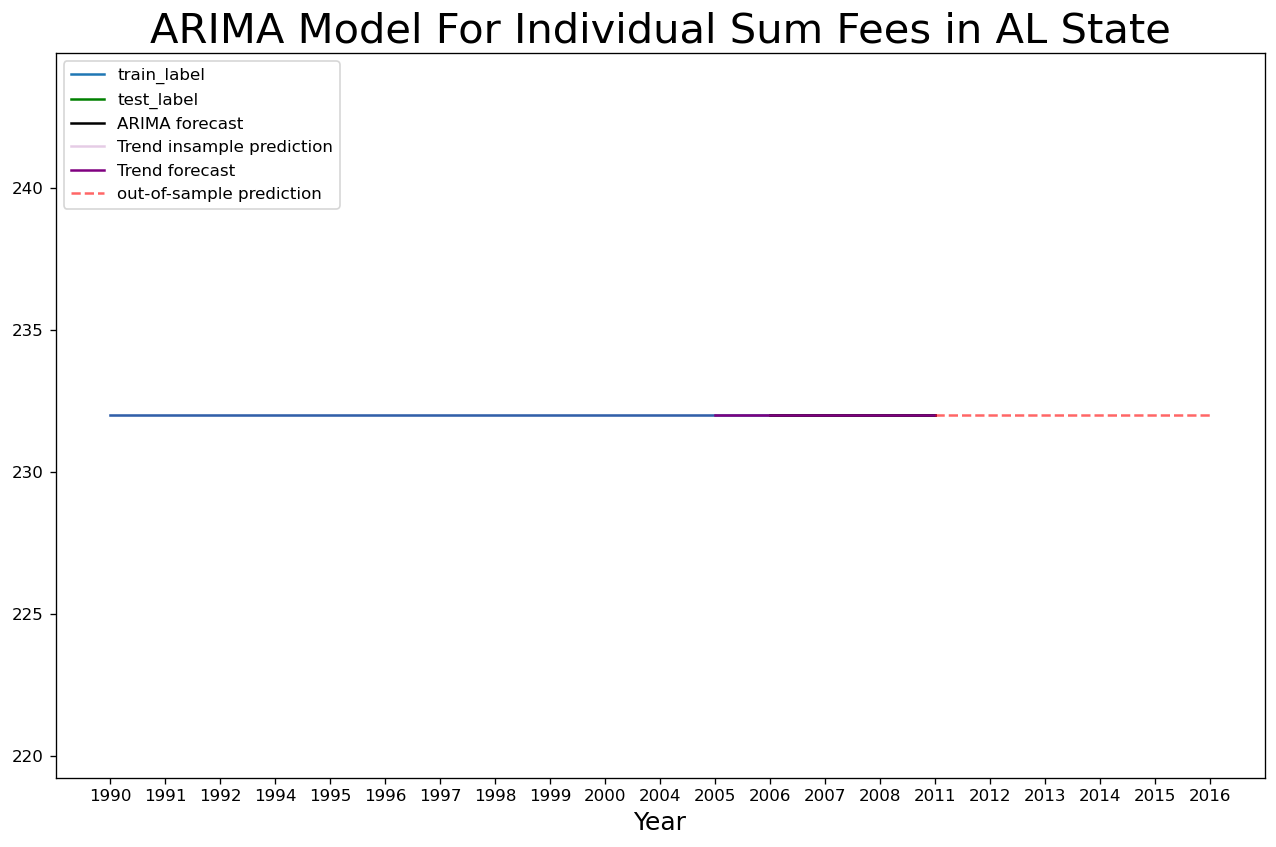

In [24]:
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_AL.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_AL.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_AL)),pred, label='Trend forecast', color='purple')

#ax.plot(df_AK.index[:NA+1],series[:NA+1],label='actual value') # train
ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_AL['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in AL State', fontsize=25)
plt.legend(loc='upper left')

# CA Data

In [25]:
df3 = pd.read_csv('CA.csv',index_col=None, header=0)
df3_temp = df3[(df3['liv_arr'] == 'Independent living with cooking facilities')]
df3_temp['state_indv_sum'] = df3_temp['state_indv']
temp = df3_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_CA = pd.merge(left=df3,
              right=temp,
              how='left',
              on='year')
df_CA

year state                                            liv_arr  \
0    1990    CA         Independent living with cooking facilities   
1    1990    CA         Independent living with cooking facilities   
2    1990    CA                        Nonmedical out-of-home care   
3    1990    CA      Independent living without cooking facilities   
4    1990    CA                     Living in household of another   
..    ...   ...                                                ...   
157  2011    CA                     Living in household of another   
158  2011    CA  Disabled minor in home of parent/guardian/rela...   
159  2011    CA  Nonmedical out-of-home care living in househol...   
160  2011    CA         Disabled minor in the household of another   
161  2011    CA                                  Medicaid facility   

               sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  \
0    Aged and disabled      630.00    1167.00      244.00     588.00   
1                Blind      704.00    1372.00      318.00     793.00   
2                  NaN      709.00    1418.00      323.00     839.00   
3    Aged and disabled      698.00    1303.00      312.00     724.00   
4    Aged and disabled      501.34     974.00      244.00     588.00   
..                 ...         ...        ...         ...        ...   
157              Blind      718.32    1222.33      268.98     548.33   
158                NaN      739.00       0.00       65.00       0.00   
159                NaN      856.34    1719.66      407.00    1045.66   
160                NaN      517.30       0.00       67.96       0.00   
161                NaN       50.00     100.00       20.00      40.00   

     fed_indv  fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0      386.00   923.00      344.00           False           562.0  
1      386.00  1054.00      475.00           False           562.0  
2      386.00  1095.00      516.00           False           562.0  
3      386.00   991.00      412.00           False           562.0  
4      257.34   730.00      344.00           False           562.0  
..        ...      ...         ...             ...             ...  
157    449.34   953.35      279.35           False           405.0  
158    674.00   -65.00      -65.00           False           405.0  
159    449.34  1312.66      638.66           False           405.0  
160    449.34   -67.96      -67.96           False           405.0  
161     30.00    80.00       20.00            True           405.0  

[162 rows x 13 columns]

In [26]:
df_CA=df_CA[(df_CA['liv_arr'] == 'Living in household of another')|(df_CA['liv_arr'] == 'Independent living with cooking facilities')].reset_index()
df3 = df_CA[['year','state','liv_arr','state_indv','state_indv_sum']] .reset_index()
df3['year'] = df3['year'].apply(str)
df_CA = df3.drop(columns = ['index'])

df_CA = df_CA[(df_CA['liv_arr'] == 'Living in household of another')]
t0 = df_CA.shape[0]  # number of rows
df_CA = df_CA.iloc[0:t0:2, :].reset_index()
df_CA = df_CA.drop(columns = ['index'])
df_CA    

year state                         liv_arr  state_indv  state_indv_sum
0   1990    CA  Living in household of another      244.00           562.0
1   1991    CA  Living in household of another      230.00           520.0
2   1992    CA  Living in household of another      230.00           520.0
3   1994    CA  Living in household of another      179.43           381.8
4   1995    CA  Living in household of another      168.46           367.8
5   1996    CA  Living in household of another      159.83           367.8
6   1997    CA  Living in household of another      159.83           367.8
7   1998    CA  Living in household of another      168.46           367.8
8   1999    CA  Living in household of another      183.66           408.0
9   2000    CA  Living in household of another      187.66           417.0
10  2004    CA  Living in household of another      227.00           516.0
11  2005    CA  Living in household of another      227.00           516.0
12  2006    CA  Living in household of another      218.00           483.0
13  2007    CA  Living in household of another      234.00           531.0
14  2008    CA  Living in household of another      234.00           531.0
15  2011    CA  Living in household of another      190.32           405.0

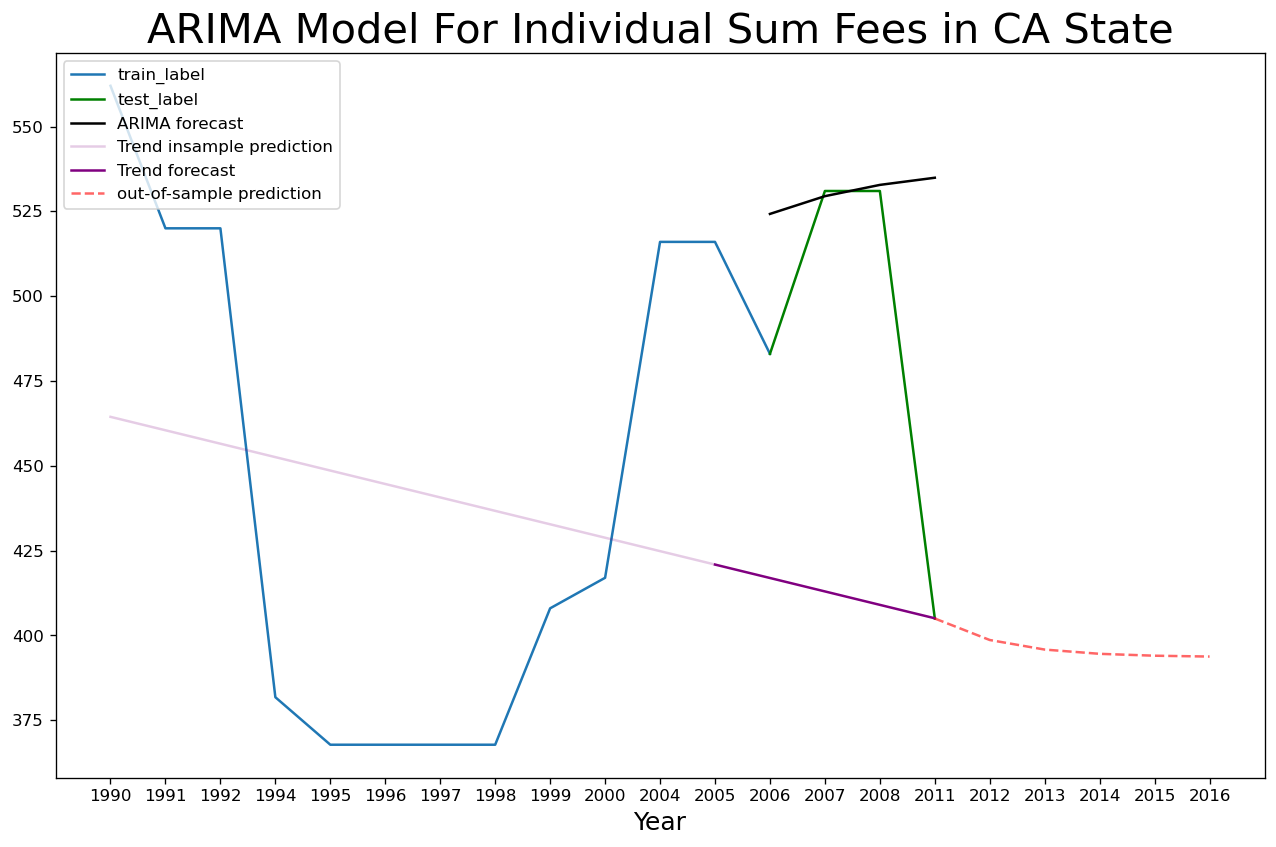

In [27]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_CA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_CA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_CA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_CA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_CA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_CA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_CA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_CA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in CA State', fontsize=25)
plt.legend(loc='upper left')

# CO Data

In [28]:
#Prepocessing the data first
df4 = pd.read_csv('CO.csv',index_col=None, header=0)
df4_temp = df4[(df4['liv_arr'] == 'Living independently or in the home of another')|(df4['liv_arr'] == 'Living independently')|(df4['liv_arr'] =='Individual with essential spouse')]
df4_temp['state_indv_sum'] = df4_temp['state_indv']
#df2_temp['state_cpl_sum'] = df_temp['state_cpl']
df4_temp

year state                                         liv_arr  \
0   1990    CO  Living independently or in the home of another   
1   1990    CO                            Living independently   
5   1990    CO                Individual with essential spouse   
6   1991    CO  Living independently or in the home of another   
7   1991    CO                            Living independently   
11  1991    CO                Individual with essential spouse   
12  1992    CO  Living independently or in the home of another   
13  1992    CO                            Living independently   
17  1992    CO                Individual with essential spouse   
18  1994    CO  Living independently or in the home of another   
19  1994    CO                            Living independently   
23  1994    CO                Individual with essential spouse   
24  1995    CO  Living independently or in the home of another   
25  1995    CO                            Living independently   
29  1995    CO                Individual with essential spouse   
30  1996    CO  Living independently or in the home of another   
31  1996    CO                            Living independently   
35  1996    CO                Individual with essential spouse   
36  1997    CO  Living independently or in the home of another   
37  1997    CO                            Living independently   
41  1997    CO                Individual with essential spouse   
42  1998    CO  Living independently or in the home of another   
43  1998    CO                            Living independently   
47  1998    CO                Individual with essential spouse   
48  1999    CO  Living independently or in the home of another   
49  1999    CO                            Living independently   
53  1999    CO                Individual with essential spouse   
54  2000    CO  Living independently or in the home of another   
55  2000    CO                            Living independently   
59  2000    CO                Individual with essential spouse   
60  2004    CO  Living independently or in the home of another   
64  2005    CO  Living independently or in the home of another   
68  2006    CO  Living independently or in the home of another   
72  2007    CO  Living independently or in the home of another   
76  2008    CO  Living independently or in the home of another   
80  2011    CO  Living independently or in the home of another   

           sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  \
0             Aged       444.0      888.0        54.0      309.0     390.0   
1   Blind/Disabled       390.0      770.0         4.0      191.0     386.0   
5   Blind/Disabled       514.0        0.0       128.0        0.0     386.0   
6             Aged       452.0      904.0        45.0      294.0     407.0   
7   Blind/Disabled       407.0      814.0         0.0      204.0     407.0   
11  Blind/Disabled       535.0        0.0       128.0        0.0     407.0   
12            Aged       478.0      956.0        56.0      323.0     422.0   
13  Blind/Disabled       422.0      844.0         0.0      211.0     422.0   
17  Blind/Disabled       550.0        0.0       128.0        0.0     422.0   
18            Aged       502.0      992.0        56.0      323.0     446.0   
19  Blind/Disabled       446.0      880.0         0.0      211.0     446.0   
23  Blind/Disabled       574.0        0.0       128.0        0.0     446.0   
24            Aged       514.0     1010.0        56.0      323.0     458.0   
25  Blind/Disabled       458.0      898.0         0.0      211.0     458.0   
29  Blind/Disabled       586.0        0.0       128.0        0.0     458.0   
30            Aged       526.0     1028.0        56.0      323.0     470.0   
31  Blind/Disabled       470.0      916.0         0.0      211.0     470.0   
35  Blind/Disabled       598.0        0.0       128.0        0.0     470.0   
36            Aged       546.0     1072.0        62.0      346.0     484.0   
3

In [29]:
temp = df4_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_CO = pd.merge(left=df4,
              right=temp,
              how='left',
              on='year')
df_CO

year state                                         liv_arr  \
0   1990    CO  Living independently or in the home of another   
1   1990    CO                            Living independently   
2   1990    CO                               Adult foster care   
3   1990    CO                                       Home care   
4   1990    CO                                       Home care   
..   ...   ...                                             ...   
79  2008    CO                                       Home care   
80  2011    CO  Living independently or in the home of another   
81  2011    CO                               Adult foster care   
82  2011    CO                                       Home care   
83  2011    CO                                       Home care   

           sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  \
0             Aged      444.00      888.0       54.00      309.0     390.0   
1   Blind/Disabled      390.00      770.0        4.00      191.0     386.0   
2   Blind/Disabled      581.00        0.0      195.00        0.0     386.0   
3             Aged      763.00        0.0      377.00        0.0     386.0   
4   Blind/Disabled      709.00        0.0      323.00        0.0     386.0   
..             ...         ...        ...         ...        ...       ...   
79  Blind/Disabled     1101.15        0.0      464.15        0.0     637.0   
80            Aged      699.00     1398.0       25.00      387.0     674.0   
81  Blind/Disabled     1250.00     2500.0      551.00     1489.0     699.0   
82            Aged     1174.00        0.0      475.00        0.0     699.0   
83  Blind/Disabled     1174.00        0.0      475.00        0.0     699.0   

    fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0     579.0      255.00           False           186.0  
1     579.0      187.00           False           186.0  
2       0.0     -195.00           False           186.0  
3       0.0     -377.00           False           186.0  
4       0.0     -323.00           False           186.0  
..      ...         ...             ...             ...  
79      0.0     -464.15           False            25.0  
80   1011.0      362.00           False            25.0  
81   1011.0      938.00           False            25.0  
82      0.0     -475.00           False            25.0  
83      0.0     -475.00           False            25.0  

[84 rows x 13 columns]

In [30]:
df4 = df_CO[(df_CO['liv_arr'] == 'Living independently or in the home of another')|(df_CO['liv_arr'] == 'Living independently')|(df_CO['liv_arr'] =='Individual with essential spouse')]
df4 = df4[['year','state','liv_arr','state_indv','state_cpl','state_indv_sum']].reset_index()
df4_new = df4.drop(columns = ['index'])
df_CO = df4_new[df4_new['liv_arr'].isin(['Living independently or in the home of another'])].reset_index()
df_CO['year'].apply(str)
df_CO = df_CO.drop(columns = ['index'])
df_CO

year state                                         liv_arr  state_indv  \
0   1990    CO  Living independently or in the home of another        54.0   
1   1991    CO  Living independently or in the home of another        45.0   
2   1992    CO  Living independently or in the home of another        56.0   
3   1994    CO  Living independently or in the home of another        56.0   
4   1995    CO  Living independently or in the home of another        56.0   
5   1996    CO  Living independently or in the home of another        56.0   
6   1997    CO  Living independently or in the home of another        62.0   
7   1998    CO  Living independently or in the home of another        39.0   
8   1999    CO  Living independently or in the home of another        36.0   
9   2000    CO  Living independently or in the home of another        36.0   
10  2004    CO  Living independently or in the home of another        37.0   
11  2005    CO  Living independently or in the home of another        25.0   
12  2006    CO  Living independently or in the home of another        25.0   
13  2007    CO  Living independently or in the home of another        25.0   
14  2008    CO  Living independently or in the home of another        25.0   
15  2011    CO  Living independently or in the home of another        25.0   

    state_cpl  state_indv_sum  
0       309.0           186.0  
1       294.0           173.0  
2       323.0           184.0  
3       323.0           184.0  
4       323.0           184.0  
5       323.0           184.0  
6       346.0           195.0  
7       345.0           172.0  
8       321.0           266.0  
9       327.0           293.0  
10      347.0            37.0  
11      339.0            25.0  
12      352.0            25.0  
13      362.0            25.0  
14      368.0            25.0  
15      387.0            25.0

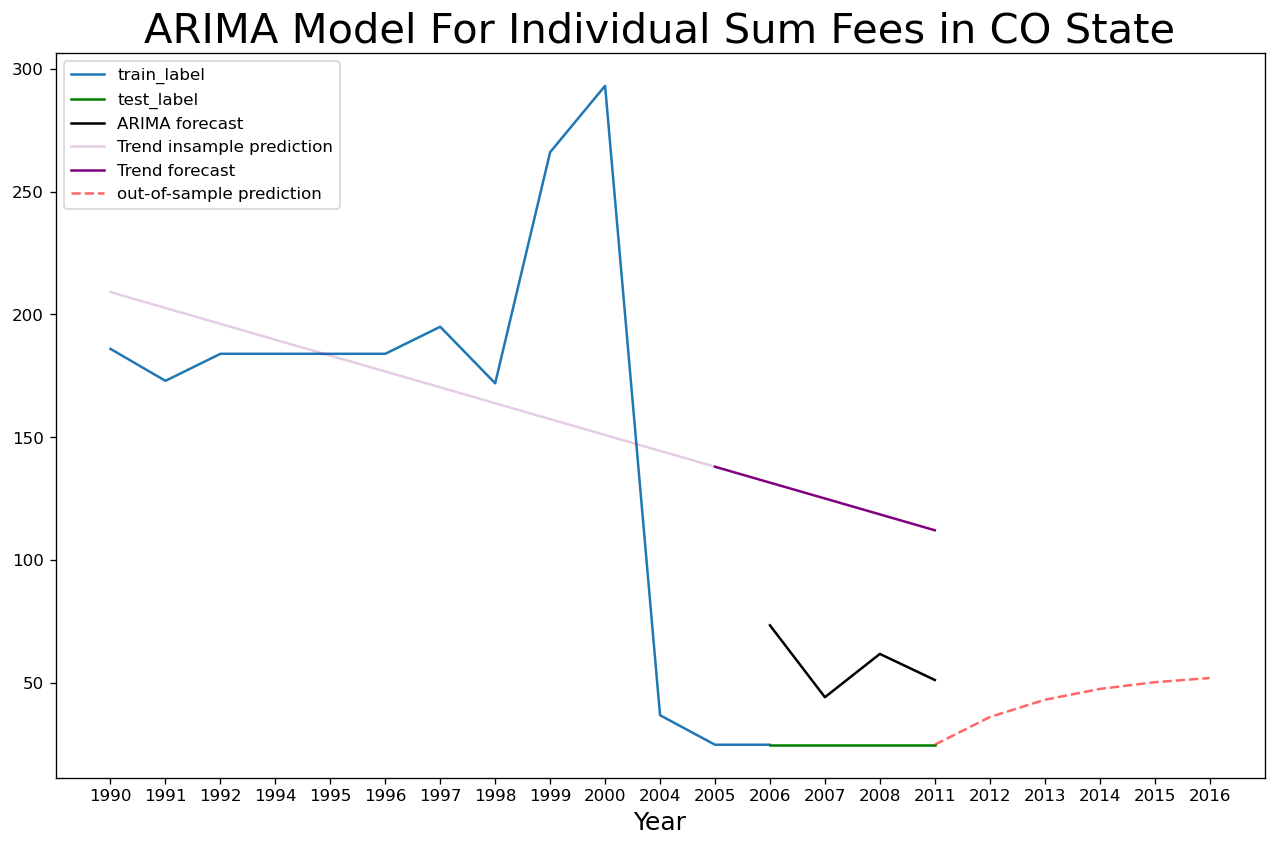

In [31]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_CO['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()

#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_CO['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_CO)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_CO['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_CO.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_CO.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_CO)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_CO['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in CO State', fontsize=25)
plt.legend(loc='upper left')

# CT Data

In [32]:
#Prepocessing the data first
df5 = pd.read_csv('CT.csv',index_col=None, header=0)
df5_temp = df5[(df5['liv_arr'] == 'Independent community living')]
df5_temp['state_indv_sum'] = df5_temp['state_indv']

temp = df5_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_CT = pd.merge(left=df5,
              right=temp,
              how='left',
              on='year')
df_CT

year state                           liv_arr  sub_cat  combn_indv  \
0   1990    CT      Independent community living      NaN       752.0   
1   1991    CT      Independent community living      NaN       766.0   
2   1992    CT      Independent community living      NaN       747.1   
3   1994    CT      Independent community living      NaN       747.1   
4   1995    CT      Independent community living      NaN       747.0   
5   1996    CT      Independent community living      NaN       747.0   
6   1997    CT      Independent community living      NaN       747.0   
7   1998    CT      Independent community living      NaN       747.0   
8   1998    CT  Licensed room and board facility      NaN       494.0   
9   1999    CT      Independent community living      NaN       747.0   
10  1999    CT  Licensed room and board facility      NaN       500.0   
11  1999    CT                 Medicaid facility      NaN        50.0   
12  2000    CT      Independent community living      NaN       747.0   
13  2000    CT  Licensed room and board facility      NaN       512.0   
14  2000    CT                 Medicaid facility      NaN        51.0   
15  2004    CT      Independent community living      NaN       747.0   
16  2004    CT  Licensed room and board facility      NaN       564.0   
17  2004    CT                 Medicaid facility      NaN        56.0   
18  2005    CT      Independent community living      NaN       747.0   
19  2005    CT  Licensed room and board facility      NaN       579.0   
20  2005    CT                 Medicaid facility      NaN        57.0   
21  2006    CT      Independent community living      NaN       771.0   
22  2006    CT  Licensed room and board facility      NaN       603.0   
23  2006    CT                 Medicaid facility      NaN        59.0   
24  2007    CT      Independent community living      NaN       791.0   
25  2007    CT  Licensed room and board facility      NaN       623.0   
26  2007    CT                 Medicaid facility      NaN        61.0   
27  2008    CT      Independent community living      NaN       805.0   
28  2008    CT  Licensed room and board facility      NaN       637.0   
29  2008    CT                 Medicaid facility      NaN        63.0   
30  2011    CT      Independent community living      NaN       842.0   
31  2011    CT  Licensed room and board facility      NaN       674.0   
32  2011    CT                 Medicaid facility      NaN        69.0   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      1104.0       366.0      525.0     386.0    579.0       159.0   
1      1132.0       359.0      522.0     407.0    610.0       163.0   
2      1094.2       325.1      461.2     422.0    633.0       136.1   
3      1094.2       301.1      425.2     446.0    669.0       124.1   
4      1093.0       289.0      406.0     458.0    687.0       117.0   
5      1094.0       277.0      389.0     470.0    705.0       112.0   
6      1094.0       263.0      368.0     484.0    726.0       105.0   
7      1094.0       253.0      353.0     494.0    741.0       100.0   
8       741.0         0.0        0.0     494.0    741.0         0.0   
9      1094.0       247.0      343.0     500.0    751.0        96.0   
10      751.0         0.0        0.0     500.0    751.0         0.0   
11      100.0        20.0       40.0      30.0     60.0        20.0   
12     1094.0       235.0      325.0     512.0    769.0        90.0   
13      769.0         0.0        0.0     512.0    769.0         0.0   
14      102.0        21.0       42.0      30.0     60.0        21.0   
15     1096.0       183.0      250.0     564.0    846.0        67.0   
16      846.0         0.0        0.0     564.0    846.0         0.0   
17      112.0        26.0       52.0      30.0     60.0        26.0   
18     1096.0       168.0      227.0     579.0    869.0        59.0   
19      869.0         0.0        0.0     579.0    869.0         0.0   
20      114.0        27.0     

In [33]:
df_CT=df_CT[(df_CT['liv_arr'] == 'Independent community living')].reset_index()
df5 = df_CT[['year','state','liv_arr','state_indv','state_indv_sum']] .reset_index()
df5['year'] = df5['year'].apply(str)
df_CT = df5.drop(columns = ['index'])
df_CT

year state                       liv_arr  state_indv  state_indv_sum
0   1990    CT  Independent community living       366.0           366.0
1   1991    CT  Independent community living       359.0           359.0
2   1992    CT  Independent community living       325.1           325.1
3   1994    CT  Independent community living       301.1           301.1
4   1995    CT  Independent community living       289.0           289.0
5   1996    CT  Independent community living       277.0           277.0
6   1997    CT  Independent community living       263.0           263.0
7   1998    CT  Independent community living       253.0           253.0
8   1999    CT  Independent community living       247.0           247.0
9   2000    CT  Independent community living       235.0           235.0
10  2004    CT  Independent community living       183.0           183.0
11  2005    CT  Independent community living       168.0           168.0
12  2006    CT  Independent community living       168.0           168.0
13  2007    CT  Independent community living       168.0           168.0
14  2008    CT  Independent community living       168.0           168.0
15  2011    CT  Independent community living       168.0           168.0

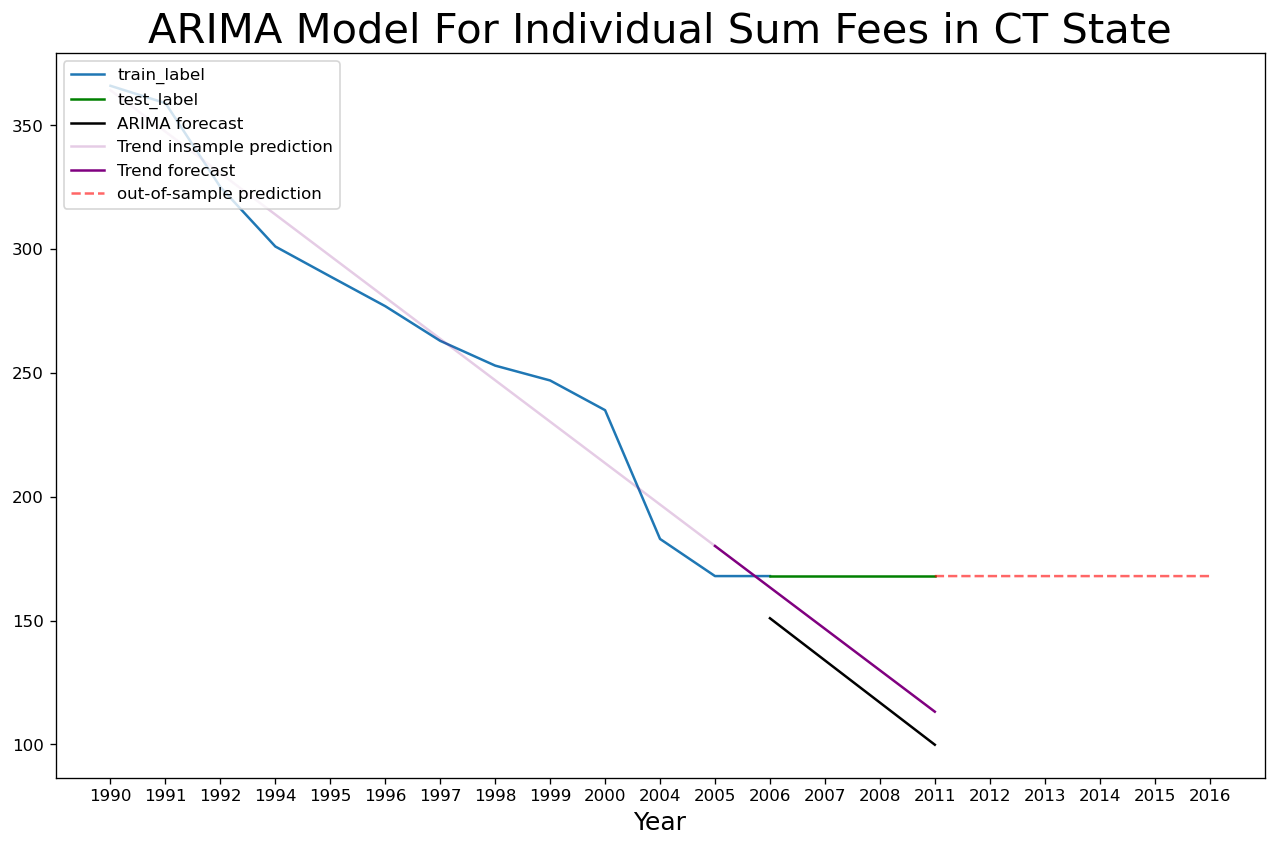

In [34]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_CT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_CT['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_CT)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_CT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))


#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_CT.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_CT.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_CT)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_CT['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in CT State', fontsize=25)
plt.legend(loc='upper left')

# DC Data

In [35]:
df6 = pd.read_csv('DC.csv',index_col=None, header=0)
df6_temp = df6[(df6['liv_arr'] == 'Adult foster care home')|(df6['liv_arr'] == 'Medicaid facility')]
df6_temp['state_indv_sum'] = df6_temp['state_indv']

temp = df6_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_DC = pd.merge(left=df6,
              right=temp,
              how='left',
              on='year')
df_DC=df_DC[(df_DC['liv_arr'] == 'Medicaid facility')].reset_index()
df6 = df_DC[['year','state','liv_arr','state_indv','state_indv_sum']] .reset_index()
df6['year'] = df6['year'].apply(str)
df_DC = df6.drop(columns = ['index'])
df_DC

year state            liv_arr  state_indv  state_indv_sum
0   1990    DC  Medicaid facility        30.0           434.4
1   1991    DC  Medicaid facility        30.0           434.4
2   1992    DC  Medicaid facility        40.0           444.4
3   1994    DC  Medicaid facility        40.0           444.4
4   1995    DC  Medicaid facility        40.0           444.4
5   1996    DC  Medicaid facility        40.0           444.4
6   1997    DC  Medicaid facility        40.0           684.0
7   1998    DC  Medicaid facility        40.0           684.0
8   1999    DC  Medicaid facility        40.0           764.0
9   2000    DC  Medicaid facility        40.0           764.0
10  2004    DC  Medicaid facility        40.0           764.0
11  2005    DC  Medicaid facility        40.0           844.0
12  2006    DC  Medicaid facility        40.0           844.0
13  2007    DC  Medicaid facility        40.0          1120.0
14  2008    DC  Medicaid facility        40.0          1120.0
15  2011    DC  Medicaid facility        40.0          1120.0

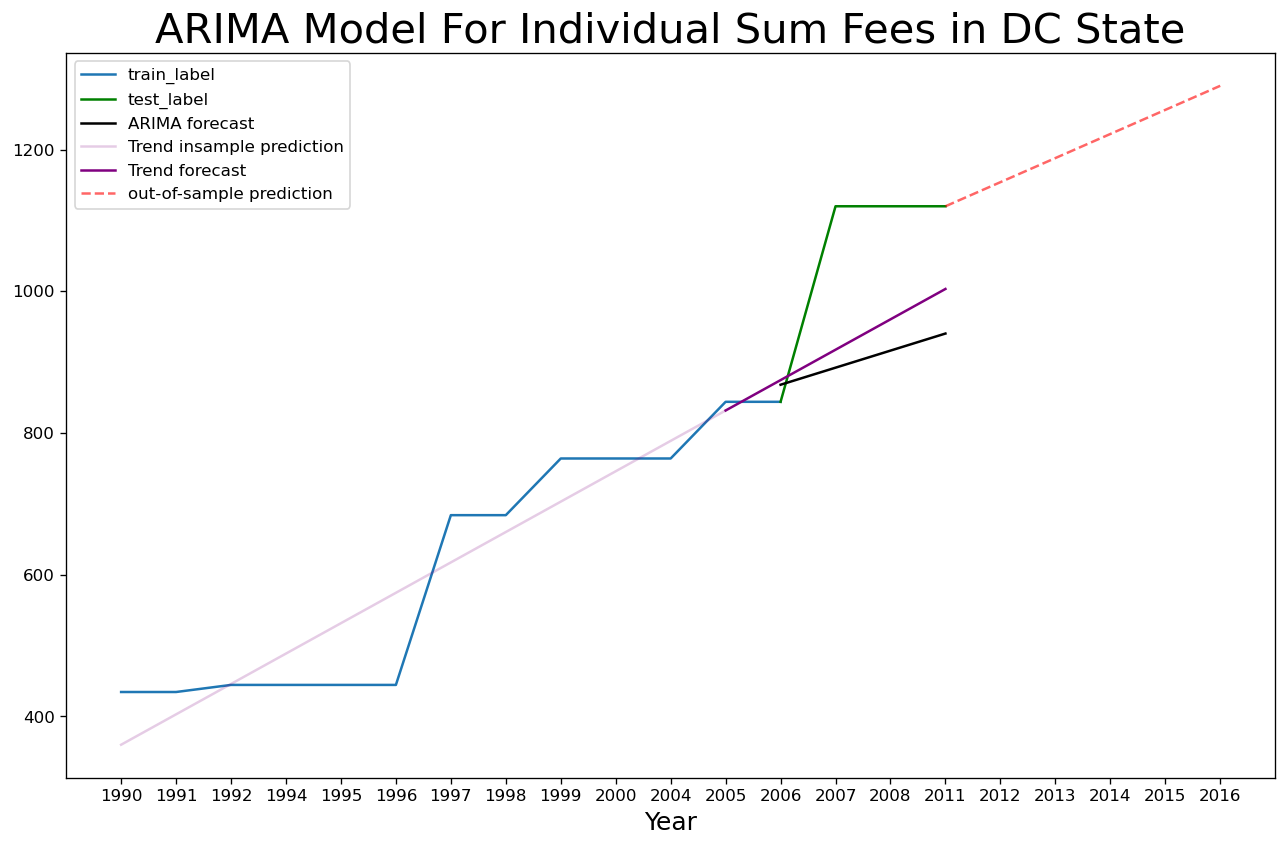

In [36]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_DC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_DC['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_DC)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)


#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_DC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))


#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_DC.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_DC.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_DC)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_DC['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in DC State', fontsize=25)
plt.legend(loc='upper left')

# DE Data

In [37]:
df7 = pd.read_csv('DE.csv',index_col=None, header=0)
df7_temp = df7[(df7['liv_arr'] == 'Living in adult residential care facility')]
df7_temp['state_indv_sum'] = df7_temp['state_indv']
df7 = df7_temp[['year','state','liv_arr','state_indv','state_indv_sum']] .reset_index()
df7['year'] = df7['year'].apply(str)
df_DE = df7.drop(columns = ['index'])
df_DE

year state                                    liv_arr  state_indv  \
0   1990    DE  Living in adult residential care facility       140.0   
1   1991    DE  Living in adult residential care facility       140.0   
2   1992    DE  Living in adult residential care facility       140.0   
3   1994    DE  Living in adult residential care facility       140.0   
4   1995    DE  Living in adult residential care facility       140.0   
5   1996    DE  Living in adult residential care facility       140.0   
6   1997    DE  Living in adult residential care facility       140.0   
7   1998    DE  Living in adult residential care facility       140.0   
8   1999    DE  Living in adult residential care facility       140.0   
9   2000    DE  Living in adult residential care facility       140.0   
10  2004    DE  Living in adult residential care facility       140.0   
11  2005    DE  Living in adult residential care facility       140.0   
12  2006    DE  Living in adult residential care facility       140.0   
13  2007    DE  Living in adult residential care facility       140.0   
14  2008    DE  Living in adult residential care facility       140.0   
15  2011    DE  Living in adult residential care facility       140.0   

    state_indv_sum  
0            140.0  
1            140.0  
2            140.0  
3            140.0  
4            140.0  
5            140.0  
6            140.0  
7            140.0  
8            140.0  
9            140.0  
10           140.0  
11           140.0  
12           140.0  
13           140.0  
14           140.0  
15           140.0

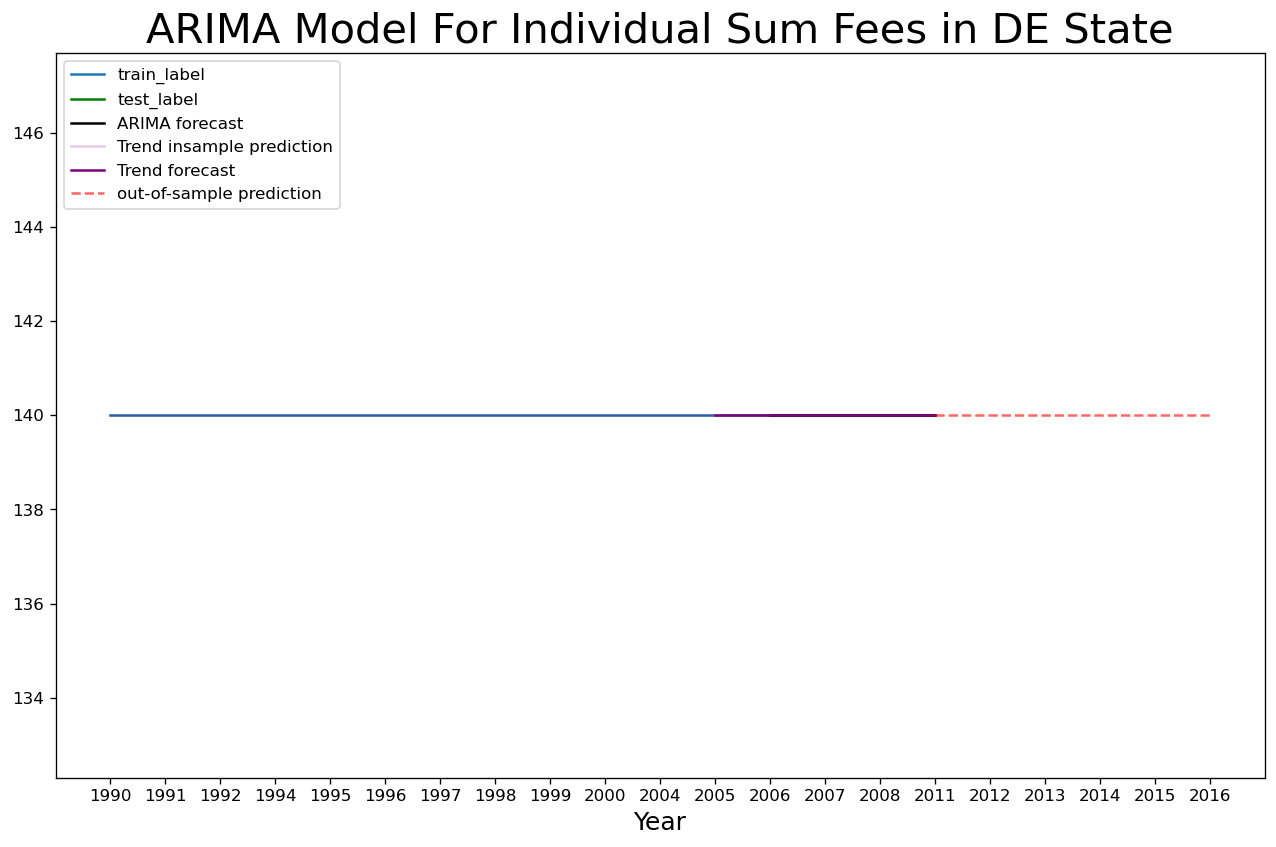

In [139]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_DE['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()

#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_DE['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_DE)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction 
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_DE['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_DE.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_DE.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_DE)),pred, label='Trend forecast', color='purple')

#ax.plot(df_AK.index[:NA+1],series[:NA+1],label='actual value') # train
ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_DE['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in DE State', fontsize=25)
plt.legend(loc='upper left')

# FL Data

In [39]:
#Prepocessing the data first
df8 = pd.read_csv('FL.csv',index_col=None, header=0)
df8_temp = df8[(df8['liv_arr'] == 'Community care program')]
df8_temp['state_indv_sum'] = df8_temp['state_indv']

temp = df8_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_FL = pd.merge(left=df8,
              right=temp,
              how='left',
              on='year')
df_FL

year state                 liv_arr                             sub_cat  \
0   1990    FL  Community care program                   Adult foster care   
1   1990    FL  Community care program  Adult congregate living facilities   
2   1990    FL             Foster home                             Minimal   
3   1990    FL             Foster home                            Moderate   
4   1990    FL             Foster home                           Intensive   
..   ...   ...                     ...                                 ...   
76  2008    FL  Community care program  Adult congregate living facilities   
77  2008    FL       Medicaid facility                                 NaN   
78  2011    FL  Community care program                   Adult foster care   
79  2011    FL  Community care program  Adult congregate living facilities   
80  2011    FL       Medicaid facility                                 NaN   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        583.0        0.0       197.0        0.0     386.0      0.0   
1        583.0        0.0       197.0        0.0     386.0      0.0   
2        458.0        0.0        72.0        0.0     386.0      0.0   
3        477.0        0.0        91.0        0.0     386.0      0.0   
4        494.0        0.0       108.0        0.0     386.0      0.0   
..         ...        ...         ...        ...       ...      ...   
76       715.4        0.0        78.4        0.0     637.0      0.0   
77        35.0       70.0         5.0       10.0      30.0     60.0   
78       752.4        0.0        78.4        0.0     674.0      0.0   
79       752.4        0.0        78.4        0.0     674.0      0.0   
80        35.0       70.0         5.0       10.0      30.0     60.0   

    state_diff  state_diff_dbl  state_indv_sum  
0       -197.0           False           394.0  
1       -197.0           False           394.0  
2        -72.0           False           394.0  
3        -91.0           False           394.0  
4       -108.0           False           394.0  
..         ...             ...             ...  
76       -78.4           False           156.8  
77         5.0            True           156.8  
78       -78.4           False           156.8  
79       -78.4           False           156.8  
80         5.0            True           156.8  

[81 rows x 13 columns]

In [40]:
df_FL=df_FL[(df_FL['liv_arr'] == 'Community care program')].reset_index()
df8 = df_FL[['year','state','liv_arr','state_indv','state_indv_sum']]
t0 = df8.shape[0]  # number of rows
df8 = df8.iloc[0:t0:2, :].reset_index()
df8['year'] = df8['year'].apply(str)
df_FL = df8.drop(columns = ['index'])
df_FL

year state                 liv_arr  state_indv  state_indv_sum
0   1990    FL  Community care program       197.0           394.0
1   1991    FL  Community care program       211.0           422.0
2   1992    FL  Community care program       211.0           422.0
3   1994    FL  Community care program       184.0           368.0
4   1995    FL  Community care program       171.0           342.0
5   1996    FL  Community care program       171.0           342.0
6   1997    FL  Community care program       171.0           342.0
7   1998    FL  Community care program       171.0           342.0
8   1999    FL  Community care program       208.0           416.0
9   2000    FL  Community care program       228.0           456.0
10  2004    FL  Community care program        78.4           156.8
11  2005    FL  Community care program        78.4           156.8
12  2006    FL  Community care program        78.4           156.8
13  2007    FL  Community care program        78.4           156.8
14  2008    FL  Community care program        78.4           156.8
15  2011    FL  Community care program        78.4           156.8

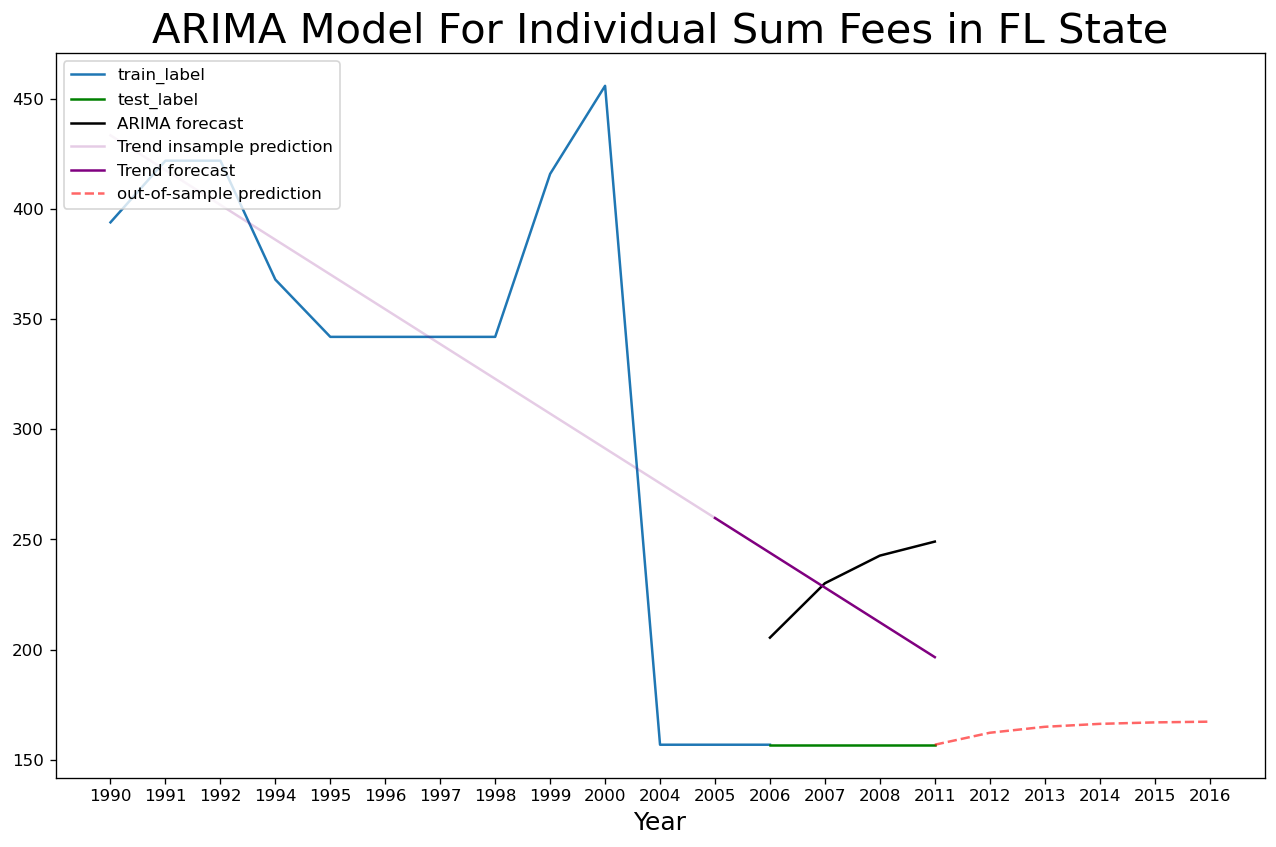

In [41]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_FL['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()

#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_FL['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_FL)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_FL['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_FL.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_FL.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_FL)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_FL['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in FL State', fontsize=25)
plt.legend(loc='upper left')

# HI Data

In [42]:
df9 = pd.read_csv('HI.csv',index_col=None, header=0)
df9_temp = df9[(df9['liv_arr'] == 'Domiciliary care facility')]
df9_temp['state_indv_sum'] = df9_temp['state_indv']
temp = df9_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_HI = pd.merge(left=df9,
              right=temp,
              how='left',
              on='year')
df_HI

year state                    liv_arr                sub_cat  combn_indv  \
0   1990    HI       Living independently                    NaN       390.9   
1   1990    HI  Domiciliary care facility                      I       650.9   
2   1990    HI  Domiciliary care facility                     II       735.9   
3   1990    HI  Domiciliary care facility                    III       837.9   
4   1991    HI       Living independently                    NaN       411.9   
5   1991    HI  Domiciliary care facility                      I       671.9   
6   1991    HI  Domiciliary care facility                     II       756.9   
7   1991    HI  Domiciliary care facility                    III       858.9   
8   1992    HI       Living independently                    NaN       426.9   
9   1992    HI  Domiciliary care facility                      I       686.9   
10  1992    HI  Domiciliary care facility                     II       771.9   
11  1992    HI  Domiciliary care facility                    III       873.9   
12  1994    HI       Living independently                    NaN       450.9   
13  1994    HI  Domiciliary care facility                      I       730.9   
14  1994    HI  Domiciliary care facility                     II       815.9   
15  1994    HI  Domiciliary care facility                    III       917.9   
16  1995    HI       Living independently                    NaN       462.9   
17  1995    HI  Domiciliary care facility                      I       742.9   
18  1995    HI  Domiciliary care facility                     II       827.9   
19  1995    HI  Domiciliary care facility                    III       929.9   
20  1996    HI       Living independently                    NaN       474.9   
21  1996    HI  Domiciliary care facility                      I       754.9   
22  1996    HI  Domiciliary care facility                     II       839.9   
23  1996    HI  Domiciliary care facility                    III       941.9   
24  1997    HI       Living independently                    NaN       488.9   
25  1997    HI  Domiciliary care facility                      I       768.9   
26  1997    HI  Domiciliary care facility                     II       853.9   
27  1997    HI  Domiciliary care facility                    III       955.9   
28  1998    HI       Living independently                    NaN       498.9   
29  1998    HI  Domiciliary care facility     (1 to 5 residents)      1015.9   
30  1998    HI  Domiciliary care facility  (6 or more residents)      1123.9   
31  1999    HI       Living independently                    NaN       504.9   
32  1999    HI  Domiciliary care facility     (1 to 5 residents)      1021.9   
33  1999    HI  Domiciliary care facility  (6 or more residents)      1129.9   
34  2000    HI       Living independently                    NaN       516.9   
35  2000    HI  Domiciliary care facility     (1 to 5 residents)      1033.9   
36  2000    HI  Domiciliary care facility  (6 or more residents)      1141.9   
37  2004    HI           Foster care home                    NaN      1085.9   
38  2004    HI  Domiciliary care facility     (1 to 5 residents)      1085.9   
39  2004    HI  Domiciliary care facility  (6 or more residents)      1193.9   
40  2005    HI           Foster care home                    NaN      1100.9   
41  2005    HI  Domiciliary care facility     (1 to 5 residents)      1100.9   
42  2005    HI  Domiciliary care facility  (6 or more residents)      1208.9   
43  2006    HI           Foster care home                    NaN      1124.9   
44  2006    HI  Domiciliary care facility     (1 to 5 residents)      1124.9   
45  2006    HI  Domiciliary care facility  (6 or more residents)      1232.9   
46  2007    HI           Foster care home                    NaN      1244.9   
47  2007    HI  Domiciliary care facility     (1 to 5 residents)      1244.9   
48  2007    HI  Domiciliary care facility  (6 or more residents)      1352.9   
49  

In [43]:
df_HI=df_HI[(df_HI['liv_arr'] == 'Domiciliary care facility')].reset_index(drop = True)
df_HI=df_HI.drop_duplicates(subset='year', keep='first').reset_index(drop = True)
df_HI                        

year state                    liv_arr             sub_cat  combn_indv  \
0   1990    HI  Domiciliary care facility                   I       650.9   
1   1991    HI  Domiciliary care facility                   I       671.9   
2   1992    HI  Domiciliary care facility                   I       686.9   
3   1994    HI  Domiciliary care facility                   I       730.9   
4   1995    HI  Domiciliary care facility                   I       742.9   
5   1996    HI  Domiciliary care facility                   I       754.9   
6   1997    HI  Domiciliary care facility                   I       768.9   
7   1998    HI  Domiciliary care facility  (1 to 5 residents)      1015.9   
8   1999    HI  Domiciliary care facility  (1 to 5 residents)      1021.9   
9   2000    HI  Domiciliary care facility  (1 to 5 residents)      1033.9   
10  2004    HI  Domiciliary care facility  (1 to 5 residents)      1085.9   
11  2005    HI  Domiciliary care facility  (1 to 5 residents)      1100.9   
12  2006    HI  Domiciliary care facility  (1 to 5 residents)      1124.9   
13  2007    HI  Domiciliary care facility  (1 to 5 residents)      1244.9   
14  2008    HI  Domiciliary care facility  (1 to 5 residents)      1278.9   
15  2011    HI  Domiciliary care facility  (1 to 5 residents)      1325.9   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      1301.8       264.9      722.8     386.0    579.0       457.9   
1      1343.8       264.9      733.8     407.0    610.0       468.9   
2      1373.8       264.9      740.8     422.0    633.0       475.9   
3      1461.8       284.9      792.8     446.0    669.0       507.9   
4      1485.8       284.9      798.8     458.0    687.0       513.9   
5      1509.8       284.9      804.8     470.0    705.0       519.9   
6      1537.8       284.9      811.8     484.0    726.0       526.9   
7      2031.8       521.9     1290.8     494.0    741.0       768.9   
8      2043.8       521.9     1292.8     500.0    751.0       770.9   
9      2067.8       521.9     1298.8     512.0    769.0       776.9   
10     2171.8       521.9     1325.8     564.0    846.0       803.9   
11     2201.8       521.9     1332.8     579.0    869.0       810.9   
12     2249.8       521.9     1345.8     603.0    904.0       823.9   
13     2489.8       621.9     1555.8     623.0    934.0       933.9   
14     2557.9       641.9     1601.8     637.0    956.1       959.9   
15     2651.8       651.9     1640.8     674.0   1011.0       988.9   

    state_diff_dbl  state_indv_sum  
0            False          1066.7  
1            False          1066.7  
2            False          1066.7  
3            False          1126.7  
4            False          1126.7  
5            False          1126.7  
6            False          1126.7  
7            False          1151.8  
8            False          1151.8  
9            False          1151.8  
10           False          1151.8  
11           False          1151.8  
12           False          1151.8  
13           False          1351.8  
14           False          1391.8  
15           False          1411.8

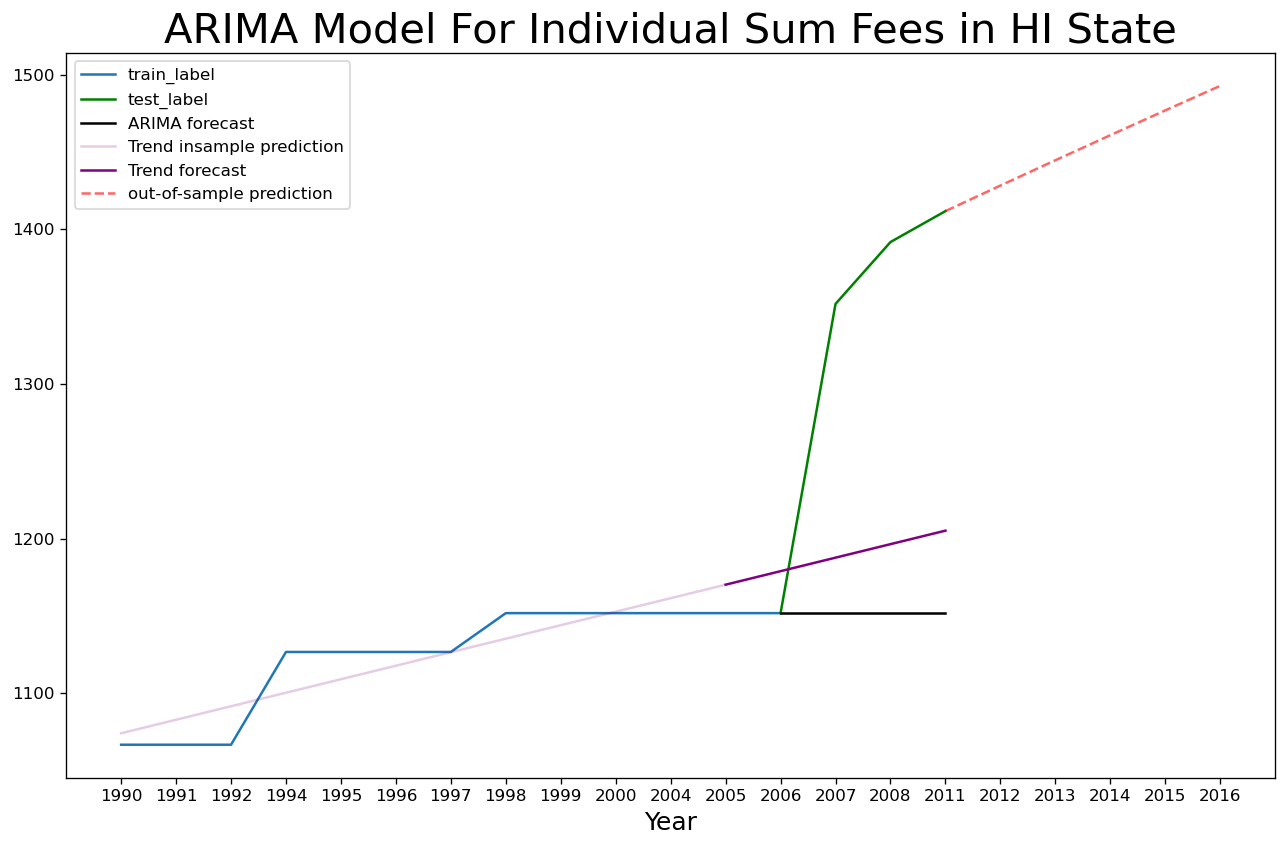

In [44]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_HI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_HI['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_HI)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_HI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph 
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_HI.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_HI.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_HI)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_HI['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in HI State', fontsize=25)
plt.legend(loc='upper left')

# IA Data

In [45]:
df10 = pd.read_csv('IA.csv',index_col=None, header=0)
df10_temp = df10[(df10['liv_arr'] == 'Living with dependent person')|(df10['liv_arr'] == 'Living independently')|(df10['liv_arr'] =='Living with dependent person in household of another')]
df10_temp['state_indv_sum'] = df10_temp['state_indv']

temp = df10_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_IA = pd.merge(left=df10,
              right=temp,
              how='left',
              on='year')
df_IA

year state                                            liv_arr  \
0    1990    IA                               Living independently   
1    1990    IA                     Living in household of another   
2    1990    IA                       Living with dependent person   
3    1990    IA                       Living with dependent person   
4    1990    IA                       Family life or boarding home   
..    ...   ...                                                ...   
185  2011    IA  Living with dependent person in household of a...   
186  2011    IA       Family life or boarding home (1/3 reduction)   
187  2011    IA       Family life or boarding home (1/3 reduction)   
188  2011    IA                                   Residential care   
189  2011    IA                                In-home health care   

               sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  \
0                Blind      408.00      623.0       22.00       44.0   
1                Blind      279.34      430.0       22.00       44.0   
2    Aged and disabled      579.00      772.0      193.00      193.0   
3                Blind      601.00      816.0      215.00      237.0   
4    Aged and disabled      448.20      916.4       62.20      337.4   
..                 ...         ...        ...         ...        ...   
185              Blind      815.34     1062.0      366.00      388.0   
186  Aged and disabled      591.34     1315.0      142.00      641.0   
187              Blind      613.34     1359.0      164.00      685.0   
188                NaN      965.34        0.0      291.34        0.0   
189                NaN     1154.55     1972.1      480.55      961.1   

     fed_indv  fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0      386.00    579.0       22.00            True           838.0  
1      257.34    386.0       22.00            True           838.0  
2      386.00    579.0        0.00           False           838.0  
3      386.00    579.0       22.00           False           838.0  
4      386.00    579.0      275.20           False           838.0  
..        ...      ...         ...             ...             ...  
185    449.34    674.0       22.00           False          1442.0  
186    449.34    674.0      499.00           False          1442.0  
187    449.34    674.0      521.00           False          1442.0  
188    674.00      0.0     -291.34           False          1442.0  
189    674.00   1011.0      480.55            True          1442.0  

[190 rows x 13 columns]

In [46]:
df10 = df_IA[(df_IA['liv_arr'] == 'Living with dependent person')|(df_IA['liv_arr'] == 'Living independently')|(df_IA['liv_arr'] =='Living with dependent person in household of another')]
df10_new = df10[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index(drop = True)
df_IA = df10_new[df10_new['liv_arr'].isin(['Living independently'])].reset_index(drop = True)
df_IA['year'].apply(str)

df_IA


year state               liv_arr  state_indv  state_indv_sum
0   1990    IA  Living independently        22.0           838.0
1   1991    IA  Living independently        22.0           656.0
2   1992    IA  Living independently        22.0           910.0
3   1994    IA  Living independently        22.0           958.0
4   1995    IA  Living independently        22.0           982.0
5   1996    IA  Living independently        22.0          1006.0
6   1997    IA  Living independently        22.0          1034.0
7   1998    IA  Living independently        22.0          1054.0
8   1999    IA  Living independently        22.0          1070.0
9   2000    IA  Living independently        22.0          1094.0
10  2004    IA  Living independently        22.0          1206.0
11  2005    IA  Living independently        22.0          1238.0
12  2006    IA  Living independently        22.0          1290.0
13  2007    IA  Living independently        22.0          1334.0
14  2008    IA  Living independently        22.0          1366.0
15  2011    IA  Living independently        22.0          1442.0

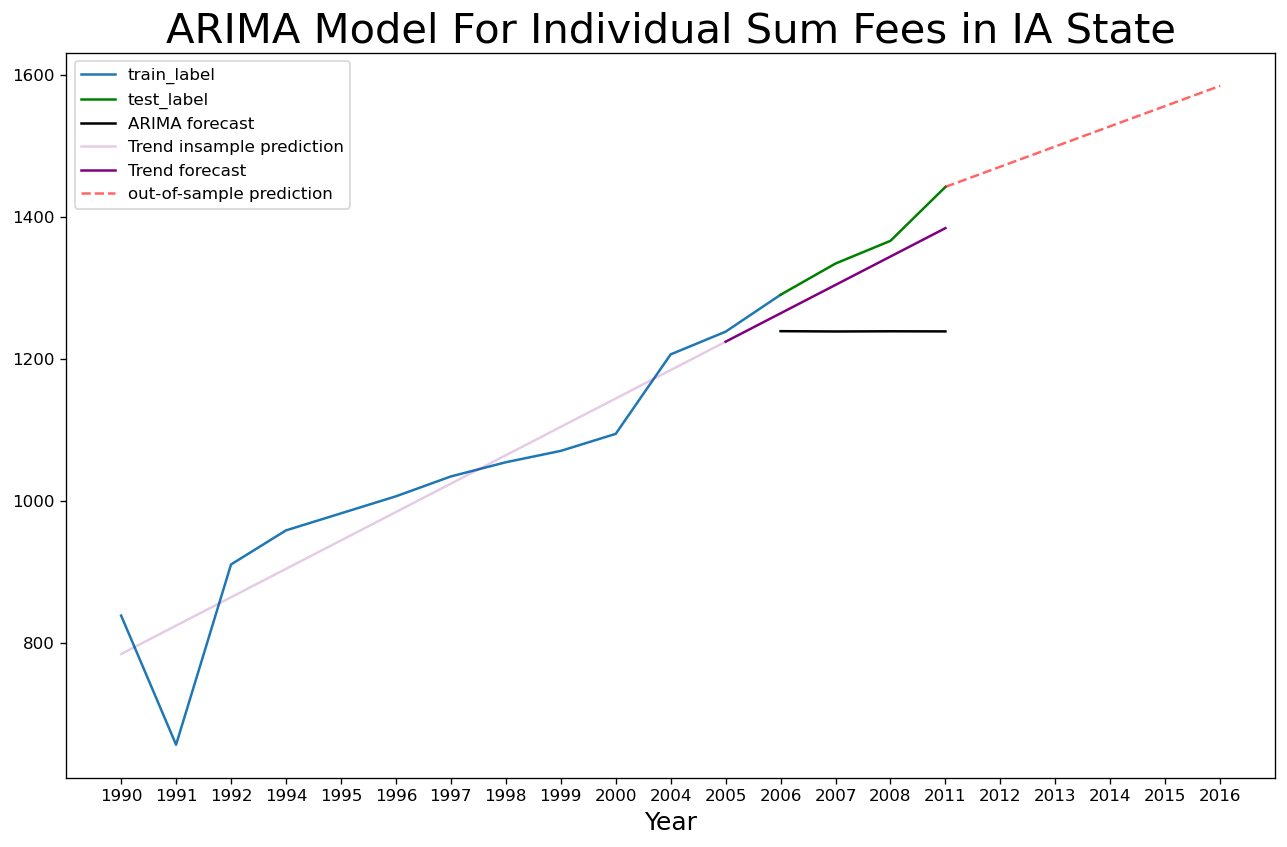

In [47]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_IA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_IA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_IA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_IA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_IA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_IA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_IA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_IA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in IA State', fontsize=25)
plt.legend(loc='upper left')

# ID Data

In [48]:
#Prepocessing the data first
df11 = pd.read_csv('ID.csv',index_col=None, header=0)
df11_temp = df11[(df11['liv_arr'] == 'Living independently or in the household of another')| (df11['liv_arr'] == 'Living with essential person')]
df11_temp['state_indv_sum'] = df11_temp['state_indv']

temp = df11_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_ID = pd.merge(left=df11,
              right=temp,
              how='left',
              on='year')
df_ID

year state                                            liv_arr    sub_cat  \
0    1990    ID  Living independently or in the household of an...        NaN   
1    1990    ID                       Living with essential person        NaN   
2    1990    ID                            Room and board facility        NaN   
3    1990    ID                                  Hotel-rented room        NaN   
4    1990    ID                             Licensed shelter homes        NaN   
..    ...   ...                                                ...        ...   
111  2011    ID                            Room and board facility        NaN   
112  2011    ID  Adult residential care home/Adult foster care ...    Level I   
113  2011    ID  Adult residential care home/Adult foster care ...   Level II   
114  2011    ID  Adult residential care home/Adult foster care ...  Level III   
115  2011    ID        Semi-independent group residential facility        NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0         459.0      624.0        73.0       45.0     386.0    579.0   
1         624.0        0.0        45.0        0.0     579.0      0.0   
2         511.0     1022.0       125.0      443.0     386.0    579.0   
3         459.0      624.0        73.0       45.0     386.0    579.0   
4         638.0     1276.0       252.0      697.0     386.0    579.0   
..          ...        ...         ...        ...       ...      ...   
111       872.0        0.0       198.0        0.0     674.0      0.0   
112      1013.0        0.0       339.0        0.0     674.0      0.0   
113      1080.0        0.0       406.0        0.0     674.0      0.0   
114      1147.0        0.0       473.0        0.0     674.0      0.0   
115       872.0        0.0       198.0        0.0     674.0      0.0   

     state_diff  state_diff_dbl  state_indv_sum  
0         -28.0           False           118.0  
1         -45.0           False           118.0  
2         318.0           False           118.0  
3         -28.0           False           118.0  
4         445.0           False           118.0  
..          ...             ...             ...  
111      -198.0           False           105.0  
112      -339.0           False           105.0  
113      -406.0           False           105.0  
114      -473.0           False           105.0  
115      -198.0           False           105.0  

[116 rows x 13 columns]

In [49]:
df_ID = df_ID[(df_ID['liv_arr'] == 'Living independently or in the household of another')]
df11 = df_ID[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df11['year'] = df11['year'].apply(str)
df_ID = df11.drop(columns = ['index'])
df_ID

year state                                            liv_arr  state_indv  \
0   1990    ID  Living independently or in the household of an...        73.0   
1   1991    ID  Living independently or in the household of an...        70.0   
2   1992    ID  Living independently or in the household of an...        70.0   
3   1994    ID  Living independently or in the household of an...        45.0   
4   1995    ID  Living independently or in the household of an...        37.0   
5   1996    ID  Living independently or in the household of an...        37.0   
6   1997    ID  Living independently or in the household of an...        48.0   
7   1998    ID  Living independently or in the household of an...        48.0   
8   1999    ID  Living independently or in the household of an...        48.0   
9   2000    ID  Living independently or in the household of an...        53.0   
10  2004    ID  Living independently or in the household of an...        52.0   
11  2005    ID  Living independently or in the household of an...        52.0   
12  2006    ID  Living independently or in the household of an...        32.0   
13  2007    ID  Living independently or in the household of an...        32.0   
14  2008    ID  Living independently or in the household of an...        32.0   
15  2011    ID  Living independently or in the household of an...        53.0   

    state_indv_sum  
0            118.0  
1            113.0  
2            115.0  
3             85.0  
4             46.0  
5             46.0  
6             64.0  
7             65.0  
8             65.0  
9             72.0  
10            72.0  
11            72.0  
12            32.0  
13            32.0  
14            32.0  
15           105.0

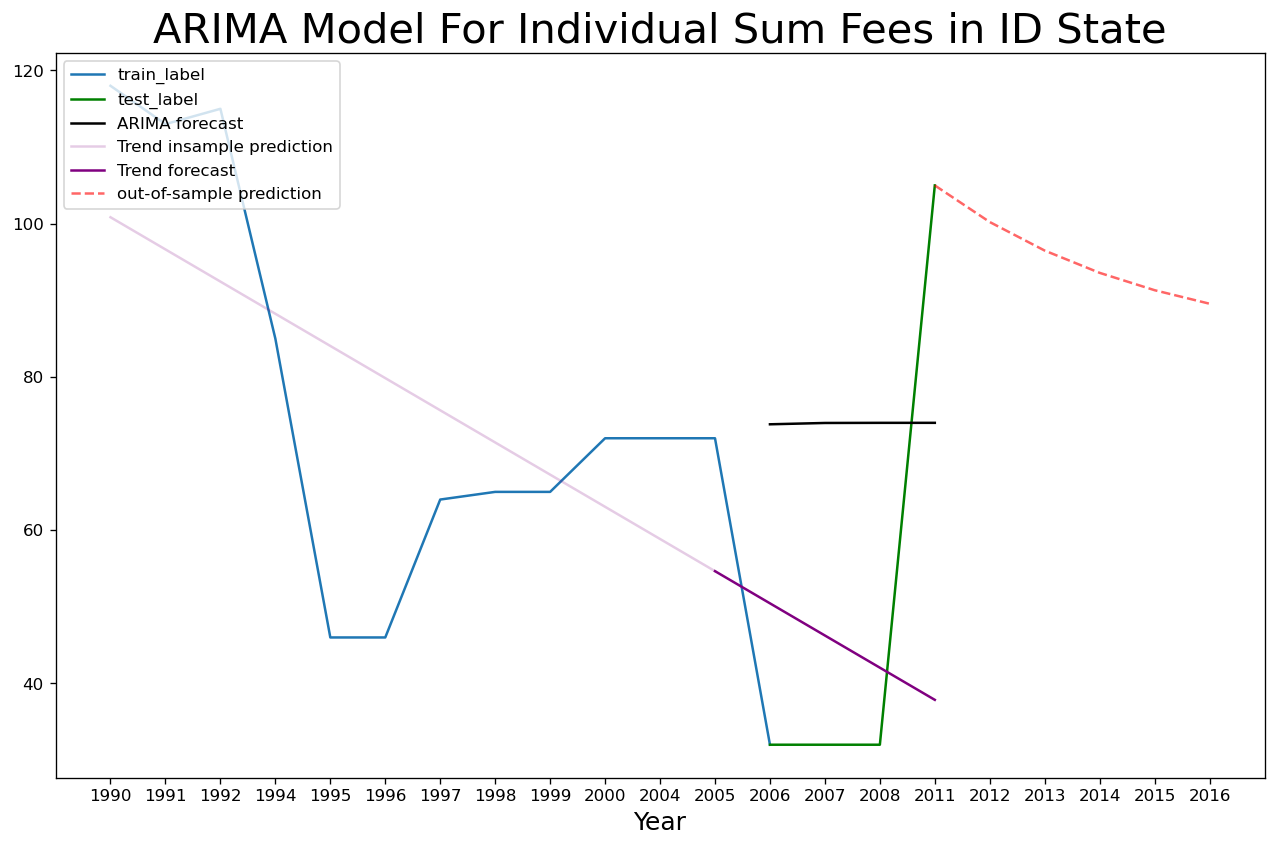

In [50]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_ID['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_ID['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_ID)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_ID['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_ID.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_ID.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_ID)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_ID['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in ID State', fontsize=25)
plt.legend(loc='upper left')

# IN Data

In [51]:
df12 = pd.read_csv('IN.csv',index_col=None, header=0)
df12_temp = df12[(df12['liv_arr'] == 'Licensed residential facility')]
df12_temp['state_indv_sum'] = df12_temp['state_indv']

temp = df12_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_IN = pd.merge(left=df12,
              right=temp,
              how='left',
              on='year')
df_IN

year state                        liv_arr  sub_cat  combn_indv  combn_cpl  \
0   1990    IN  Licensed residential facility      NaN      789.00        0.0   
1   1991    IN  Licensed residential facility      NaN      789.00        0.0   
2   1992    IN  Licensed residential facility      NaN      789.00        0.0   
3   1994    IN  Licensed residential facility      NaN      789.00        0.0   
4   1995    IN  Licensed residential facility      NaN      789.00        0.0   
5   1996    IN  Licensed residential facility      NaN     1100.36        0.0   
6   1997    IN  Licensed residential facility      NaN     1100.36        0.0   
7   1998    IN  Licensed residential facility      NaN     1220.20        0.0   
8   1999    IN  Licensed residential facility      NaN     1269.61        0.0   
9   2000    IN  Licensed residential facility      NaN     1348.79        0.0   
10  2004    IN  Licensed residential facility      NaN     1271.85        0.0   
11  2004    IN              Medicaid facility      NaN       52.00      104.0   
12  2005    IN  Licensed residential facility      NaN     1196.85        0.0   
13  2005    IN              Medicaid facility      NaN       52.00      104.0   
14  2006    IN  Licensed residential facility      NaN     1196.90        0.0   
15  2006    IN              Medicaid facility      NaN       52.00      104.0   
16  2007    IN  Licensed residential facility      NaN     1216.90        0.0   
17  2007    IN              Medicaid facility      NaN       52.00      104.0   
18  2008    IN  Licensed residential facility      NaN     1196.90        0.0   
19  2008    IN              Medicaid facility      NaN       52.00      104.0   
20  2011    IN  Licensed residential facility      NaN     1501.06        0.0   
21  2011    IN              Medicaid facility      NaN       52.00      104.0   

    state_indv  state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  \
0       403.00        0.0     386.0      0.0     -403.00           False   
1       382.00        0.0     407.0      0.0     -382.00           False   
2       367.00        0.0     422.0      0.0     -367.00           False   
3       343.00        0.0     446.0      0.0     -343.00           False   
4       331.00        0.0     458.0      0.0     -331.00           False   
5       630.36        0.0     470.0      0.0     -630.36           False   
6       616.36        0.0     484.0      0.0     -616.36           False   
7       726.20        0.0     494.0      0.0     -726.20           False   
8       769.61        0.0     500.0      0.0     -769.61           False   
9       836.79        0.0     512.0      0.0     -836.79           False   
10      707.85        0.0     564.0      0.0     -707.85           False   
11       22.00       44.0      30.0     60.0       22.00            True   
12      617.85        0.0     579.0      0.0     -617.85           False   
13       22.00       44.0      30.0     60.0       22.00            True   
14      593.90        0.0     603.0      0.0     -593.90           False   
15       22.00       44.0      30.0     60.0       22.00            True   
16      593.90        0.0     623.0      0.0     -593.90           False   
17       22.00       44.0      30.0     60.0       22.00            True   
18      559.90        0.0     637.0      0.0     -559.90           False   
19       22.00       44.0      30.0     60.0       22.00            True   
20      827.06        0.0     674.0      0.0     -827.06           False   
21       22.00       44.0      30.0     60.0       22.00            True   

    state_indv_sum  
0           403.00  
1           382.00  
2           367.00  
3           343.00  
4           331.00  
5           630.36  
6           616.36  
7           726.20  
8           769.61  
9           836.79  
10          707.85  
11          707.85  
12          617.85  
13          617.85  
14          593.90  
15          593.90  
16          593.90  
17          5

In [52]:
df_IN = df_IN[(df_IN['liv_arr'] == 'Licensed residential facility')]
df12 = df_IN[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df12['year'] = df12['year'].apply(str)
df_IN = df12.drop(columns = ['index'])
df_IN

year state                        liv_arr  state_indv  state_indv_sum
0   1990    IN  Licensed residential facility      403.00          403.00
1   1991    IN  Licensed residential facility      382.00          382.00
2   1992    IN  Licensed residential facility      367.00          367.00
3   1994    IN  Licensed residential facility      343.00          343.00
4   1995    IN  Licensed residential facility      331.00          331.00
5   1996    IN  Licensed residential facility      630.36          630.36
6   1997    IN  Licensed residential facility      616.36          616.36
7   1998    IN  Licensed residential facility      726.20          726.20
8   1999    IN  Licensed residential facility      769.61          769.61
9   2000    IN  Licensed residential facility      836.79          836.79
10  2004    IN  Licensed residential facility      707.85          707.85
11  2005    IN  Licensed residential facility      617.85          617.85
12  2006    IN  Licensed residential facility      593.90          593.90
13  2007    IN  Licensed residential facility      593.90          593.90
14  2008    IN  Licensed residential facility      559.90          559.90
15  2011    IN  Licensed residential facility      827.06          827.06

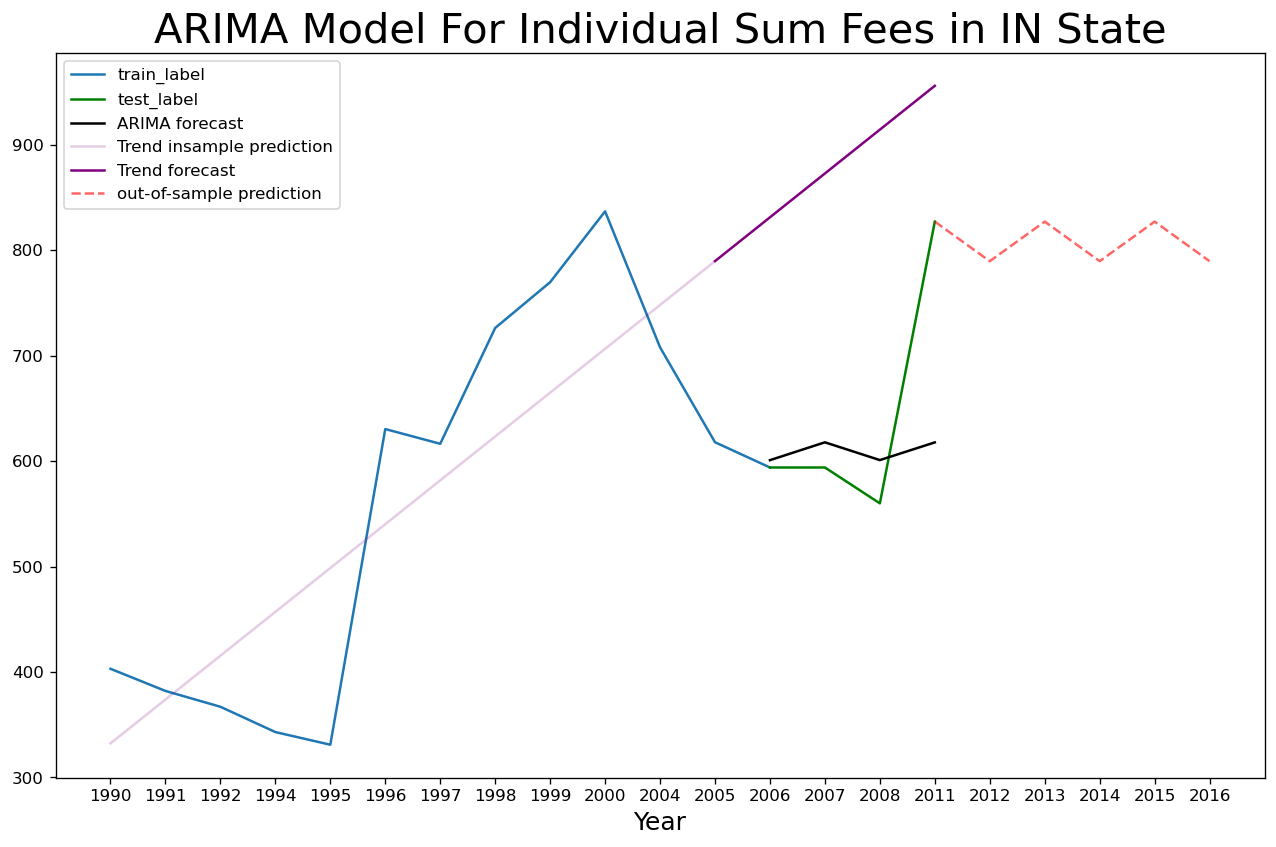

In [53]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_IN['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_IN['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_IN)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_IN['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_IN.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_IN.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_IN)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_IN['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in IN State', fontsize=25)
plt.legend(loc='upper left')

# KY Data

In [54]:
#Prepocessing the data first
df13 = pd.read_csv('KY.csv',index_col=None, header=0)
df13_temp = df13[(df13['liv_arr'] == 'Personal-care facility')| (df13['liv_arr'] == 'Family care home')|(df13['liv_arr'] == 'Caretaker in home')]
df13_temp['state_indv_sum'] = df13_temp['state_indv']

temp = df13_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_KY = pd.merge(left=df13,
              right=temp,
              how='left',
              on='year')
df_KY

year state                 liv_arr  sub_cat  combn_indv  combn_cpl  \
0   1990    KY  Personal-care facility      NaN       595.0        0.0   
1   1990    KY        Family care home      NaN       484.0        0.0   
2   1990    KY       Caretaker in home      NaN       417.0      647.0   
3   1991    KY  Personal-care facility      NaN       690.0        0.0   
4   1991    KY        Family care home      NaN       510.0        0.0   
5   1991    KY       Caretaker in home      NaN       440.0      682.0   
6   1992    KY  Personal-care facility      NaN       720.0        0.0   
7   1992    KY        Family care home      NaN       525.0        0.0   
8   1992    KY       Caretaker in home      NaN       455.0      705.0   
9   1994    KY  Personal-care facility      NaN       780.0        0.0   
10  1994    KY        Family care home      NaN       585.0        0.0   
11  1994    KY       Caretaker in home      NaN       479.0      741.0   
12  1995    KY  Personal-care facility      NaN       792.0        0.0   
13  1995    KY        Family care home      NaN       597.0        0.0   
14  1995    KY       Caretaker in home      NaN       491.0      759.0   
15  1996    KY  Personal-care facility      NaN       804.0        0.0   
16  1996    KY        Family care home      NaN       609.0        0.0   
17  1996    KY       Caretaker in home      NaN       503.0      777.0   
18  1997    KY  Personal-care facility      NaN       818.0        0.0   
19  1997    KY        Family care home      NaN       623.0        0.0   
20  1997    KY       Caretaker in home      NaN       517.0      798.0   
21  1998    KY  Personal-care facility      NaN       828.0        0.0   
22  1998    KY        Family care home      NaN       633.0        0.0   
23  1998    KY       Caretaker in home      NaN       527.0      813.0   
24  1999    KY  Personal-care facility      NaN       894.0        0.0   
25  1999    KY        Family care home      NaN       639.0        0.0   
26  1999    KY       Caretaker in home      NaN       533.0      823.0   
27  2000    KY  Personal-care facility      NaN       906.0        0.0   
28  2000    KY        Family care home      NaN       651.0        0.0   
29  2000    KY       Caretaker in home      NaN       545.0      841.0   
30  2004    KY  Personal-care facility      NaN      1004.0        0.0   
31  2004    KY        Family care home      NaN       736.0        0.0   
32  2004    KY       Caretaker in home      NaN       626.0      961.0   
33  2005    KY  Personal-care facility      NaN      1019.0        0.0   
34  2005    KY        Family care home      NaN       751.0        0.0   
35  2005    KY       Caretaker in home      NaN       641.0      984.0   
36  2006    KY  Personal-care facility      NaN      1123.0        0.0   
37  2006    KY        Family care home      NaN       775.0        0.0   
38  2006    KY       Caretaker in home      NaN       665.0     1019.0   
39  2007    KY  Personal-care facility      NaN      1143.0        0.0   
40  2007    KY        Family care home      NaN       795.0        0.0   
41  2007    KY       Caretaker in home      NaN       685.0     1049.0   
42  2008    KY  Personal-care facility      NaN      1157.0        0.0   
43  2008    KY        Family care home      NaN       809.0        0.0   
44  2008    KY       Caretaker in home      NaN       699.0     1071.0   
45  2011    KY  Personal-care facility      NaN      1194.0        0.0   
46  2011    KY        Family care home      NaN       846.0        0.0   
47  2011    KY       Caretaker in home      NaN       736.0     1126.0   

    state_indv  state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  \
0        209.0        0.0     386.0      0.0      -209.0           False   
1         98.0        0.0     386.0      0.0       -98.0           False   
2         31.0       68.0     386.0    579.0        37.0           False   
3        283.0        0.0     407.0      0.0      -283.0           False 

In [55]:
df_KY = df_KY[(df_KY['liv_arr'] == 'Personal-care facility')]
df13 = df_KY[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df13['year'] = df13['year'].apply(str)
df_KY = df13.drop(columns = ['index'])
df_KY

year state                 liv_arr  state_indv  state_indv_sum
0   1990    KY  Personal-care facility       209.0           338.0
1   1991    KY  Personal-care facility       283.0           419.0
2   1992    KY  Personal-care facility       298.0           434.0
3   1994    KY  Personal-care facility       334.0           506.0
4   1995    KY  Personal-care facility       334.0           506.0
5   1996    KY  Personal-care facility       334.0           506.0
6   1997    KY  Personal-care facility       334.0           506.0
7   1998    KY  Personal-care facility       334.0           506.0
8   1999    KY  Personal-care facility       394.0           566.0
9   2000    KY  Personal-care facility       394.0           566.0
10  2004    KY  Personal-care facility       440.0           674.0
11  2005    KY  Personal-care facility       440.0           674.0
12  2006    KY  Personal-care facility       520.0           754.0
13  2007    KY  Personal-care facility       520.0           754.0
14  2008    KY  Personal-care facility       520.0           754.0
15  2011    KY  Personal-care facility       520.0           754.0

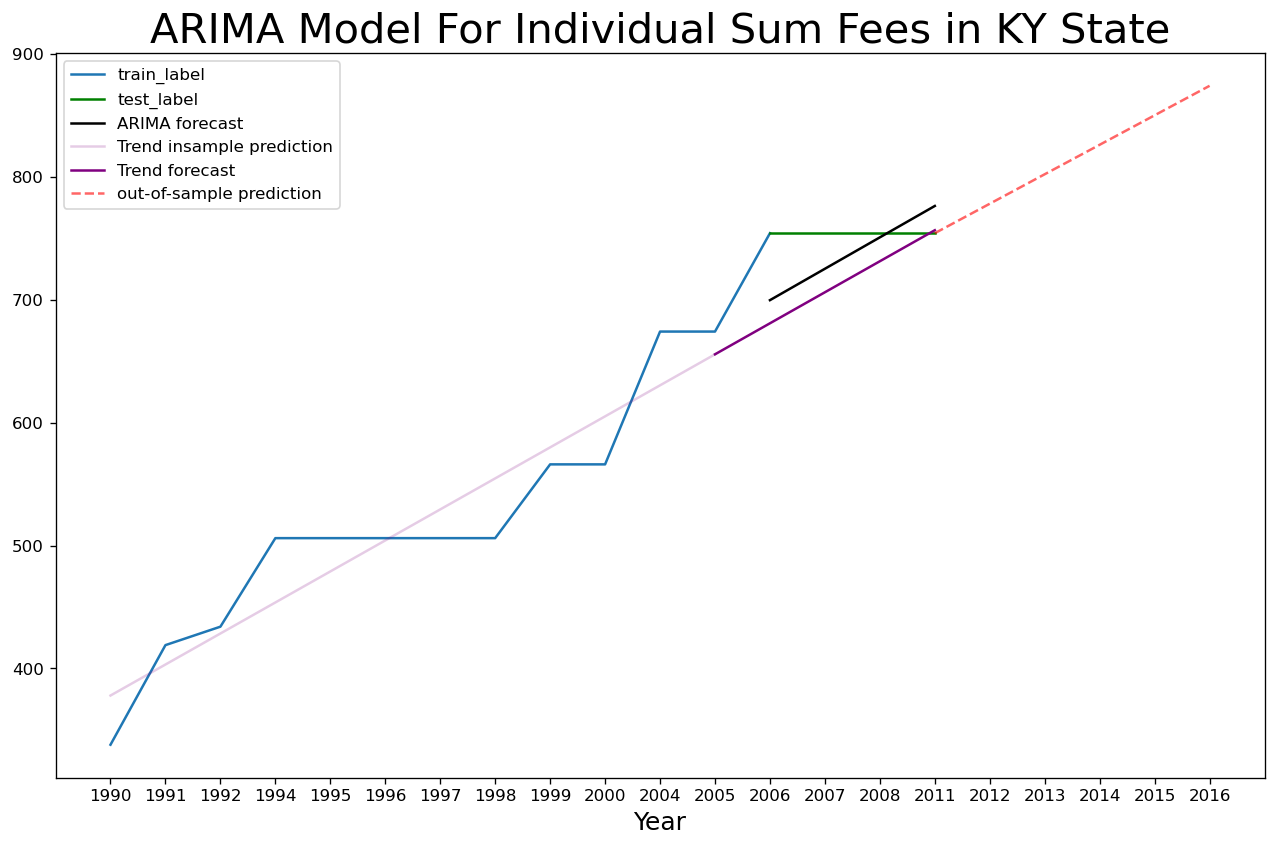

In [56]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_KY['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_KY['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_KY)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_KY['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_KY.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_KY.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_KY)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_KY['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in KY State', fontsize=25)
plt.legend(loc='upper left')

# LA Data

In [57]:
#Prepocessing the data first
df14 = pd.read_csv('LA.csv',index_col=None, header=0)
df14_temp = df14[(df14['liv_arr'] == 'Medicaid facility')]
df14_temp['state_indv_sum'] = df14_temp['state_indv']

temp = df14_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_LA = pd.merge(left=df14,
              right=temp,
              how='left',
              on='year')
df_LA

year state            liv_arr  sub_cat  combn_indv  combn_cpl  state_indv  \
0   1990    LA  Medicaid facility      NaN        38.0       76.0         8.0   
1   1991    LA  Medicaid facility      NaN        38.0       76.0         8.0   
2   1992    LA  Medicaid facility      NaN        38.0       76.0         8.0   
3   1994    LA  Medicaid facility      NaN        38.0       76.0         8.0   
4   1995    LA  Medicaid facility      NaN        38.0       76.0         8.0   
5   1996    LA  Medicaid facility      NaN        38.0       76.0         8.0   
6   1997    LA  Medicaid facility      NaN        38.0       76.0         8.0   
7   1998    LA  Medicaid facility      NaN        38.0       76.0         8.0   
8   1999    LA  Medicaid facility      NaN        38.0       76.0         8.0   
9   2000    LA  Medicaid facility      NaN        38.0       76.0         8.0   
10  2004    LA  Medicaid facility      NaN        38.0       76.0         8.0   
11  2005    LA  Medicaid facility      NaN        38.0       76.0         8.0   
12  2006    LA  Medicaid facility      NaN        38.0       76.0         8.0   
13  2007    LA  Medicaid facility      NaN        38.0       76.0         8.0   
14  2008    LA  Medicaid facility      NaN        38.0       76.0         8.0   
15  2011    LA  Medicaid facility      NaN        38.0       76.0         8.0   

    state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0        16.0      30.0     60.0         8.0            True             8.0  
1        16.0      30.0     60.0         8.0            True             8.0  
2        16.0      30.0     60.0         8.0            True             8.0  
3        16.0      30.0     60.0         8.0            True             8.0  
4        16.0      30.0     60.0         8.0            True             8.0  
5        16.0      30.0     60.0         8.0            True             8.0  
6        16.0      30.0     60.0         8.0            True             8.0  
7        16.0      30.0     60.0         8.0            True             8.0  
8        16.0      30.0     60.0         8.0            True             8.0  
9        16.0      30.0     60.0         8.0            True             8.0  
10       16.0      30.0     60.0         8.0            True             8.0  
11       16.0      30.0     60.0         8.0            True             8.0  
12       16.0      30.0     60.0         8.0            True             8.0  
13       16.0      30.0     60.0         8.0            True             8.0  
14       16.0      30.0     60.0         8.0            True             8.0  
15       16.0      30.0     60.0         8.0            True             8.0

In [58]:

df14 = df_LA[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df14['year'] = df14['year'].apply(str)
df_LA = df14.drop(columns = ['index'])
df_LA

year state            liv_arr  state_indv  state_indv_sum
0   1990    LA  Medicaid facility         8.0             8.0
1   1991    LA  Medicaid facility         8.0             8.0
2   1992    LA  Medicaid facility         8.0             8.0
3   1994    LA  Medicaid facility         8.0             8.0
4   1995    LA  Medicaid facility         8.0             8.0
5   1996    LA  Medicaid facility         8.0             8.0
6   1997    LA  Medicaid facility         8.0             8.0
7   1998    LA  Medicaid facility         8.0             8.0
8   1999    LA  Medicaid facility         8.0             8.0
9   2000    LA  Medicaid facility         8.0             8.0
10  2004    LA  Medicaid facility         8.0             8.0
11  2005    LA  Medicaid facility         8.0             8.0
12  2006    LA  Medicaid facility         8.0             8.0
13  2007    LA  Medicaid facility         8.0             8.0
14  2008    LA  Medicaid facility         8.0             8.0
15  2011    LA  Medicaid facility         8.0             8.0

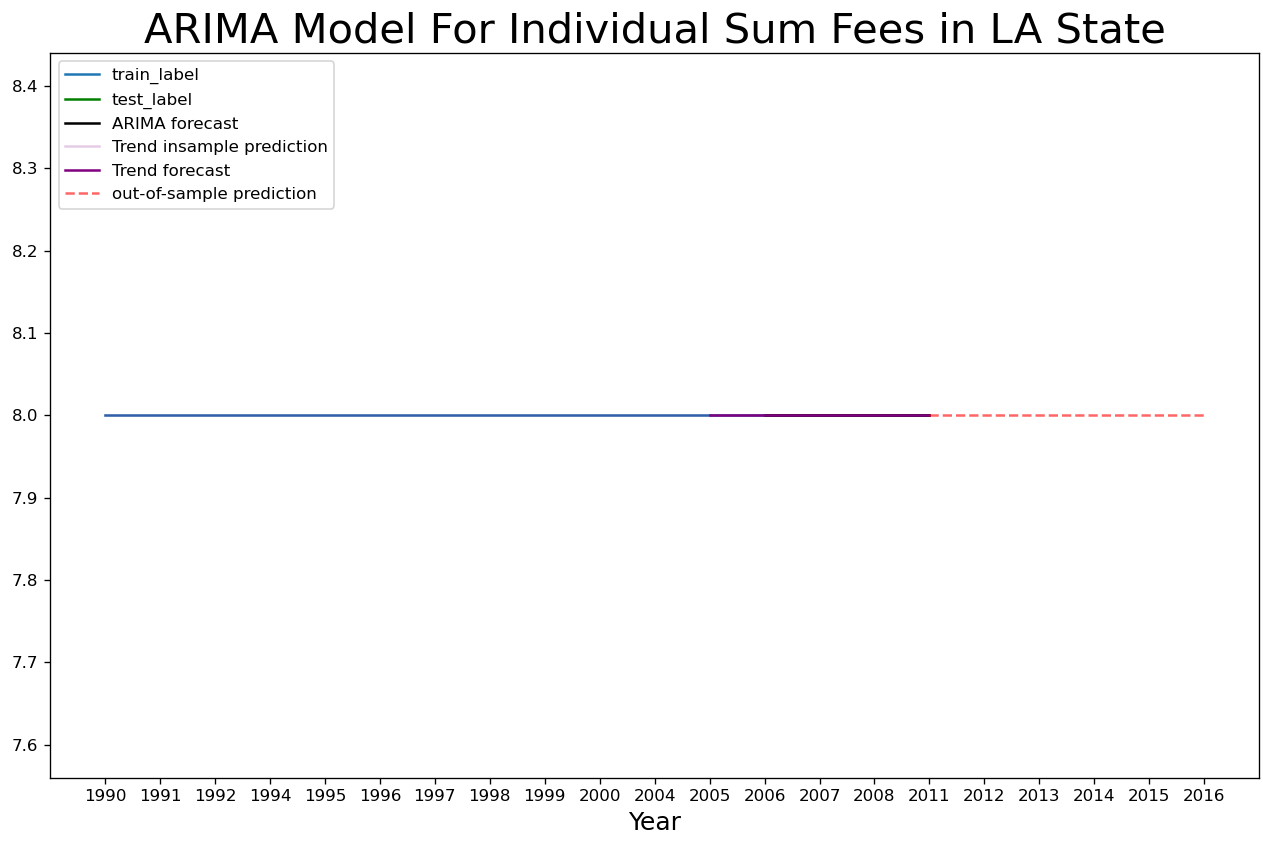

In [59]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_LA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_LA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_LA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_LA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_LA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_LA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_LA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_LA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in LA State', fontsize=25)
plt.legend(loc='upper left')

# MA Data

In [60]:
#Prepocessing the data first
df15 = pd.read_csv('MA.csv',index_col=None, header=0)
df15_temp = df15[(df15['liv_arr'] == 'Living independently')| (df15['liv_arr'] == 'Shared living expenses')| (df15['liv_arr'] == 'Living in household of another')]
df15_temp['state_indv_sum'] = df15_temp['state_indv']

temp = df15_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MA = pd.merge(left=df15,
              right=temp,
              how='left',
              on='year')
df_MA

year state                         liv_arr            sub_cat  \
0    1990    MA            Living independently               Aged   
1    1990    MA            Living independently              Blind   
2    1990    MA            Living independently           Disabled   
3    1990    MA          Shared living expenses               Aged   
4    1990    MA          Shared living expenses              Blind   
..    ...   ...                             ...                ...   
196  2011    MA  Living in household of another           Disabled   
197  2011    MA              Licensed rest home  Aged and disabled   
198  2011    MA              Licensed rest home              Blind   
199  2011    MA               Medicaid facility                NaN   
200  2011    MA        Assisted living facility                NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        514.82     780.72      128.82     201.72    386.00    579.0   
1        535.74    1071.48      149.74     492.48    386.00    579.0   
2        500.39     759.06      114.39     180.06    386.00    579.0   
3        425.26     780.72       39.26     201.72    386.00    579.0   
4        535.74    1071.48      149.74     492.48    386.00    579.0   
..          ...        ...         ...        ...       ...      ...   
196      536.92     868.18       87.58     194.18    449.34    674.0   
197      967.00    1934.00      293.00     923.00    674.00   1011.0   
198      823.74    1647.48      149.74     636.48    674.00   1011.0   
199       72.80     145.60       42.80      85.60     30.00     60.0   
200     1128.00    1692.00      454.00     681.00    674.00   1011.0   

     state_diff  state_diff_dbl  state_indv_sum  
0         72.90           False         1082.69  
1        342.74           False         1082.69  
2         65.67           False         1082.69  
3        162.46           False         1082.69  
4        342.74           False         1082.69  
..          ...             ...             ...  
196      106.60           False         1178.69  
197      630.00           False         1178.69  
198      486.74           False         1178.69  
199       42.80            True         1178.69  
200      227.00           False         1178.69  

[201 rows x 13 columns]

In [61]:
df_MA = df_MA[(df_MA['sub_cat'] == 'Aged') & (df_MA['liv_arr'] == 'Living independently')]
df15 = df_MA[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df15['year'] = df15['year'].apply(str)
df_MA = df15.drop(columns = ['index'])
df_MA


year state               liv_arr  state_indv  state_indv_sum
0   1990    MA  Living independently      128.82         1082.69
1   1991    MA  Living independently      128.82         1089.69
2   1992    MA  Living independently      128.82         1094.69
3   1994    MA  Living independently      128.82         1102.69
4   1995    MA  Living independently      128.82         1106.69
5   1996    MA  Living independently      126.32         1097.69
6   1997    MA  Living independently      126.32         1100.36
7   1998    MA  Living independently      128.82         1118.69
8   1999    MA  Living independently      128.82         1120.69
9   2000    MA  Living independently      128.82         1124.69
10  2004    MA  Living independently      128.82         1142.03
11  2005    MA  Living independently      128.82         1147.03
12  2006    MA  Living independently      128.82         1155.03
13  2007    MA  Living independently      128.82         1161.69
14  2008    MA  Living independently      128.82         1166.36
15  2011    MA  Living independently      128.82         1178.69

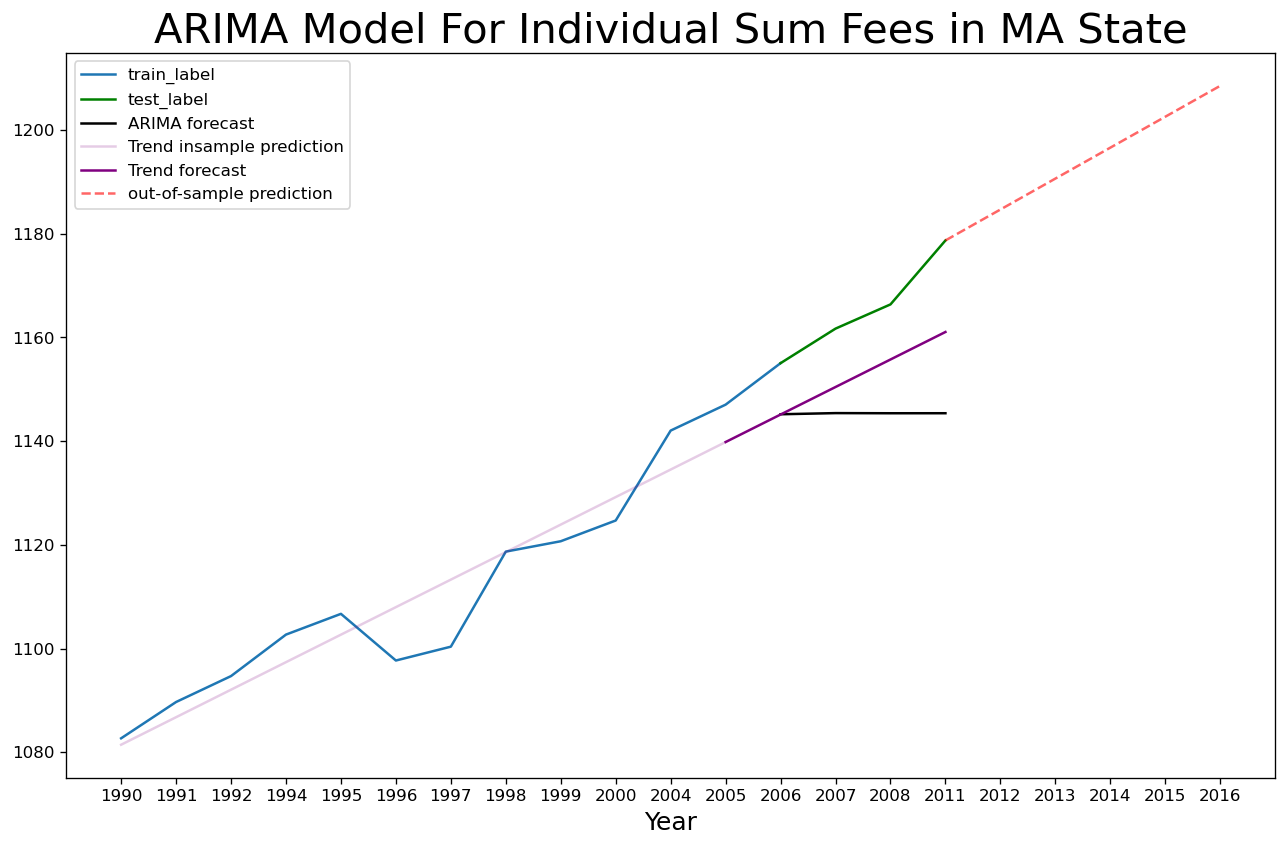

In [62]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_MA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N-1,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_MA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MA State', fontsize=25)
plt.legend(loc='upper left')

# MD Data

In [63]:
#Prepocessing the data first
df16 = pd.read_csv('MD.csv',index_col=None, header=0)
df16_temp = df16[(df16['liv_arr'] == 'Care home')]
df16_temp['state_indv_sum'] = df16_temp['state_indv']

temp = df16_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MD = pd.merge(left=df16,
              right=temp,
              how='left',
              on='year')
df_MD

year state                   liv_arr  \
0   1990    MD                 Care home   
1   1990    MD                 Care home   
2   1990    MD                 Care home   
3   1990    MD                   DomCare   
4   1991    MD                 Care home   
..   ...   ...                       ...   
77  2011    MD                 Care home   
78  2011    MD                 Care home   
79  2011    MD                 Care home   
80  2011    MD  Assisted living facility   
81  2011    MD  Rehabilitative residence   

                                  sub_cat  combn_indv  combn_cpl  state_indv  \
0                     Minimal supervision      457.75        0.0       71.75   
1                    Moderate supervision      584.75        0.0      198.75   
2   Specialized and intensive supervision     1063.75        0.0      677.75   
3                                     NaN      604.75        0.0      218.75   
4                     Minimal supervision      480.00        0.0       73.00   
..                                    ...         ...        ...         ...   
77                   Moderate supervision      849.00     1698.0      175.00   
78                  Extensive supervision     1137.00     2274.0      463.00   
79  Specialized and intensive supervision     1340.00     2680.0      666.00   
80                                    NaN      858.00     1716.0      184.00   
81                                    NaN       82.00      164.0       52.00   

    state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0         0.0     386.0      0.0      -71.75           False          948.25  
1         0.0     386.0      0.0     -198.75           False          948.25  
2         0.0     386.0      0.0     -677.75           False          948.25  
3         0.0     386.0      0.0     -218.75           False          948.25  
4         0.0     407.0      0.0      -73.00           False         1446.00  
..        ...       ...      ...         ...             ...             ...  
77      350.0     674.0   1348.0      175.00            True         1370.00  
78      926.0     674.0   1348.0      463.00            True         1370.00  
79     1332.0     674.0   1348.0      666.00            True         1370.00  
80      368.0     674.0   1348.0      184.00            True         1370.00  
81      104.0      30.0     60.0       52.00            True         1370.00  

[82 rows x 13 columns]

In [64]:
df_MD = df_MD[(df_MD['sub_cat'] == 'Minimal supervision') & (df_MD['liv_arr'] == 'Care home')]
df16 = df_MD[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df16['year'] = df16['year'].apply(str)
df_MD = df16.drop(columns = ['index'])
df_MD

year state    liv_arr  state_indv  state_indv_sum
0   1990    MD  Care home       71.75          948.25
1   1991    MD  Care home       73.00         1446.00
2   1992    MD  Care home       78.00         1466.00
3   1994    MD  Care home       66.00         1406.00
4   1995    MD  Care home       66.00         1382.00
5   1996    MD  Care home       66.00         1370.00
6   1997    MD  Care home       66.00         1370.00
7   1998    MD  Care home       66.00         1370.00
8   1999    MD  Care home       66.00         1370.00
9   2000    MD  Care home       66.00         1370.00
10  2004    MD  Care home       66.00         1370.00
11  2005    MD  Care home       66.00         1370.00
12  2006    MD  Care home       66.00         1370.00
13  2007    MD  Care home       66.00         1370.00
14  2008    MD  Care home       66.00         1370.00
15  2011    MD  Care home       66.00         1370.00

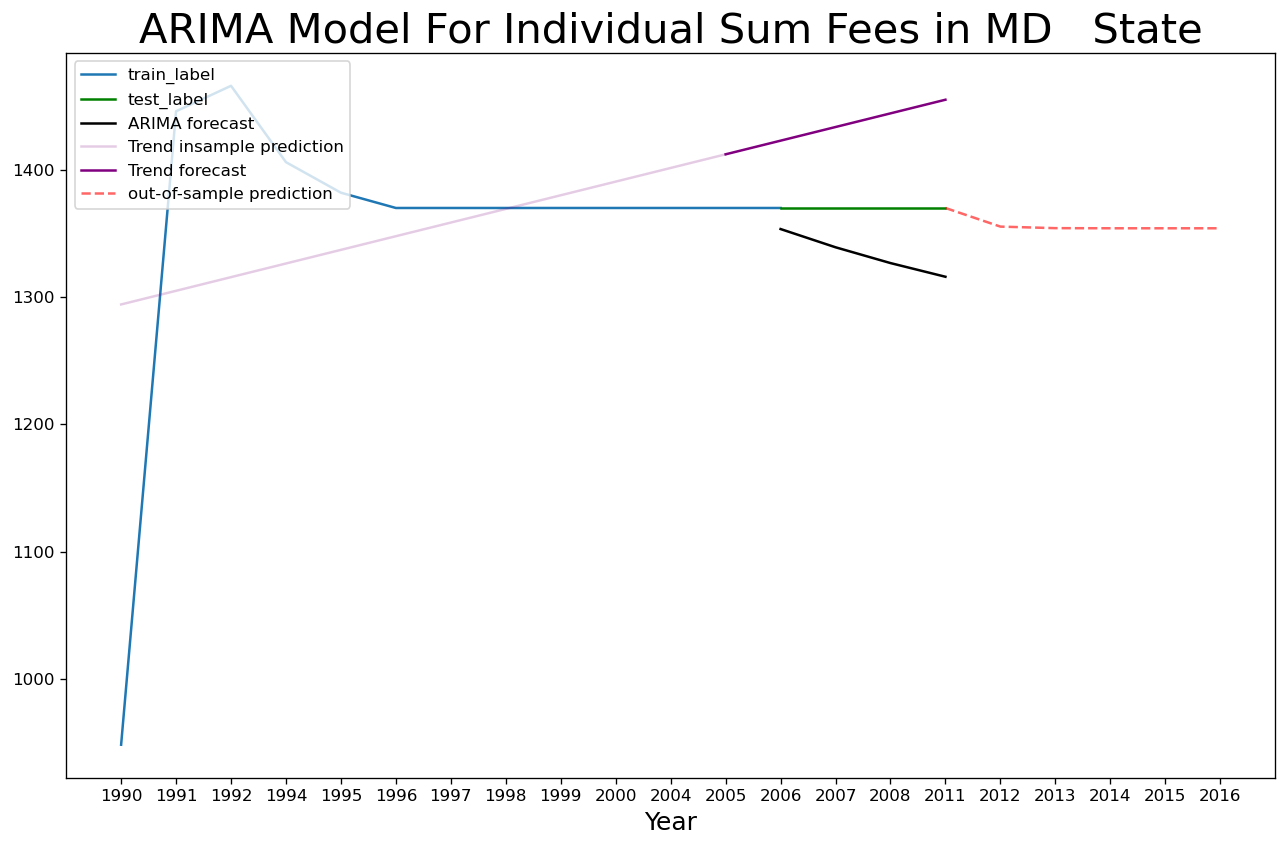

In [65]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_MD['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MD['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MD)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N-1,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MD['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MD.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MD.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_MD)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MD['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MD   State', fontsize=25)
plt.legend(loc='upper left')

# ME Data

In [66]:
#Prepocessing the data first
df17 = pd.read_csv('ME.csv',index_col=None, header=0)
df17_temp = df17[(df17['liv_arr'] == 'Living alone or with others')|(df17['liv_arr'] == 'Living in the household of another')|(df17['liv_arr'] == 'Foster home')|(df17['liv_arr'] == 'Flat rate boarding home')
                 |(df17['liv_arr'] == 'Cost reimbursement boarding home')|(df17['liv_arr'] == 'Medicaid facility')]


df17_temp['state_indv_sum'] = df17_temp['state_indv']

temp = df17_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_ME = pd.merge(left=df17,
              right=temp,
              how='left',
              on='year')
df_ME

year state                             liv_arr  sub_cat  combn_indv  \
0   1990    ME         Living alone or with others      NaN      396.00   
1   1990    ME  Living in the household of another      NaN      265.34   
2   1990    ME                         Foster home      NaN      450.00   
3   1990    ME             Flat rate boarding home      NaN      570.00   
4   1990    ME    Cost reimbursement boarding home      NaN      620.00   
..   ...   ...                                 ...      ...         ...   
91  2011    ME  Living in the household of another      NaN      457.34   
92  2011    ME                         Foster home      NaN      723.00   
93  2011    ME             Flat rate boarding home      NaN      891.00   
94  2011    ME    Cost reimbursement boarding home      NaN      908.00   
95  2011    ME                   Medicaid facility      NaN       40.00   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0       594.0        10.0       15.0    386.00    584.0         5.0   
1       398.0         8.0       12.0    257.34    390.0         4.0   
2       875.0        64.0      296.0    386.00    811.0       232.0   
3      1104.0       184.0      525.0    386.00    920.0       341.0   
4      1223.0       234.0      644.0    386.00    989.0       410.0   
..        ...         ...        ...       ...      ...         ...   
91      686.0         8.0       12.0    449.34    678.0         4.0   
92     1284.0        49.0      273.0    674.00   1235.0       224.0   
93     1601.0       217.0      590.0    674.00   1384.0       373.0   
94     1647.0       234.0      636.0    674.00   1413.0       402.0   
95       80.0        10.0       20.0     30.00     70.0        10.0   

    state_diff_dbl  state_indv_sum  
0            False           510.0  
1            False           510.0  
2            False           510.0  
3            False           510.0  
4            False           510.0  
..             ...             ...  
91           False           528.0  
92           False           528.0  
93           False           528.0  
94           False           528.0  
95            True           528.0  

[96 rows x 13 columns]

In [67]:
df_ME = df_ME[df_ME['liv_arr'] =='Living alone or with others']
df17 = df_ME[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df17['year'] = df17['year'].apply(str)
df_ME = df17.drop(columns = ['index'])
df_ME

year state                      liv_arr  state_indv  state_indv_sum
0   1990    ME  Living alone or with others        10.0           510.0
1   1991    ME  Living alone or with others        10.0           518.0
2   1992    ME  Living alone or with others        10.0           558.0
3   1994    ME  Living alone or with others        10.0           513.0
4   1995    ME  Living alone or with others        10.0           513.0
5   1996    ME  Living alone or with others        10.0           513.0
6   1997    ME  Living alone or with others        10.0           513.0
7   1998    ME  Living alone or with others        10.0           513.0
8   1999    ME  Living alone or with others        10.0           513.0
9   2000    ME  Living alone or with others        10.0           513.0
10  2004    ME  Living alone or with others        10.0           528.0
11  2005    ME  Living alone or with others        10.0           528.0
12  2006    ME  Living alone or with others        10.0           528.0
13  2007    ME  Living alone or with others        10.0           528.0
14  2008    ME  Living alone or with others        10.0           528.0
15  2011    ME  Living alone or with others        10.0           528.0

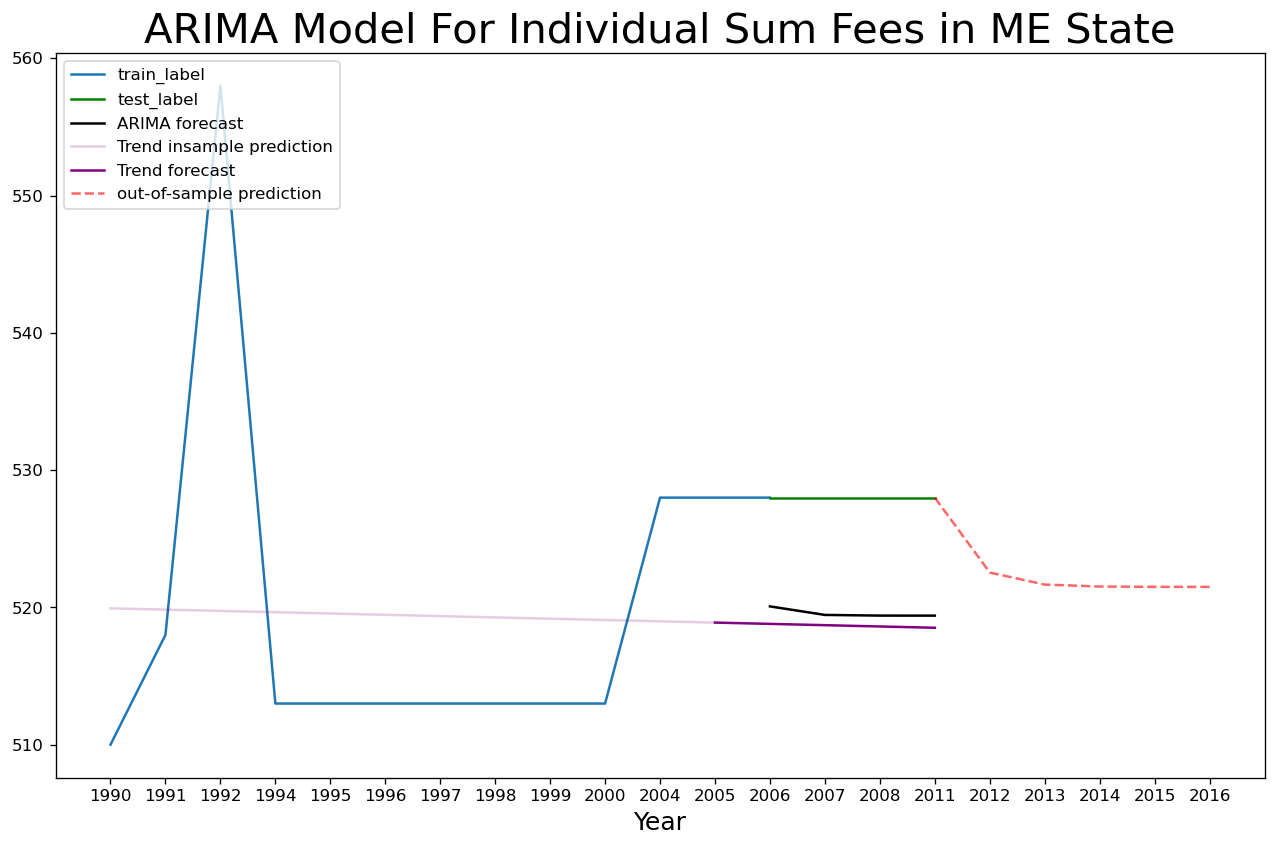

In [68]:
P=1
D=1
Q=1

#fit model
N = 12
series = df_ME['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_ME['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_ME)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_ME['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_ME.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_ME.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_ME)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_ME['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in ME State', fontsize=25)
plt.legend(loc='upper left')

# MI Data

In [69]:
#Prepocessing the data first
df18 = pd.read_csv('MI.csv',index_col=None, header=0)
df18_temp=df18[(df18['liv_arr'] == 'Living independently')|(df18['liv_arr'] == 'Living in household of another')|(df18['liv_arr'] == 'Living independently with essential person')|(df18['liv_arr'] == 'Living in the household of another with essential person')]
df18_temp['state_indv_sum'] = df18_temp['state_indv']

temp = df18_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MI = pd.merge(left=df18,
              right=temp,
              how='left',
              on='year')

In [70]:
df_MI = df_MI[(df_MI['liv_arr'] == 'Living independently')]
df18 = df_MI[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df18['year'] = df18['year'].apply(str)
df_MI = df18.drop(columns = ['index'])

df_MI

year state               liv_arr  state_indv  state_indv_sum
0   1990    MI  Living independently        30.2          102.40
1   1991    MI  Living independently        30.8          104.40
2   1992    MI  Living independently        14.0           46.66
3   1994    MI  Living independently        14.0           46.66
4   1995    MI  Living independently        14.0           46.66
5   1996    MI  Living independently        14.0           46.66
6   1997    MI  Living independently        14.0           46.66
7   1998    MI  Living independently        14.0           46.66
8   1999    MI  Living independently        14.0           46.66
9   2000    MI  Living independently        14.0           46.66
10  2004    MI  Living independently        14.0           46.66
11  2005    MI  Living independently        14.0           37.33
12  2006    MI  Living independently        14.0           37.33
13  2007    MI  Living independently        14.0           46.66
14  2008    MI  Living independently        14.0           46.66
15  2011    MI  Living independently        14.0           46.66

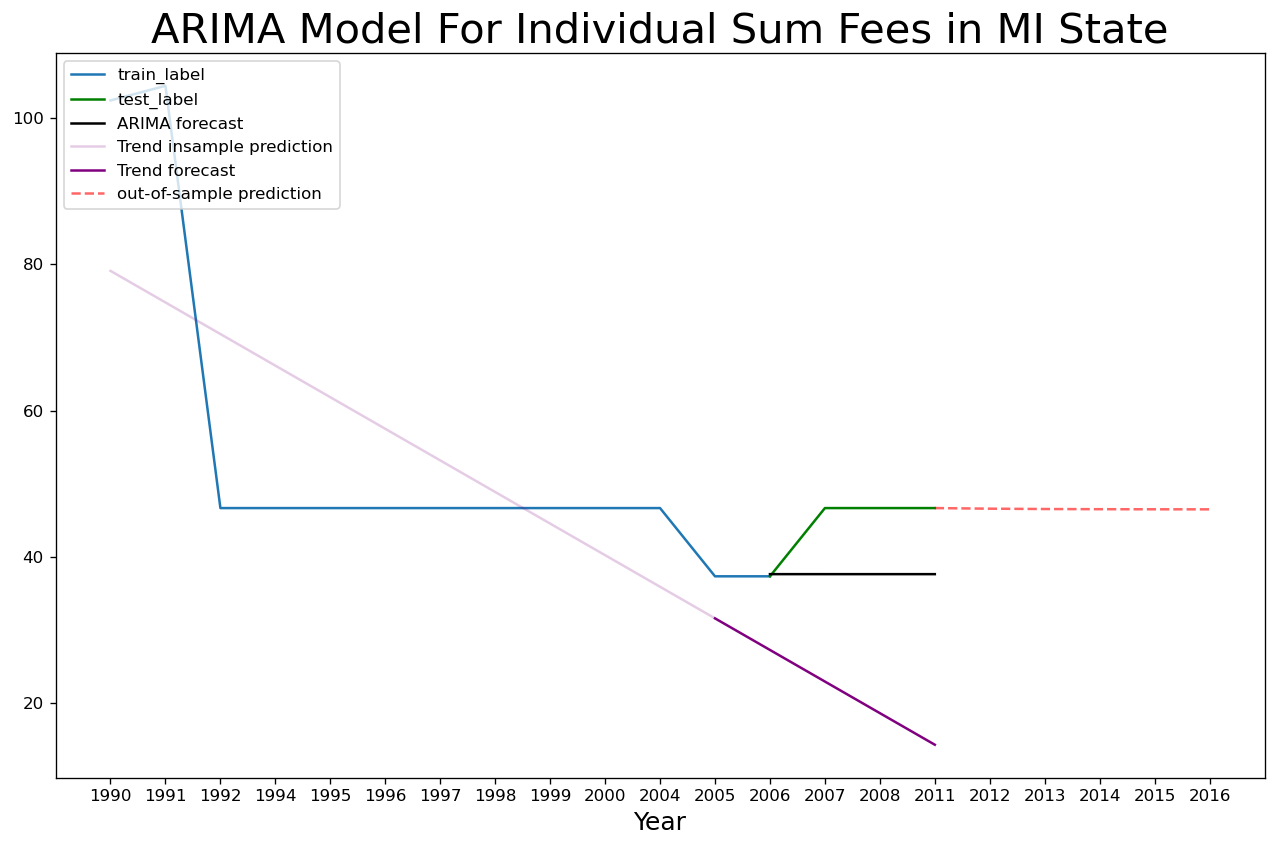

In [71]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_MI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MI['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MI)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MI.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MI.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_MI)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MI['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MI State', fontsize=25)
plt.legend(loc='upper left')

# MN Data

In [72]:
#Prepocessing the data first
df19 = pd.read_csv('MN.csv',index_col=None, header=0)
df19_temp = df19[(df19['liv_arr'] == 'Medicaid facility')|(df19['liv_arr'] == 'Living independently')|(df19['liv_arr'] == 'Living in household of another')]
df19_temp['state_indv_sum'] = df19_temp['state_indv']

temp = df19_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MN = pd.merge(left=df19,
              right=temp,
              how='left',
              on='year')
df_MN

year state                                liv_arr  \
0   1990    MN                   Living independently   
1   1990    MN         Living in household of another   
2   1990    MN  Nonmedical group residential facility   
3   1990    MN                      Medicaid facility   
4   1991    MN                   Living independently   
..   ...   ...                                    ...   
85  2011    MN                   Living independently   
86  2011    MN         Living in household of another   
87  2011    MN         Living in household of another   
88  2011    MN  Nonmedical group residential facility   
89  2011    MN                      Medicaid facility   

                      sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  \
0   Entitlement prior to 1994      461.00     667.00       75.00      88.00   
1   Entitlement prior to 1994      316.67     544.66       59.33     158.66   
2                         NaN      386.00       0.00        0.00       0.00   
3                         NaN       49.00      98.00       19.00      38.00   
4   Entitlement prior to 1994      488.00     742.00       81.00     132.00   
..                        ...         ...        ...         ...        ...   
85  Entitlement 1994 or later      735.00    1102.00       81.00     111.00   
86  Entitlement prior to 1994      542.00    1001.00      112.66     347.00   
87  Entitlement 1994 or later      542.00     738.00      112.66      84.00   
88                        NaN      915.00       0.00      261.00       0.00   
89                        NaN       89.00       0.00       59.00       0.00   

    fed_indv  fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0     386.00    579.0       13.00           False          153.33  
1     257.34    386.0       99.33           False          153.33  
2     386.00      0.0        0.00            True          153.33  
3      30.00     60.0       19.00            True          153.33  
4     407.00    610.0       51.00           False          213.00  
..       ...      ...         ...             ...             ...  
85    654.00    991.0       30.00           False          446.32  
86    429.34    654.0      234.34           False          446.32  
87    429.34    654.0      -28.66           False          446.32  
88    654.00      0.0     -261.00           False          446.32  
89     30.00      0.0      -59.00           False          446.32  

[90 rows x 13 columns]

In [73]:
df_MN = df_MN[df19['liv_arr'] == 'Medicaid facility']
df19 = df_MN[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df19['year'] = df19['year'].apply(str)
df_MN = df19.drop(columns = ['index'])
df_MN

year state            liv_arr  state_indv  state_indv_sum
0   1990    MN  Medicaid facility        19.0          153.33
1   1991    MN  Medicaid facility        22.0          213.00
2   1992    MN  Medicaid facility        24.0          215.00
3   1994    MN  Medicaid facility        27.0          409.00
4   1995    MN  Medicaid facility        29.0          411.00
5   1996    MN  Medicaid facility        31.0          413.00
6   1997    MN  Medicaid facility        33.0          415.00
7   1998    MN  Medicaid facility        34.0          416.00
8   1999    MN  Medicaid facility        35.0          417.00
9   2000    MN  Medicaid facility        37.0          419.00
10  2004    MN  Medicaid facility        44.0          428.00
11  2005    MN  Medicaid facility        46.0          350.00
12  2006    MN  Medicaid facility        49.0          433.00
13  2007    MN  Medicaid facility        49.0          433.00
14  2008    MN  Medicaid facility        54.0          440.66
15  2011    MN  Medicaid facility        59.0          446.32

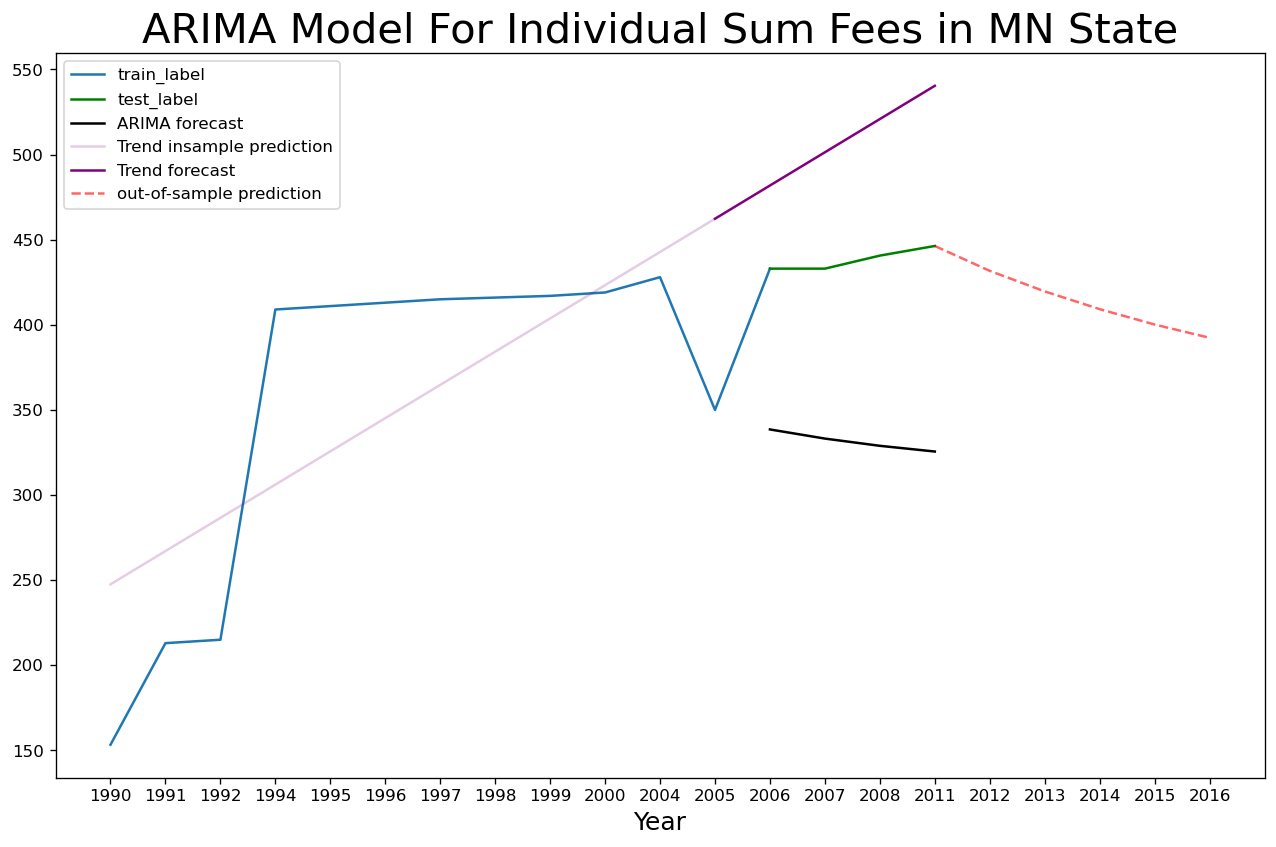

In [74]:
P=1
D=0
Q=1

# fit model
N = 12
series = df_MN['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MN['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MN)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MN['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MN.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MN.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_MN)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MN['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MN State', fontsize=25)
plt.legend(loc='upper left')

# MO Data

In [75]:
#Prepocessing the data first
df20 = pd.read_csv('MO.csv',index_col=None, header=0)
df20_temp = df20[(df20['liv_arr'] == 'Licensed residential care facility')|(df20['liv_arr'] == 'Licensed intermediate care or skilled nursing home')]
df20_temp['state_indv_sum'] = df20_temp['state_indv']

temp = df20_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MO = pd.merge(left=df20,
              right=temp,
              how='left',
              on='year')
df_MO

year state                                            liv_arr sub_cat  \
0   1990    MO                 Licensed residential care facility       I   
1   1990    MO                 Licensed residential care facility      II   
2   1990    MO  Licensed intermediate care or skilled nursing ...     NaN   
3   1990    MO                                   Aid to the blind     NaN   
4   1991    MO                 Licensed residential care facility       I   
..   ...   ...                                                ...     ...   
59  2008    MO                                   Aid to the blind     NaN   
60  2011    MO                 Licensed residential care facility       I   
61  2011    MO                 Licensed residential care facility      II   
62  2011    MO  Licensed intermediate care or skilled nursing ...     NaN   
63  2011    MO                                   Aid to the blind     NaN   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        532.0      871.0       146.0      292.0     386.0    579.0   
1        659.0     1125.0       273.0      546.0     386.0    579.0   
2        750.0     1307.0       364.0      728.0     386.0    579.0   
3          0.0        0.0       297.0      594.0    -297.0   -594.0   
4        555.0      906.0       148.0      296.0     407.0    610.0   
..         ...        ...         ...        ...       ...      ...   
59       510.0     1020.0       510.0     1020.0       0.0      0.0   
60       830.0     1323.0       156.0      312.0     674.0   1011.0   
61       966.0     1595.0       292.0      584.0     674.0   1011.0   
62      1064.0     1791.0       390.0      780.0     674.0   1011.0   
63       510.0     1020.0       510.0     1020.0       0.0      0.0   

    state_diff  state_diff_dbl  state_indv_sum  
0        146.0            True           783.0  
1        273.0            True           783.0  
2        364.0            True           783.0  
3        297.0            True           783.0  
4        148.0            True           792.0  
..         ...             ...             ...  
59       510.0            True           838.0  
60       156.0            True           838.0  
61       292.0            True           838.0  
62       390.0            True           838.0  
63       510.0            True           838.0  

[64 rows x 13 columns]

In [76]:
df_MO = df_MO[(df_MO['liv_arr'] == 'Licensed intermediate care or skilled nursing home')]
df20 = df_MO[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df20['year'] = df20['year'].apply(str)
df_MO = df20.drop(columns = ['index'])
df_MO


year state                                            liv_arr  state_indv  \
0   1990    MO  Licensed intermediate care or skilled nursing ...       364.0   
1   1991    MO  Licensed intermediate care or skilled nursing ...       368.0   
2   1992    MO  Licensed intermediate care or skilled nursing ...       368.0   
3   1994    MO  Licensed intermediate care or skilled nursing ...       368.0   
4   1995    MO  Licensed intermediate care or skilled nursing ...       368.0   
5   1996    MO  Licensed intermediate care or skilled nursing ...       368.0   
6   1997    MO  Licensed intermediate care or skilled nursing ...       375.0   
7   1998    MO  Licensed intermediate care or skilled nursing ...       375.0   
8   1999    MO  Licensed intermediate care or skilled nursing ...       383.0   
9   2000    MO  Licensed intermediate care or skilled nursing ...       383.0   
10  2004    MO  Licensed intermediate care or skilled nursing ...       390.0   
11  2005    MO  Licensed intermediate care or skilled nursing ...       390.0   
12  2006    MO  Licensed intermediate care or skilled nursing ...       390.0   
13  2007    MO  Licensed intermediate care or skilled nursing ...       390.0   
14  2008    MO  Licensed intermediate care or skilled nursing ...       390.0   
15  2011    MO  Licensed intermediate care or skilled nursing ...       390.0   

    state_indv_sum  
0            783.0  
1            792.0  
2            792.0  
3            792.0  
4            792.0  
5            792.0  
6            808.0  
7            808.0  
8            825.0  
9            825.0  
10           838.0  
11           838.0  
12           838.0  
13           838.0  
14           838.0  
15           838.0

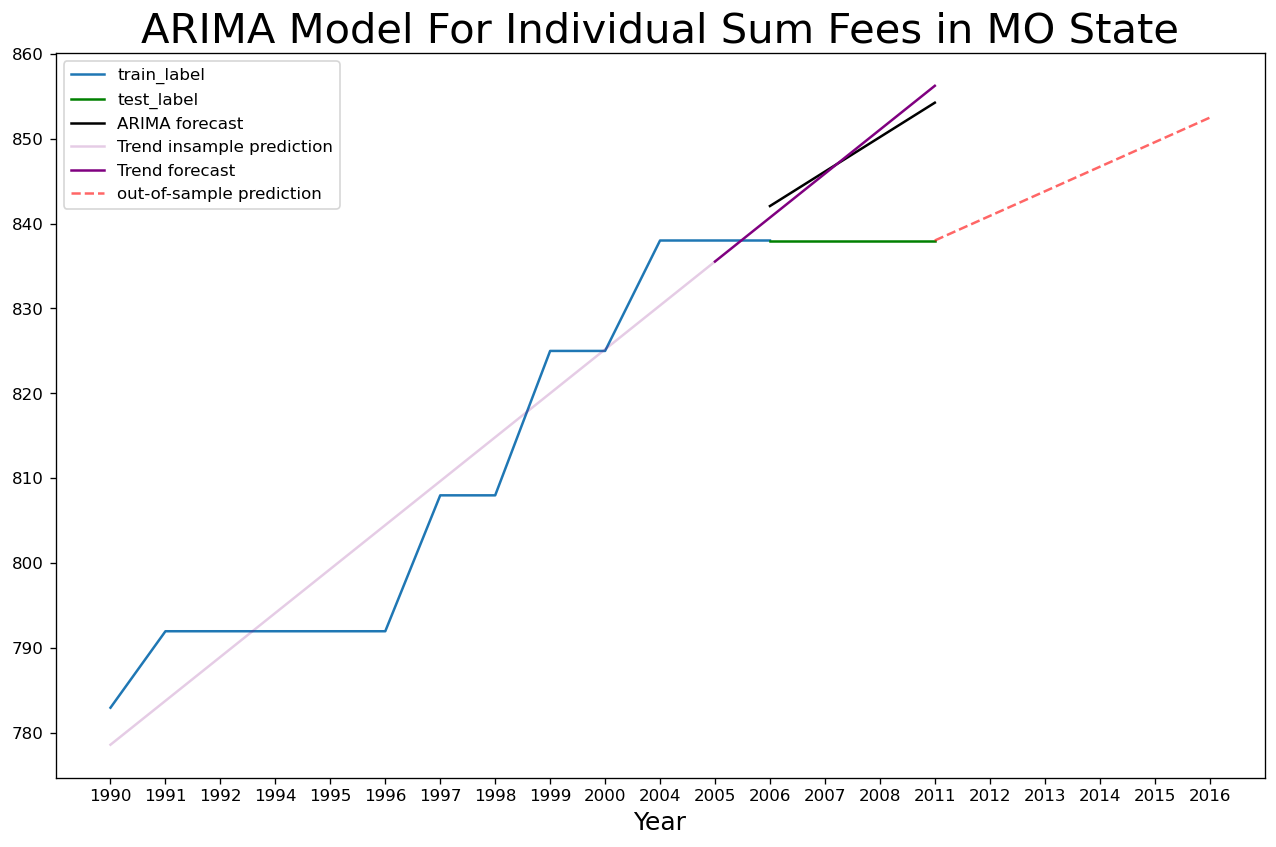

In [77]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_MO['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MO['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MO)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N-1,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MO['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MO.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MO.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_MO)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MO['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MO State', fontsize=25)
plt.legend(loc='upper left')

# MT Data

In [78]:
#Prepocessing the data first
df21 = pd.read_csv('MT.csv',index_col=None, header=0)
df21_temp = df21[(df21['liv_arr'] == 'Personal care facilities')| (df21['liv_arr'] == 'Group home for the mentally ill or disabled')| (df21['liv_arr'] == 'Community home for physically or developmentally disabled')]
df21_temp['state_indv_sum'] = df21_temp['state_indv']

temp = df21_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_MT = pd.merge(left=df21,
              right=temp,
              how='left',
              on='year')
df_MT

year state                                            liv_arr  sub_cat  \
0   1990    MT                           Personal care facilities      NaN   
1   1990    MT        Group home for the mentally ill or disabled      NaN   
2   1990    MT  Community home for physically or developmental...      NaN   
3   1990    MT                        Child and adult foster care      NaN   
4   1990    MT  Transitional living services for developmental...      NaN   
..   ...   ...                                                ...      ...   
75  2011    MT                           Personal care facilities      NaN   
76  2011    MT        Group home for the mentally ill or disabled      NaN   
77  2011    MT  Community home for physically or developmental...      NaN   
78  2011    MT                        Child and adult foster care      NaN   
79  2011    MT  Transitional living services for developmental...      NaN   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0       480.00      772.0       94.00      193.0     386.0    579.0   
1       480.00      772.0       94.00      193.0     386.0    579.0   
2       480.00      772.0       94.00      193.0     386.0    579.0   
3       438.75      689.5       52.75      110.5     386.0    579.0   
4       412.00      636.0       26.00       57.0     386.0    579.0   
..         ...        ...         ...        ...       ...      ...   
75      768.00     1204.0       94.00      193.0     674.0   1011.0   
76      768.00     1204.0       94.00      193.0     674.0   1011.0   
77      768.00     1204.0       94.00      193.0     674.0   1011.0   
78      726.75     1121.5       52.75      110.5     674.0   1011.0   
79      700.00     1068.0       26.00       57.0     674.0   1011.0   

    state_diff  state_diff_dbl  state_indv_sum  
0        99.00           False           282.0  
1        99.00           False           282.0  
2        99.00           False           282.0  
3        57.75           False           282.0  
4        31.00           False           282.0  
..         ...             ...             ...  
75       99.00           False           282.0  
76       99.00           False           282.0  
77       99.00           False           282.0  
78       57.75           False           282.0  
79       31.00           False           282.0  

[80 rows x 13 columns]

In [79]:
df_MT = df_MT[(df_MT['liv_arr'] == 'Personal care facilities')]
df21 = df_MT[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df21['year'] = df21['year'].apply(str)
df_MT = df21.drop(columns = ['index'])
df_MT

year state                   liv_arr  state_indv  state_indv_sum
0   1990    MT  Personal care facilities        94.0           282.0
1   1991    MT  Personal care facilities        94.0           282.0
2   1992    MT  Personal care facilities        94.0           282.0
3   1994    MT  Personal care facilities        94.0           282.0
4   1995    MT  Personal care facilities        94.0           282.0
5   1996    MT  Personal care facilities        94.0           282.0
6   1997    MT  Personal care facilities        94.0           282.0
7   1998    MT  Personal care facilities        94.0           282.0
8   1999    MT  Personal care facilities        94.0           282.0
9   2000    MT  Personal care facilities        94.0           282.0
10  2004    MT  Personal care facilities        94.0           282.0
11  2005    MT  Personal care facilities        94.0           282.0
12  2006    MT  Personal care facilities        94.0           282.0
13  2007    MT  Personal care facilities        94.0           282.0
14  2008    MT  Personal care facilities        94.0           282.0
15  2011    MT  Personal care facilities        94.0           282.0

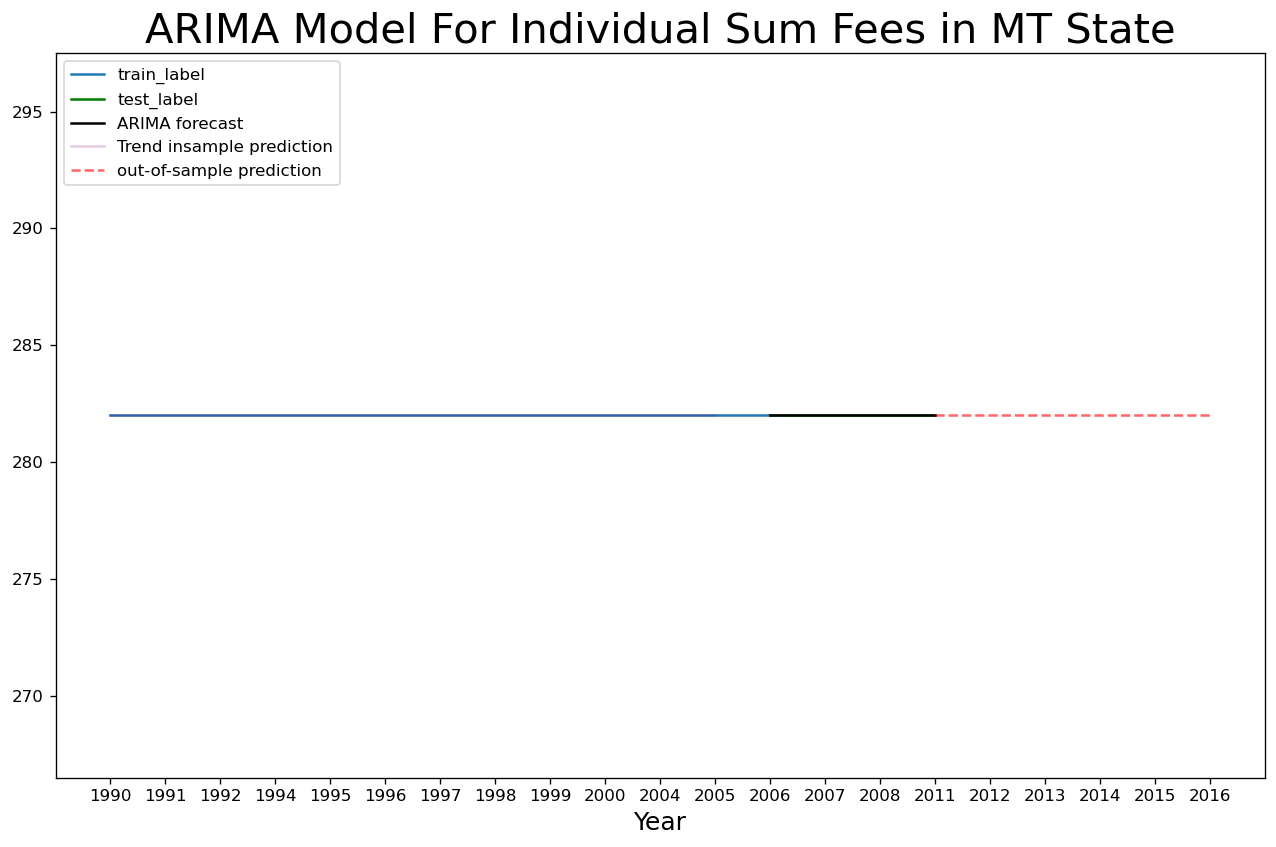

In [80]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_MT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_MT['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_MT)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N-1,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_MT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_MT.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_MT.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
#ax.plot(range(N-1,len(df_MT)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_MT['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in MT State', fontsize=25)
plt.legend(loc='upper left')

# NC Data

In [81]:
#Prepocessing the data first
df22 = pd.read_csv('NC.csv',index_col=None, header=0)
df22_temp = df22[(df22['liv_arr'] == 'Adult care home')|(df22['liv_arr'] == 'Blind ineligible for SSI')]
df22_temp['state_indv_sum'] = df22_temp['state_indv']

temp = df22_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NC = pd.merge(left=df22,
              right=temp,
              how='left',
              on='year')
df_NC

year state                   liv_arr                       sub_cat  \
0   1990    NC           Adult care home                    Ambulatory   
1   1990    NC           Adult care home               Semi-ambulatory   
2   1990    NC  Blind ineligible for SSI  Not paying shelter/utilities   
3   1990    NC  Blind ineligible for SSI      Paying shelter/utilities   
4   1991    NC           Adult care home                    Ambulatory   
..   ...   ...                       ...                           ...   
72  2008    NC           Adult care home                       In home   
73  2008    NC  Blind ineligible for SSI  Not paying shelter/utilities   
74  2008    NC  Blind ineligible for SSI      Paying shelter/utilities   
75  2011    NC           Adult care home                         Basic   
76  2011    NC           Adult care home             Special care unit   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        724.0     1135.0       338.0      556.0     386.0    579.0   
1        760.0     1171.0       374.0      592.0     386.0    579.0   
2          0.0        0.0        97.0      194.0     -97.0   -194.0   
3          0.0        0.0       146.0      243.0    -146.0   -243.0   
4        756.0     1188.0       349.0      578.0     407.0    610.0   
..         ...        ...         ...        ...       ...      ...   
72       914.0        0.0       277.0        0.0     637.0      0.0   
73         0.0        0.0        97.0      194.0     -97.0   -194.0   
74         0.0        0.0       146.0      243.0    -146.0   -243.0   
75      1228.0        0.0       554.0        0.0     674.0      0.0   
76      1561.0        0.0       887.0        0.0     674.0      0.0   

    state_diff  state_diff_dbl  state_indv_sum  
0        218.0           False           955.0  
1        218.0           False           955.0  
2         97.0            True           955.0  
3         97.0           False           955.0  
4        229.0           False           978.0  
..         ...             ...             ...  
72      -277.0           False          3377.0  
73        97.0            True          3377.0  
74        97.0           False          3377.0  
75      -554.0           False          1441.0  
76      -887.0           False          1441.0  

[77 rows x 13 columns]

In [82]:
df_NC = df_NC[(df_NC['liv_arr'] == 'Adult care home') ]

df22 = df_NC[['year','state','liv_arr','state_indv','state_indv_sum']]
df22 = df22.drop_duplicates(subset='year', keep='first').reset_index()
df22['year'] = df22['year'].apply(str)
df_NC = df22.drop(columns = ['index'])
df_NC

year state          liv_arr  state_indv  state_indv_sum
0   1990    NC  Adult care home       338.0           955.0
1   1991    NC  Adult care home       349.0           978.0
2   1992    NC  Adult care home       410.0          1102.0
3   1994    NC  Adult care home       519.0          1322.0
4   1995    NC  Adult care home       548.0          1381.0
5   1996    NC  Adult care home       405.0          1731.0
6   1997    NC  Adult care home       421.0          1750.0
7   1998    NC  Adult care home       430.0          1739.0
8   1999    NC  Adult care home       430.0          1739.0
9   2000    NC  Adult care home       470.0          2151.0
10  2004    NC  Adult care home       548.0          2217.0
11  2005    NC  Adult care home       551.0          1910.0
12  2006    NC  Adult care home       561.0          3110.0
13  2007    NC  Adult care home       571.0          3377.0
14  2008    NC  Adult care home       571.0          3377.0
15  2011    NC  Adult care home       554.0          1441.0

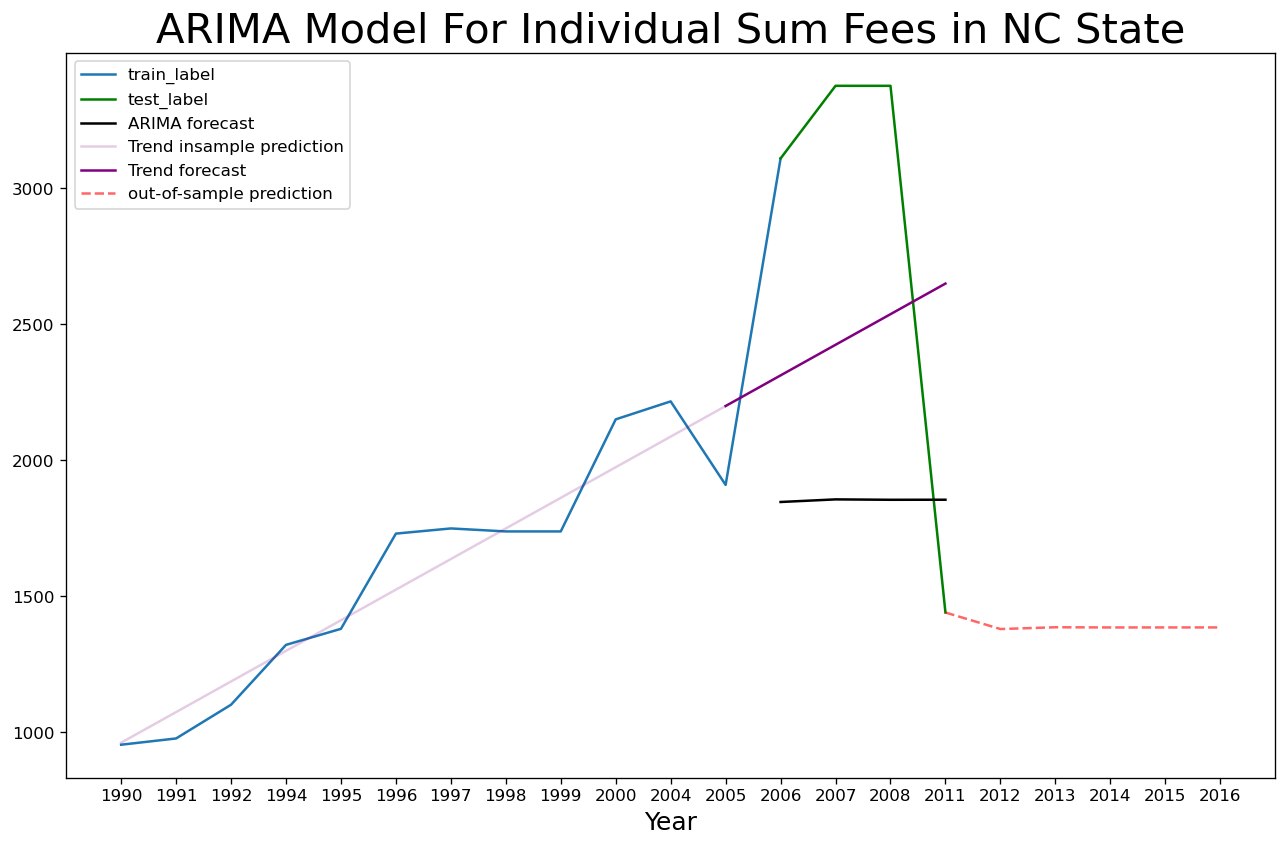

In [83]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NC['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NC)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_NC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NC.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NC.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NC)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NC['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NC State', fontsize=25)
plt.legend(loc='upper left')

# NE Data

In [84]:
#Prepocessing the data first
df23 = pd.read_csv('NE.csv',index_col=None, header=0)
#df23_temp = df23[(df23['liv_arr'] == 'Licensed assisted living facility')|(df23['liv_arr'] == 'Licensed group home for children or child caring agency')|(df23['liv_arr'] == 'Licensed center for developmentally disabled')]
df23_temp = df23[(df23['liv_arr'] == 'Living independently')|(df23['liv_arr'] == 'Living with an essential person')|(df23['liv_arr'] == 'Licensed assisted living facility')|(df23['liv_arr'] == 'Licensed group home for children or child caring agency')|(df23['liv_arr'] == 'Licensed center for developmentally disabled')]
df23_temp['state_indv_sum'] = df23_temp['state_indv']

temp = df23_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NE = pd.merge(left=df23,
              right=temp,
              how='left',
              on='year')
df_NE

year state                                            liv_arr  sub_cat  \
0    1990    NE                               Living independently      NaN   
1    1990    NE                    Living with an essential person      NaN   
2    1990    NE                            Room and board facility      NaN   
3    1990    NE                      Licensed domiciliary facility      NaN   
4    1990    NE                        Certified adult family home      NaN   
..    ...   ...                                                ...      ...   
118  2011    NE                        Certified adult family home      NaN   
119  2011    NE       Licensed center for developmentally disabled      NaN   
120  2011    NE  Licensed group home for children or child cari...      NaN   
121  2011    NE                  Licensed assisted living facility      NaN   
122  2011    NE                                  Medicaid facility      NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0         423.5      644.0        37.5       65.0     386.0    579.0   
1         644.0        0.0        65.0        0.0     579.0      0.0   
2         389.5      770.0         3.5      191.0     386.0    579.0   
3         471.5      934.0        85.5      355.0     386.0    579.0   
4         466.5      924.0        80.5      345.0     386.0    579.0   
..          ...        ...         ...        ...       ...      ...   
118       802.0     1604.0       128.0      593.0     674.0   1011.0   
119       674.0     1348.0         0.0      337.0     674.0   1011.0   
120       738.0        0.0        64.0        0.0     674.0      0.0   
121      1112.0     2224.0       438.0     1213.0     674.0   1011.0   
122        50.0      100.0        20.0       40.0      30.0     60.0   

     state_diff  state_diff_dbl  state_indv_sum  
0          27.5           False           352.0  
1         -65.0           False           352.0  
2         187.5           False           352.0  
3         269.5           False           352.0  
4         264.5           False           352.0  
..          ...             ...             ...  
118       465.0           False           507.0  
119       337.0           False           507.0  
120       -64.0           False           507.0  
121       775.0           False           507.0  
122        20.0            True           507.0  

[123 rows x 13 columns]

In [85]:
df_NE = df_NE[(df_NE['liv_arr'] == 'Living independently') ]

df23 = df_NE[['year','state','liv_arr','state_indv','state_indv_sum']]
df23 = df23.drop_duplicates(subset='year', keep='first').reset_index()
df23['year'] = df23['year'].apply(str)
df_NE = df23.drop(columns = ['index'])
df_NE

year state               liv_arr  state_indv  state_indv_sum
0   1990    NE  Living independently        37.5          352.00
1   1991    NE  Living independently        24.0          261.00
2   1992    NE  Living independently        30.0          300.00
3   1994    NE  Living independently        21.0          356.00
4   1995    NE  Living independently        19.0          355.00
5   1996    NE  Living independently        12.0          356.00
6   1997    NE  Living independently         8.0          348.00
7   1998    NE  Living independently         8.0          443.00
8   1999    NE  Living independently        27.0          461.00
9   2000    NE  Living independently         7.0          400.00
10  2004    NE  Living independently        12.0          560.00
11  2005    NE  Living independently         9.0         1538.00
12  2006    NE  Living independently         0.0          700.00
13  2007    NE  Living independently         9.0          705.66
14  2008    NE  Living independently         7.0          509.00
15  2011    NE  Living independently         5.0          507.00

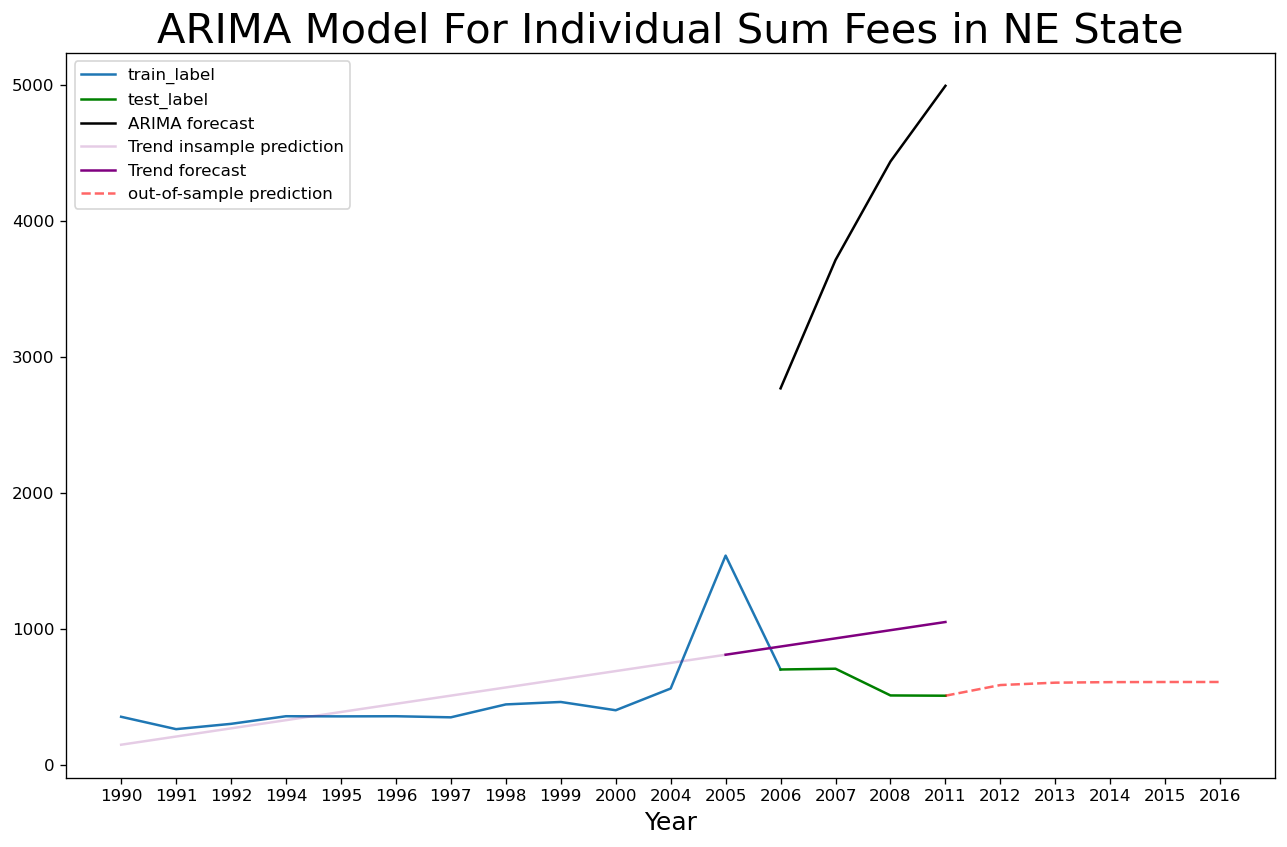

In [86]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NE['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NE['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NE)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_NE['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NE.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NE.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NE)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NE['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NE State', fontsize=25)
plt.legend(loc='upper left')

# NH Data

In [87]:
#Prepocessing the data first
df24 = pd.read_csv('NH.csv',index_col=None, header=0)
df24_temp = df24[(df24['liv_arr'] == 'Living independently or household of another')|(df24['liv_arr'] == 'Living with an essential person')|(df24['liv_arr'] == 'Residential care facility for adults')]
df24_temp['state_indv_sum'] = df24_temp['state_indv']

temp = df24_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NH = pd.merge(left=df24,
              right=temp,
              how='left',
              on='year')
df_NH

year state                                       liv_arr        sub_cat  \
0    1990    NH  Living independently or household of another            NaN   
1    1990    NH               Living with an essential person            NaN   
2    1990    NH          Residential care facility for adults            NaN   
3    1990    NH                          Community residences  Nonsubsidized   
4    1990    NH                             Medicaid facility            NaN   
..    ...   ...                                           ...            ...   
101  2011    NH          Residential care facility for adults            NaN   
102  2011    NH               Enhanced family care facilities            NaN   
103  2011    NH                          Community residences  Nonsubsidized   
104  2011    NH                          Community residences     Subsidized   
105  2011    NH                             Medicaid facility            NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0         413.0      600.0        27.0       21.0     386.0    579.0   
1           0.0      785.0         0.0       13.0       0.0    772.0   
2         653.0     1306.0       267.0      534.0     386.0    772.0   
3         595.0     1190.0       196.0      392.0     399.0    798.0   
4          40.0       80.0        10.0       20.0      30.0     60.0   
..          ...        ...         ...        ...       ...      ...   
101       868.0     1736.0       207.0      414.0     661.0   1322.0   
102       868.0     1736.0       207.0      414.0     661.0   1322.0   
103       810.0        0.0       149.0        0.0     661.0      0.0   
104       750.0        0.0        89.0        0.0     661.0      0.0   
105        65.0        0.0        35.0        0.0      30.0      0.0   

     state_diff  state_diff_dbl  state_indv_sum  
0          -6.0           False           294.0  
1          13.0           False           294.0  
2         267.0            True           294.0  
3         196.0            True           294.0  
4          10.0            True           294.0  
..          ...             ...             ...  
101       207.0            True           234.0  
102       207.0            True           234.0  
103      -149.0           False           234.0  
104       -89.0           False           234.0  
105       -35.0           False           234.0  

[106 rows x 13 columns]

In [88]:
df_NH = df_NH[(df_NH['liv_arr'] == 'Living with an essential person')]
df24 = df_NH[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df24['year'] = df24['year'].apply(str)
df_NH = df24.drop(columns = ['index'])
df_NH

year state                          liv_arr  state_indv  state_indv_sum
0   1990    NH  Living with an essential person         0.0           294.0
1   1991    NH  Living with an essential person         0.0           273.0
2   1992    NH  Living with an essential person         0.0           258.0
3   1994    NH  Living with an essential person         0.0           234.0
4   1995    NH  Living with an essential person         0.0           240.0
5   1996    NH  Living with an essential person         0.0           245.0
6   1997    NH  Living with an essential person         0.0           234.0
7   1998    NH  Living with an essential person         0.0           234.0
8   1999    NH  Living with an essential person         0.0           234.0
9   2000    NH  Living with an essential person         0.0           234.0
10  2004    NH  Living with an essential person         0.0           234.0
11  2005    NH  Living with an essential person         0.0           234.0
12  2006    NH  Living with an essential person         0.0           234.0
13  2007    NH  Living with an essential person         0.0           234.0
14  2008    NH  Living with an essential person         0.0           282.0
15  2011    NH  Living with an essential person         0.0           234.0

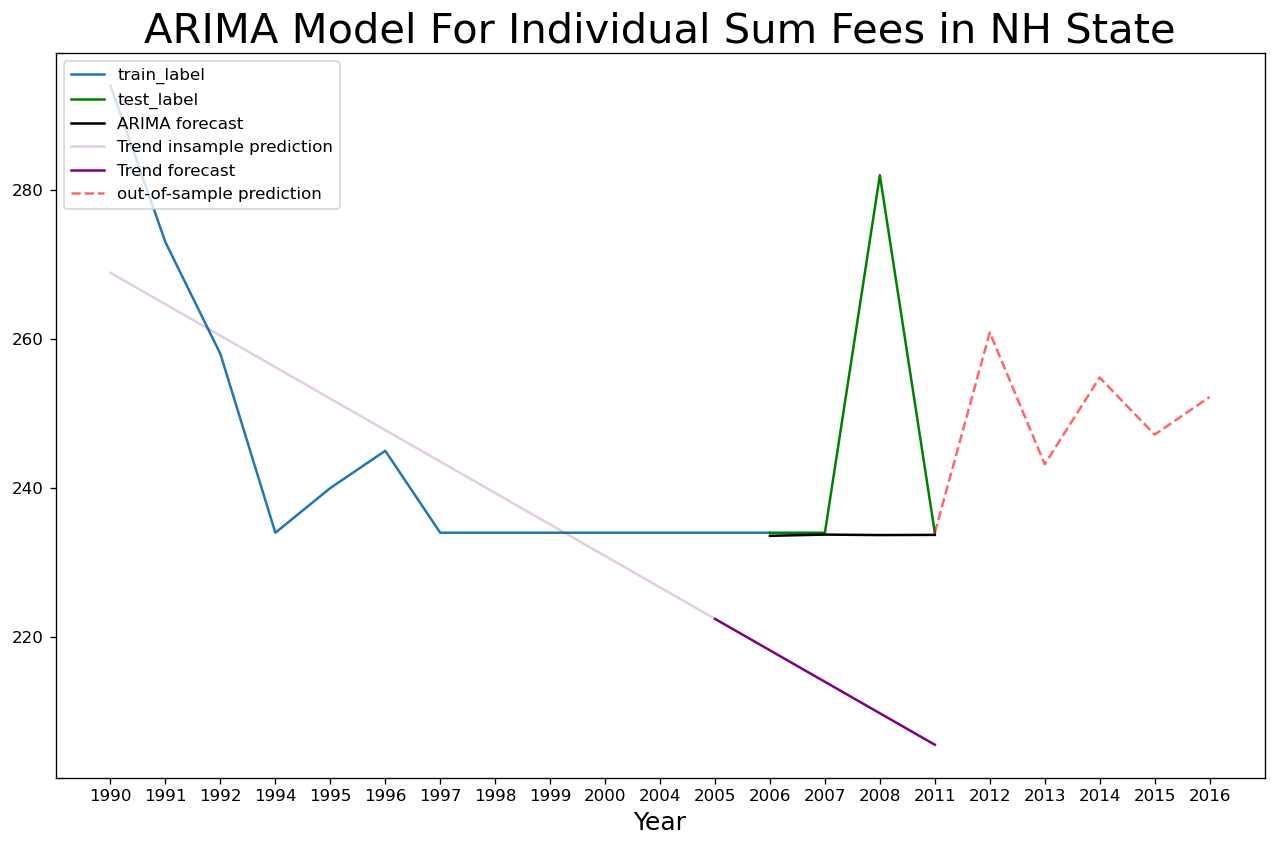

In [89]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NH['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NH['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NH)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_NH['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NH.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NH.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NH)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NH['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NH State', fontsize=25)
plt.legend(loc='upper left')

# NJ Data

In [90]:
#Prepocessing the data first
df25 = pd.read_csv('NJ.csv',index_col=None, header=0)
df25_temp = df25[(df25['liv_arr'] == 'Licensed residential facility')|(df25['liv_arr'] == 'Living alone or with others')|(df25['liv_arr'] == 'Living alone with an ineligible spouse')|(df25['liv_arr'] == 'Living with essential person')]
df25_temp['state_indv_sum'] = df25_temp['state_indv']

temp = df25_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NJ = pd.merge(left=df25,
              right=temp,
              how='left',
              on='year')
df_NJ

year state                                 liv_arr  sub_cat  combn_indv  \
0   1990    NJ           Licensed residential facility      NaN      536.05   
1   1990    NJ             Living alone or with others      NaN      417.25   
2   1990    NJ  Living alone with an ineligible spouse      NaN      604.36   
3   1990    NJ            Living with essential person      NaN      604.36   
4   1990    NJ          Living in household of another      NaN      301.65   
..   ...   ...                                     ...      ...         ...   
95  2011    NJ  Living alone with an ineligible spouse      NaN      827.00   
96  2011    NJ            Living with essential person      NaN     1037.36   
97  2011    NJ          Living in household of another      NaN      493.65   
98  2011    NJ                       Medicaid facility      NaN       40.00   
99  2011    NJ        Residential health care facility      NaN      884.05   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0     1053.36      150.05     474.36    386.00    579.0      324.31   
1      604.36       31.25      25.36    386.00    579.0       -5.89   
2        0.00      218.36       0.00    386.00      0.0     -218.36   
3        0.00       25.36       0.00    579.00      0.0      -25.36   
4      479.09       44.31      93.09    257.34    386.0       48.78   
..        ...         ...        ...       ...      ...         ...   
95       0.00      153.00       0.00    674.00      0.0     -153.00   
96       0.00       25.36       0.00   1012.00      0.0      -25.36   
97     767.09       44.31      93.09    449.34    674.0       48.78   
98      80.00       10.00      20.00     30.00     60.0       10.00   
99    1749.36      210.05     738.36    674.00   1011.0      528.31   

    state_diff_dbl  state_indv_sum  
0            False          425.02  
1            False          425.02  
2            False          425.02  
3            False          425.02  
4            False          425.02  
..             ...             ...  
95           False          209.61  
96           False          209.61  
97           False          209.61  
98            True          209.61  
99           False          209.61  

[100 rows x 13 columns]

In [91]:
df_NJ = df_NJ[(df_NJ['liv_arr'] == 'Living with essential person')]
df25 = df_NJ[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df25['year'] = df25['year'].apply(str)
df_NJ = df25.drop(columns = ['index'])
df_NJ

year state                       liv_arr  state_indv  state_indv_sum
0   1990    NJ  Living with essential person       25.36          425.02
1   1991    NJ  Living with essential person       24.36          434.02
2   1992    NJ  Living with essential person       25.36          443.02
3   1994    NJ  Living with essential person       25.36          455.02
4   1995    NJ  Living with essential person       25.36          461.02
5   1996    NJ  Living with essential person       25.36          467.02
6   1997    NJ  Living with essential person       25.36          474.02
7   1998    NJ  Living with essential person       25.36          328.97
8   1999    NJ  Living with essential person       26.36          329.97
9   2000    NJ  Living with essential person       25.36          328.97
10  2004    NJ  Living with essential person       25.36          363.97
11  2005    NJ  Living with essential person       25.36          371.97
12  2006    NJ  Living with essential person       24.36          381.97
13  2007    NJ  Living with essential person       24.36          391.97
14  2008    NJ  Living with essential person       25.36          400.97
15  2011    NJ  Living with essential person       25.36          209.61

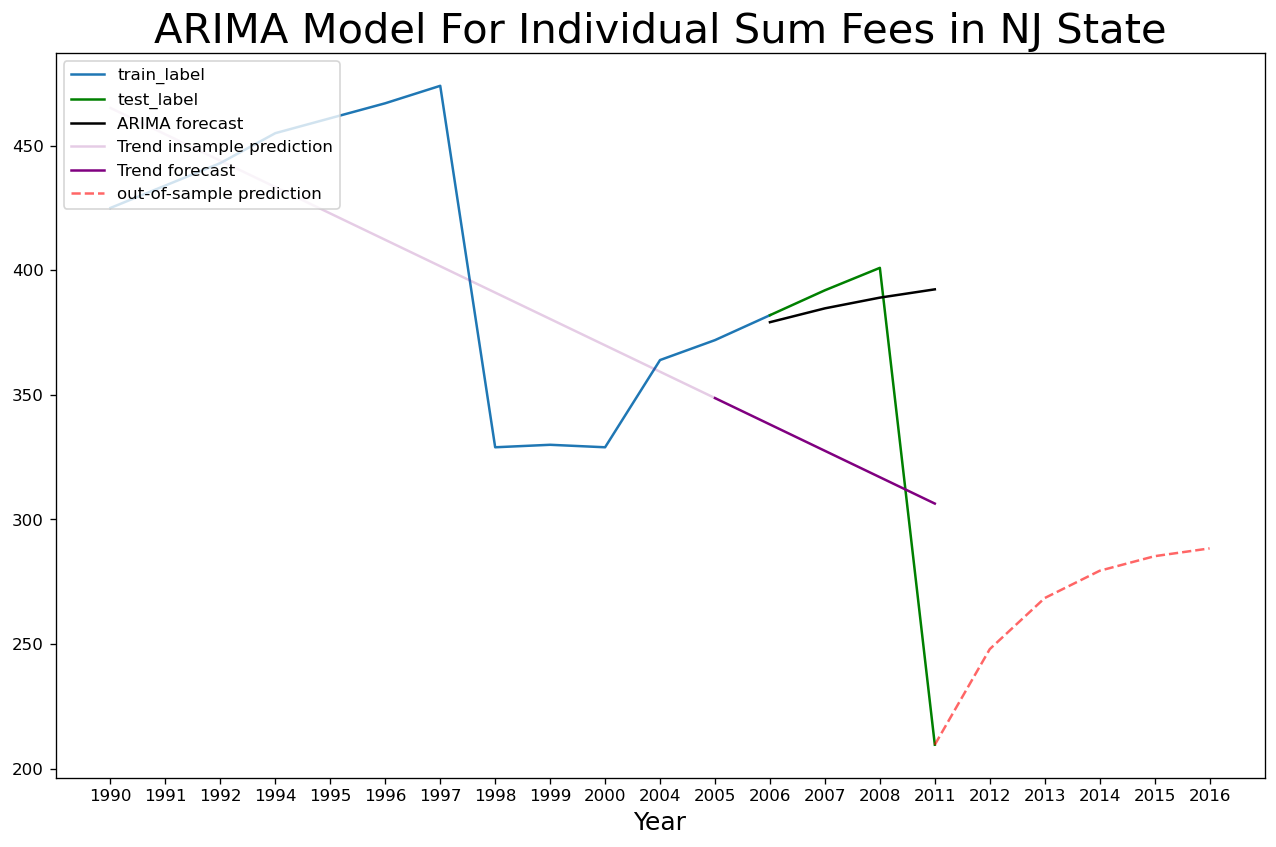

In [92]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NJ['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NJ['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NJ)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_NJ['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NJ.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NJ.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NJ)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NJ['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NJ State', fontsize=25)
plt.legend(loc='upper left')

# NM Data

In [93]:
#Prepocessing the data first
df26 = pd.read_csv('NM.csv',index_col=None, header=0)
df26_temp = df26[(df26['liv_arr'] == 'Licensed adult residential care home')]
df26_temp['state_indv_sum'] = df26_temp['state_indv']

temp = df26_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NM = pd.merge(left=df26,
              right=temp,
              how='left',
              on='year')
df_NM

year state                               liv_arr  sub_cat  combn_indv  \
0   1990    NM  Licensed adult residential care home      NaN       472.0   
1   1991    NM  Licensed adult residential care home      NaN       507.0   
2   1992    NM  Licensed adult residential care home      NaN       522.0   
3   1994    NM  Licensed adult residential care home      NaN       546.0   
4   1995    NM  Licensed adult residential care home      NaN       558.0   
5   1996    NM  Licensed adult residential care home      NaN       570.0   
6   1997    NM  Licensed adult residential care home      NaN       584.0   
7   1998    NM  Licensed adult residential care home      NaN       594.0   
8   1999    NM  Licensed adult residential care home      NaN       600.0   
9   2000    NM  Licensed adult residential care home      NaN       612.0   
10  2004    NM  Licensed adult residential care home      NaN       664.0   
11  2005    NM  Licensed adult residential care home      NaN       679.0   
12  2006    NM  Licensed adult residential care home      NaN       703.0   
13  2007    NM  Licensed adult residential care home      NaN       723.0   
14  2008    NM  Licensed adult residential care home      NaN       737.0   
15  2011    NM  Licensed adult residential care home      NaN       774.0   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0       751.0        86.0      172.0     386.0    579.0        86.0   
1       810.0       100.0      200.0     407.0    610.0       100.0   
2       833.0       100.0      200.0     422.0    633.0       100.0   
3       869.0       100.0      200.0     446.0    669.0       100.0   
4       887.0       100.0      200.0     458.0    687.0       100.0   
5       905.0       100.0      200.0     470.0    705.0       100.0   
6       926.0       100.0      200.0     484.0    726.0       100.0   
7       941.0       100.0      200.0     494.0    741.0       100.0   
8       951.0       100.0      200.0     500.0    751.0       100.0   
9       969.0       100.0      200.0     512.0    769.0       100.0   
10     1046.0       100.0      200.0     564.0    846.0       100.0   
11     1069.0       100.0      200.0     579.0    869.0       100.0   
12     1104.0       100.0      200.0     603.0    904.0       100.0   
13     1134.0       100.0      200.0     623.0    934.0       100.0   
14     1156.0       100.0      200.0     637.0    956.0       100.0   
15     1211.0       100.0      200.0     674.0   1011.0       100.0   

    state_diff_dbl  state_indv_sum  
0             True            86.0  
1             True           100.0  
2             True           100.0  
3             True           100.0  
4             True           100.0  
5             True           100.0  
6             True           100.0  
7             True           100.0  
8             True           100.0  
9             True           100.0  
10            True           100.0  
11            True           100.0  
12            True           100.0  
13            True           100.0  
14            True           100.0  
15            True           100.0

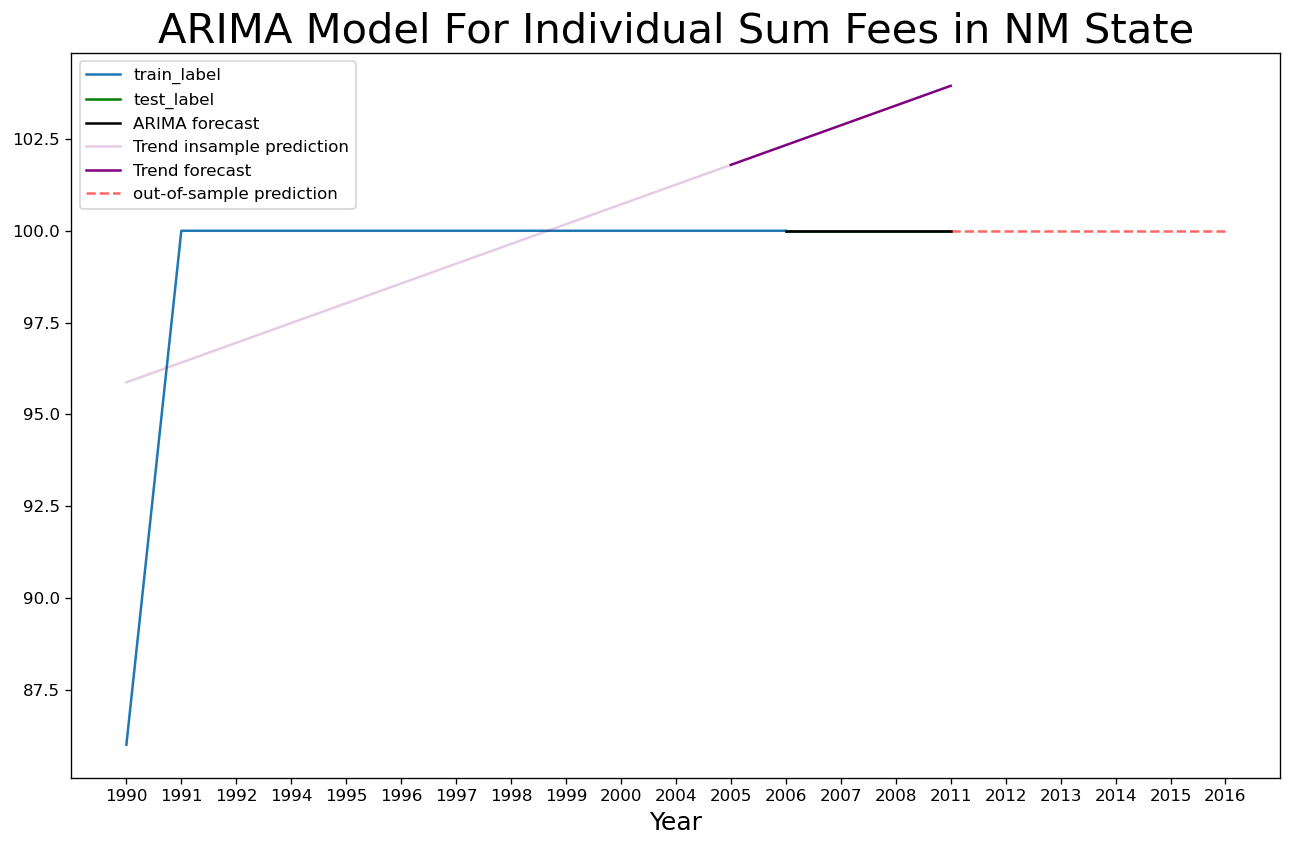

In [94]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NM['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NM['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NM)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_NM['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NM.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NM.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NM)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NM['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NM State', fontsize=25)
plt.legend(loc='upper left')

# NV Data

In [95]:
#Prepocessing the data first
df27 = pd.read_csv('NV.csv',index_col=None, header=0)
df27_temp = df27[(df27['liv_arr'] == 'Living independently')|(df27['liv_arr'] == 'Living in household of another')]
df27_temp['state_indv_sum'] = df27_temp['state_indv']

temp = df27_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NV = pd.merge(left=df27,
              right=temp,
              how='left',
              on='year')
df_NV

year state                         liv_arr         sub_cat  combn_indv  \
0   1990    NV            Living independently            Aged      422.40   
1   1990    NV            Living independently           Blind      495.30   
2   1990    NV  Living in household of another            Aged      281.61   
3   1990    NV  Living in household of another           Blind      471.30   
4   1990    NV                Domiciliary care  Aged and blind      662.40   
..   ...   ...                             ...             ...         ...   
75  2011    NV            Living independently            Aged      710.40   
76  2011    NV            Living independently           Blind      783.30   
77  2011    NV  Living in household of another            Aged      473.61   
78  2011    NV  Living in household of another           Blind      663.30   
79  2011    NV                Domiciliary care  Aged and blind     1065.00   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      653.46       36.40      74.46    386.00    579.0       38.06   
1      953.60      109.30     374.60    386.00    579.0      265.30   
2      435.64       24.27      49.64    257.34    386.0       25.37   
3      917.94      213.96     531.94    257.34    386.0      317.98   
4     1287.80      276.40     708.80    386.00    579.0      432.40   
..        ...         ...        ...       ...      ...         ...   
75    1085.46       36.40      74.46    674.00   1011.0       38.06   
76    1385.60      109.30     374.60    674.00   1011.0      265.30   
77     723.64       24.27      49.64    449.34    674.0       25.37   
78    1205.94      213.96     531.94    449.34    674.0      317.98   
79    1892.00      391.22     881.00    673.78   1011.0      489.78   

    state_diff_dbl  state_indv_sum  
0            False          383.93  
1            False          383.93  
2            False          383.93  
3            False          383.93  
4            False          383.93  
..             ...             ...  
75           False          383.93  
76           False          383.93  
77           False          383.93  
78           False          383.93  
79           False          383.93  

[80 rows x 13 columns]

In [96]:
df_NV = df_NV[(df_NV['liv_arr'] == 'Living independently') ]

df27 = df_NV[['year','state','liv_arr','state_indv','state_indv_sum']]
df27 = df27.drop_duplicates(subset='year', keep='first').reset_index()
df27['year'] = df27['year'].apply(str)
df_NV = df27.drop(columns = ['index'])
df_NV

year state               liv_arr  state_indv  state_indv_sum
0   1990    NV  Living independently        36.4          383.93
1   1991    NV  Living independently        36.4          383.93
2   1992    NV  Living independently        36.4          383.93
3   1994    NV  Living independently        36.4          383.93
4   1995    NV  Living independently        36.4          383.93
5   1996    NV  Living independently        36.4          383.93
6   1997    NV  Living independently        36.4          383.93
7   1998    NV  Living independently        36.4          383.93
8   1999    NV  Living independently        36.4          383.93
9   2000    NV  Living independently        36.4          383.93
10  2004    NV  Living independently        36.4          383.93
11  2005    NV  Living independently        36.4          383.93
12  2006    NV  Living independently        36.4          383.93
13  2007    NV  Living independently        36.4          383.93
14  2008    NV  Living independently        36.4          383.93
15  2011    NV  Living independently        36.4          383.93

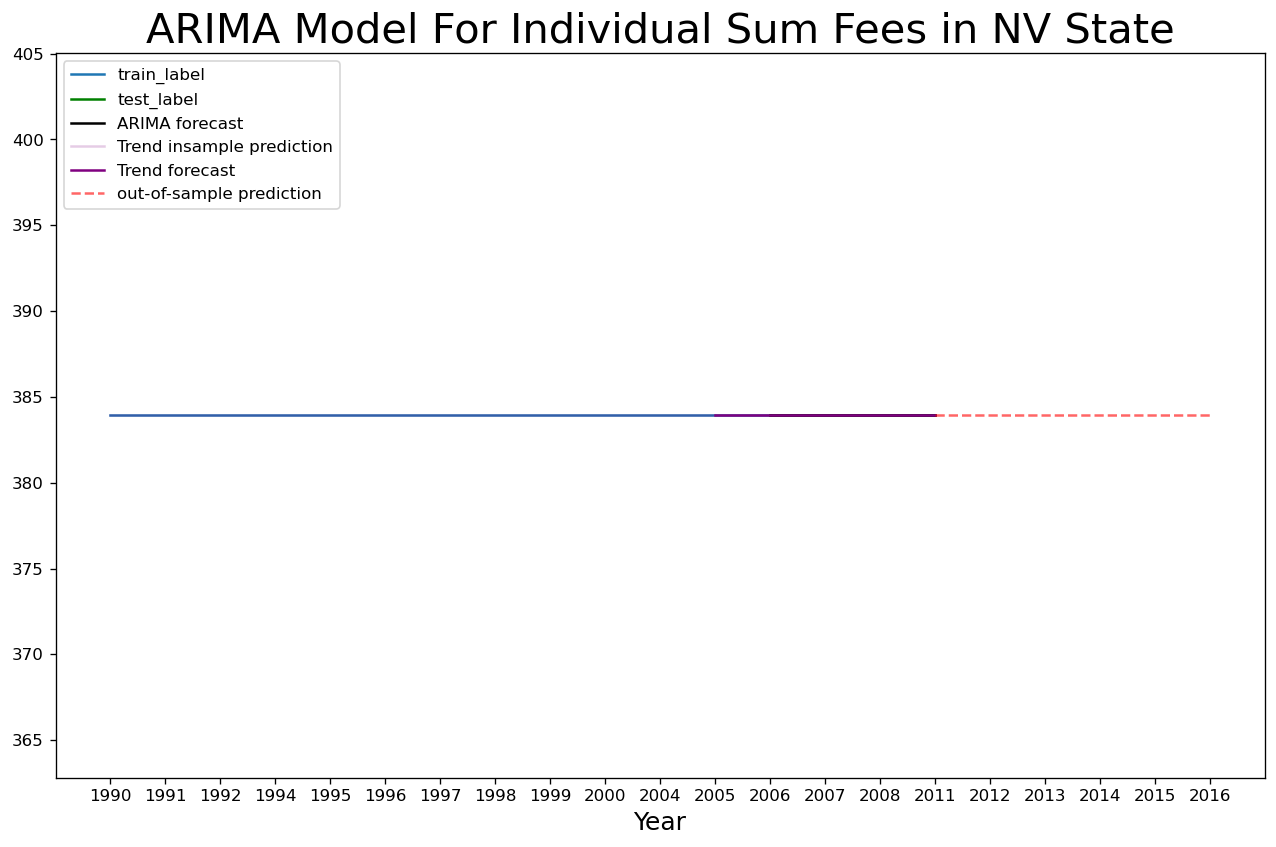

In [97]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NV['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NV['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NV)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_NV['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NV.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NV.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NV)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NV['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NV State', fontsize=25)
plt.legend(loc='upper left')

# NY Data

In [98]:
#Prepocessing the data first
df28 = pd.read_csv('NY.csv',index_col=None, header=0)

df28_temp = df28[(df28['liv_arr'] == 'Congregate care I')|(df28['liv_arr'] == 'Congregate care II')|(df28['liv_arr'] == 'Congregate care III')|(df28['liv_arr'] == 'Living alone')|(df28['liv_arr'] == 'Living with others')]
df28_temp['state_indv_sum'] = df28_temp['state_indv']

temp = df28_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_NY = pd.merge(left=df28,
              right=temp,
              how='left',
              on='year')
df_NY

year state                                            liv_arr  \
0    1990    NY                                       Living alone   
1    1990    NY                                 Living with others   
2    1990    NY                                  Congregate care I   
3    1990    NY                                  Congregate care I   
4    1990    NY                                 Congregate care II   
..    ...   ...                                                ...   
155  2011    NY                                 Congregate care II   
156  2011    NY                                Congregate care III   
157  2011    NY                                Congregate care III   
158  2011    NY                     Living in household of another   
159  2011    NY  Medicaid facility/residential facility/emergen...   

           sub_cat  combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  \
0              NaN      472.00     681.50       86.00     102.50    386.00   
1              NaN      409.00     624.00       23.00      45.00    386.00   
2    Areas A and B      634.96    1269.92      248.96     690.92    386.00   
3           Area C      596.96    1193.92      210.96     614.92    386.00   
4    Areas A and B      821.00    1642.00      435.00    1063.00    386.00   
..             ...         ...        ...         ...        ...       ...   
155         Area C     1079.00    2158.00      405.00    1147.00    674.00   
156         Area A     1368.00    2736.00      694.00    1725.00    674.00   
157  Areas B and C     1368.00    2736.00      694.00    1725.00    674.00   
158            NaN      472.34     720.00       23.00      46.00    449.34   
159            NaN       30.00      60.00        0.00       0.00     30.00   

     fed_cpl  state_diff  state_diff_dbl  state_indv_sum  
0      579.0       16.50           False         2350.84  
1      579.0       22.00           False         2350.84  
2      579.0      441.96           False         2350.84  
3      579.0      403.96           False         2350.84  
4      579.0      628.00           False         2350.84  
..       ...         ...             ...             ...  
155   1011.0      742.00           False         2832.96  
156   1011.0     1031.00           False         2832.96  
157   1011.0     1031.00           False         2832.96  
158    674.0       23.00            True         2832.96  
159     60.0        0.00            True         2832.96  

[160 rows x 13 columns]

In [99]:
df_NY = df_NY[(df_NY['liv_arr'] == 'Living alone') ]

df28 = df_NY[['year','state','liv_arr','state_indv','state_indv_sum']]
df28 = df28.drop_duplicates(subset='year', keep='first').reset_index()
df28['year'] = df28['year'].apply(str)
df_NY = df28.drop(columns = ['index'])
df_NY

year state       liv_arr  state_indv  state_indv_sum
0   1990    NY  Living alone        86.0         2350.84
1   1991    NY  Living alone        86.0         2385.88
2   1992    NY  Living alone        86.0         2385.88
3   1994    NY  Living alone        86.0         2385.88
4   1995    NY  Living alone        86.0         2385.88
5   1996    NY  Living alone        86.0         2385.88
6   1997    NY  Living alone        86.0         2385.88
7   1998    NY  Living alone        86.0         2385.88
8   1999    NY  Living alone        87.0         2386.88
9   2000    NY  Living alone        87.0         2386.88
10  2004    NY  Living alone        87.0         2386.88
11  2005    NY  Living alone        87.0         2386.88
12  2006    NY  Living alone        87.0         2479.96
13  2007    NY  Living alone        87.0         2726.96
14  2008    NY  Living alone        87.0         2756.96
15  2011    NY  Living alone        87.0         2832.96

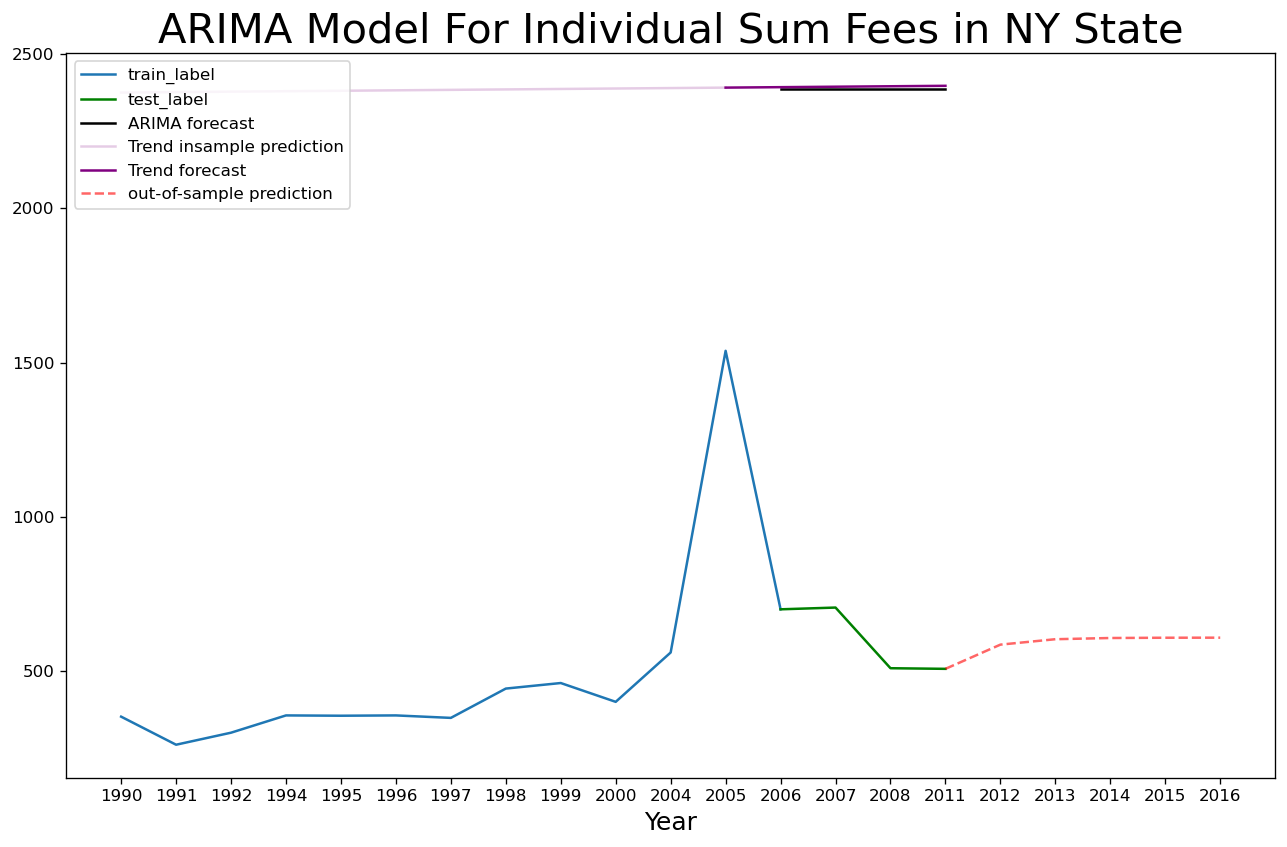

In [100]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_NY['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_NY['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_NY)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_NE['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_NY.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_NY.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_NY)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_NY['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in NY State', fontsize=25)
plt.legend(loc='upper left')

# OH Data

In [101]:
#Prepocessing the data first
df29 = pd.read_csv('OH.csv',index_col=None, header=0)
df29_temp = df29[(df29['liv_arr'] == 'Adult group home')|(df29['liv_arr'] == 'Rest home')]
df29_temp['state_indv_sum'] = df29_temp['state_indv']

temp = df29_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_OH = pd.merge(left=df29,
              right=temp,
              how='left',
              on='year')
df_OH

year state                                liv_arr  sub_cat  combn_indv  \
0   1990    OH               Adult family/foster home      NaN       450.0   
1   1990    OH                       Adult group home      NaN       550.0   
2   1990    OH                              Rest home      NaN       550.0   
3   1991    OH               Adult family/foster home      NaN       450.0   
4   1991    OH                       Adult group home      NaN       500.0   
..   ...   ...                                    ...      ...         ...   
79  2011    OH  Adult community mental health housing      NaN       980.0   
80  2011    OH       Adult community alternative home      NaN      1180.0   
81  2011    OH                       Adult group home      NaN      1280.0   
82  2011    OH                              Rest home      NaN      1280.0   
83  2011    OH        Adult residential care facility      NaN      1180.0   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0       900.0        64.0      321.0     386.0    579.0       257.0   
1      1100.0       164.0      521.0     386.0    579.0       357.0   
2      1100.0       164.0      521.0     386.0    579.0       357.0   
3       900.0        43.0      290.0     407.0    610.0       247.0   
4      1000.0        93.0      390.0     407.0    610.0       297.0   
..        ...         ...        ...       ...      ...         ...   
79     1770.0       306.0      759.0     674.0   1011.0       453.0   
80     2170.0       506.0     1159.0     674.0   1011.0       653.0   
81     2370.0       606.0     1359.0     674.0   1011.0       753.0   
82     2370.0       606.0     1359.0     674.0   1011.0       753.0   
83     2170.0       506.0     1159.0     674.0   1011.0       653.0   

    state_diff_dbl  state_indv_sum  
0            False           328.0  
1            False           328.0  
2            False           328.0  
3            False           186.0  
4            False           186.0  
..             ...             ...  
79           False          1212.0  
80           False          1212.0  
81           False          1212.0  
82           False          1212.0  
83           False          1212.0  

[84 rows x 13 columns]

In [102]:
df_OH = df_OH[(df_OH['liv_arr'] == 'Rest home') ]

df29 = df_OH[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df29['year'] = df29['year'].apply(str)
df_OH = df29.drop(columns = ['index'])
df_OH

year state    liv_arr  state_indv  state_indv_sum
0   1990    OH  Rest home       164.0           328.0
1   1991    OH  Rest home        93.0           186.0
2   1992    OH  Rest home       457.0           914.0
3   1994    OH  Rest home       456.0           912.0
4   1995    OH  Rest home       456.0           912.0
5   1996    OH  Rest home       506.0          1012.0
6   1997    OH  Rest home       506.0          1012.0
7   1998    OH  Rest home       556.0          1112.0
8   1999    OH  Rest home       556.0          1112.0
9   2000    OH  Rest home       556.0          1112.0
10  2004    OH  Rest home       606.0          1212.0
11  2005    OH  Rest home       606.0          1212.0
12  2006    OH  Rest home       606.0          1212.0
13  2007    OH  Rest home       606.0          1212.0
14  2008    OH  Rest home       606.0          1212.0
15  2011    OH  Rest home       606.0          1212.0

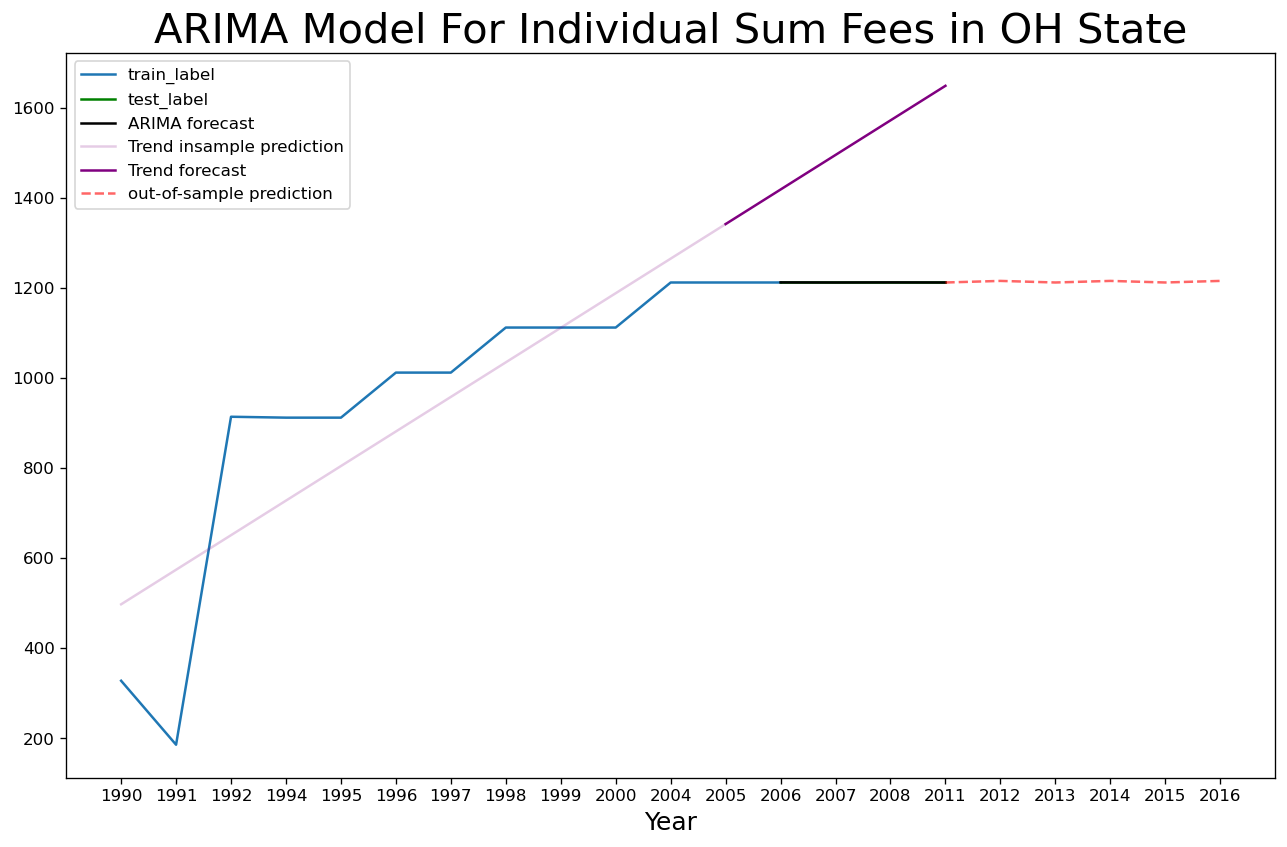

In [103]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_OH['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_OH['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_OH)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_OH['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_OH.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_OH.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_OH)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_OH['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in OH State', fontsize=25)
plt.legend(loc='upper left')

# OK Data

In [104]:
#Prepocessing the data first
df30 = pd.read_csv('OK.csv',index_col=None, header=0)
df30_temp = df30[(df30['liv_arr'] == 'Living independently')]
df30_temp['state_indv_sum'] = df30_temp['state_indv']

temp = df30_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_OK = pd.merge(left=df30,
              right=temp,
              how='left',
              on='year')
df_OK

year state               liv_arr  sub_cat  combn_indv  combn_cpl  \
0   1990    OK  Living independently      NaN       450.0      707.0   
1   1991    OK  Living independently      NaN       471.0      738.0   
2   1992    OK  Living independently      NaN       486.0      761.0   
3   1994    OK  Living independently      NaN       503.0      783.0   
4   1995    OK  Living independently      NaN       513.0      797.0   
5   1996    OK  Living independently      NaN       524.0      813.0   
6   1997    OK  Living independently      NaN       537.0      832.0   
7   1998    OK  Living independently      NaN       547.0      847.0   
8   1999    OK  Living independently      NaN       553.0      857.0   
9   2000    OK  Living independently      NaN       565.0      875.0   
10  2004    OK  Living independently      NaN       614.0      946.0   
11  2005    OK  Living independently      NaN       627.0      965.0   
12  2006    OK  Living independently      NaN       651.0     1000.0   
13  2007    OK  Living independently      NaN       670.0     1028.0   
14  2008    OK  Living independently      NaN       683.0     1048.0   
15  2011    OK  Living independently      NaN       716.0     1095.0   

    state_indv  state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  \
0         64.0      128.0     386.0    579.0        64.0            True   
1         64.0      128.0     407.0    610.0        64.0            True   
2         64.0      128.0     422.0    633.0        64.0            True   
3         57.0      114.0     446.0    669.0        57.0            True   
4         55.0      110.0     458.0    687.0        55.0            True   
5         54.0      108.0     470.0    705.0        54.0            True   
6         53.0      106.0     484.0    726.0        53.0            True   
7         53.0      106.0     494.0    741.0        53.0            True   
8         53.0      106.0     500.0    751.0        53.0            True   
9         53.0      106.0     512.0    769.0        53.0            True   
10        50.0      100.0     564.0    846.0        50.0            True   
11        48.0       96.0     579.0    869.0        48.0            True   
12        48.0       96.0     603.0    904.0        48.0            True   
13        47.0       94.0     623.0    934.0        47.0            True   
14        46.0       92.0     637.0    956.0        46.0            True   
15        42.0       84.0     674.0   1011.0        42.0            True   

    state_indv_sum  
0             64.0  
1             64.0  
2             64.0  
3             57.0  
4             55.0  
5             54.0  
6             53.0  
7             53.0  
8             53.0  
9             53.0  
10            50.0  
11            48.0  
12            48.0  
13            47.0  
14            46.0  
15            42.0

In [105]:
df30 = df_OK[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df30['year'] = df30['year'].apply(str)
df_OK = df30.drop(columns = ['index'])
df_OK

year state               liv_arr  state_indv  state_indv_sum
0   1990    OK  Living independently        64.0            64.0
1   1991    OK  Living independently        64.0            64.0
2   1992    OK  Living independently        64.0            64.0
3   1994    OK  Living independently        57.0            57.0
4   1995    OK  Living independently        55.0            55.0
5   1996    OK  Living independently        54.0            54.0
6   1997    OK  Living independently        53.0            53.0
7   1998    OK  Living independently        53.0            53.0
8   1999    OK  Living independently        53.0            53.0
9   2000    OK  Living independently        53.0            53.0
10  2004    OK  Living independently        50.0            50.0
11  2005    OK  Living independently        48.0            48.0
12  2006    OK  Living independently        48.0            48.0
13  2007    OK  Living independently        47.0            47.0
14  2008    OK  Living independently        46.0            46.0
15  2011    OK  Living independently        42.0            42.0

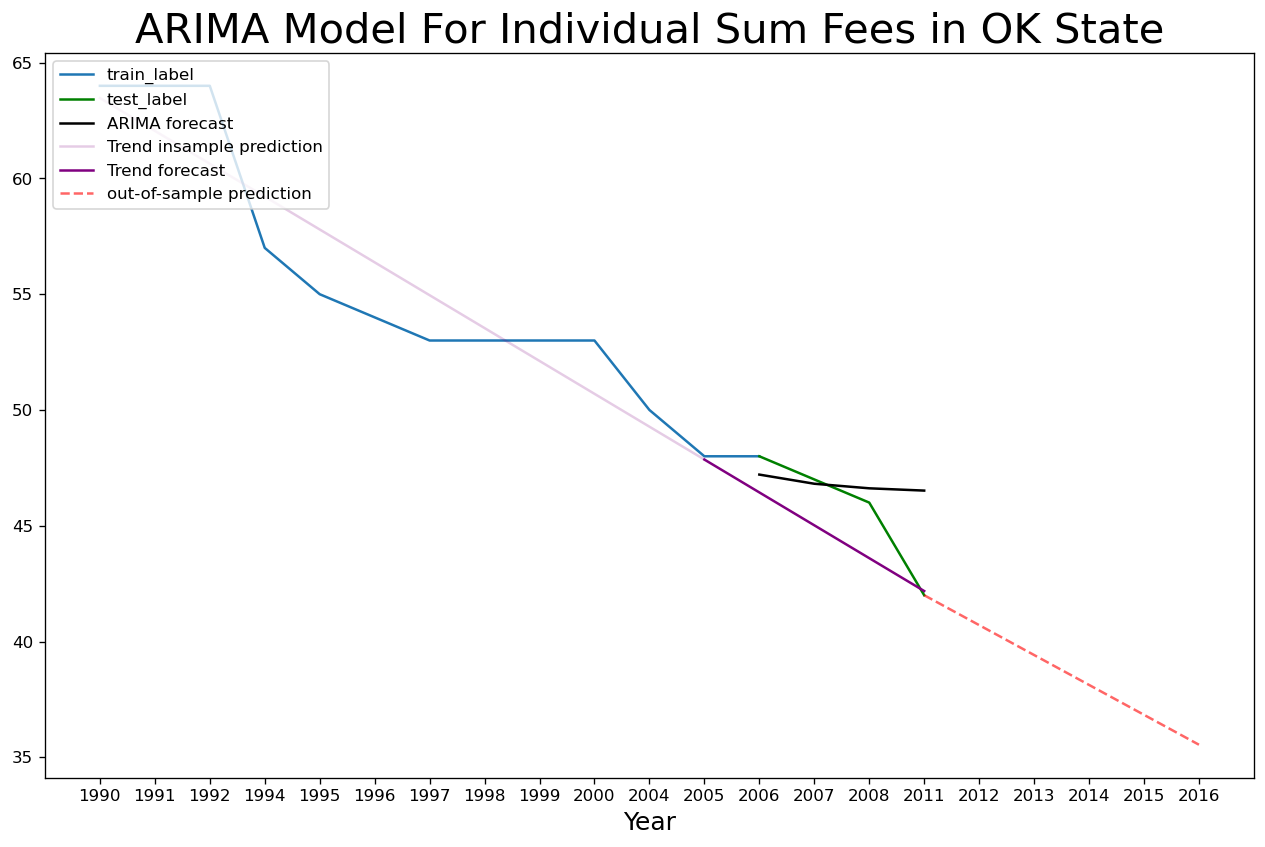

In [106]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_OK['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_OK['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_OK)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_OK['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_OK.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_OK.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_OK)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_OK['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in OK State', fontsize=25)
plt.legend(loc='upper left')

# OR Data

In [107]:
#Prepocessing the data first
df31 = pd.read_csv('OR.csv',index_col=None, header=0)

df31_temp = df31[(df31['liv_arr'] == 'Living independently')|(df31['liv_arr'] == 'Living with an ineligible spouse')|(df28['liv_arr'] == 'Living with essential person')|(df31['liv_arr'] == 'Living in household of another')|(df31['liv_arr'] == 'Adult foster/residential care')]
df31_temp['state_indv_sum'] = df31_temp['state_indv']

temp = df31_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_OR = pd.merge(left=df31,
              right=temp,
              how='left',
              on='year')
df_OR

year state                           liv_arr            sub_cat  \
0    1990    OR              Living independently  Aged and disabled   
1    1990    OR              Living independently              Blind   
2    1990    OR  Living with an ineligible spouse  Aged and disabled   
3    1990    OR  Living with an ineligible spouse              Blind   
4    1990    OR      Living with essential person              Blind   
..    ...   ...                               ...                ...   
139  2008    OR              Living independently              Blind   
140  2008    OR    Living in household of another  Aged and disabled   
141  2008    OR    Living in household of another              Blind   
142  2008    OR     Adult foster/residential care  Aged and disabled   
143  2008    OR     Adult foster/residential care              Blind   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        387.70     579.00         1.7        0.0    386.00   579.00   
1        412.70     604.60        26.7       25.6    386.00   579.00   
2        387.70       0.00         1.7        0.0    386.00     0.00   
3        412.70       0.00        26.7        0.0    386.00     0.00   
4        604.60       0.00        25.6        0.0    579.00     0.00   
..          ...        ...         ...        ...       ...      ...   
139      663.70     981.00        26.7       25.0    637.00   956.00   
140      426.37       0.00         1.7        0.0    424.67     0.00   
141      451.37     662.34        26.7       25.0    424.67   637.34   
142      638.70       0.00         1.7        0.0    637.00     0.00   
143      638.70       0.00        26.7        0.0    612.00     0.00   

     state_diff  state_diff_dbl  state_indv_sum  
0          -1.7           False           113.6  
1          -1.1           False           113.6  
2          -1.7           False           113.6  
3         -26.7           False           113.6  
4         -25.6           False           113.6  
..          ...             ...             ...  
139        -1.7           False            85.2  
140        -1.7           False            85.2  
141        -1.7           False            85.2  
142        -1.7           False            85.2  
143       -26.7           False            85.2  

[144 rows x 13 columns]

In [108]:
df_OR = df_OR[(df_OR['liv_arr'] == 'Living independently') ]

df31 = df_OR[['year','state','liv_arr','state_indv','state_indv_sum']]
df31 = df31.drop_duplicates(subset='year', keep='first').reset_index()
df31['year'] = df31['year'].apply(str)
df_OR = df31.drop(columns = ['index'])
df_OR

year state               liv_arr  state_indv  state_indv_sum
0   1990    OR  Living independently         1.7           113.6
1   1991    OR  Living independently         1.7           113.6
2   1992    OR  Living independently         1.7           113.6
3   1994    OR  Living independently         1.7           113.6
4   1995    OR  Living independently         1.7           113.6
5   1996    OR  Living independently         1.7           113.6
6   1997    OR  Living independently         1.7           113.6
7   1998    OR  Living independently         1.7           113.6
8   1999    OR  Living independently         1.7           113.6
9   2000    OR  Living independently         1.7           113.6
10  2004    OR  Living independently         1.7           113.6
11  2005    OR  Living independently         1.7            85.2
12  2006    OR  Living independently         1.7            85.2
13  2007    OR  Living independently         1.7            85.2
14  2008    OR  Living independently         1.7            85.2

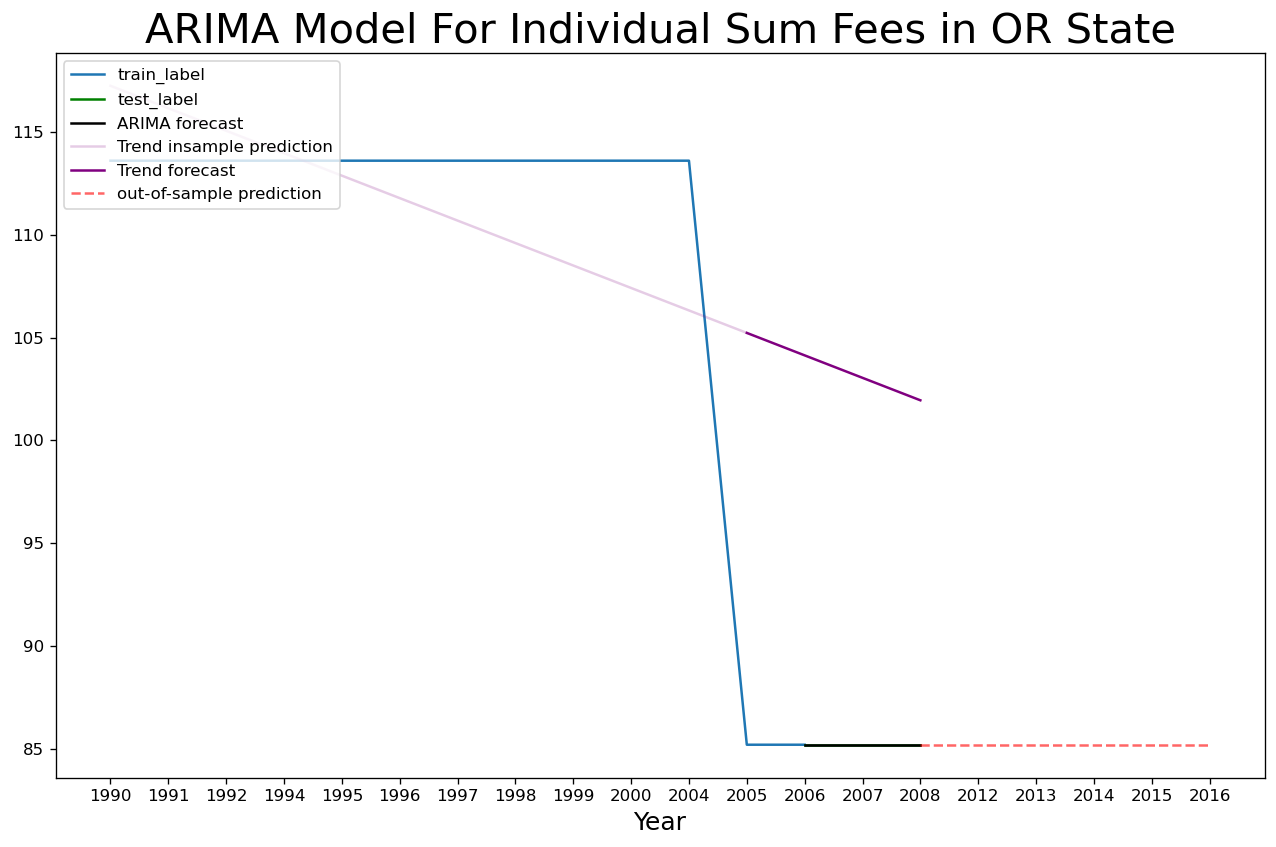

In [109]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_OR['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_OR['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_OR)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 15

series = df_OR['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_OR.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_OR.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_OR)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 15+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_OR['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in OR State', fontsize=25)
plt.legend(loc='upper left')

# PA Data

In [110]:
#Prepocessing the data first
df32 = pd.read_csv('PA.csv',index_col=None, header=0)

df32_temp = df32[(df32['liv_arr'] == 'Living alone')|(df32['liv_arr'] == 'Living in household of another')|(df32['liv_arr'] == 'Living with an essential person')|(df32['liv_arr'] == 'Living with an essential person in household of another')]

df32_temp['state_indv_sum'] = df32_temp['state_indv']
temp = df32_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_PA = pd.merge(left=df32,
              right=temp,
              how='left',
              on='year')
df_PA

year state                                            liv_arr  sub_cat  \
0   1990    PA                                       Living alone      NaN   
1   1990    PA                     Living in household of another      NaN   
2   1990    PA                    Living with an essential person      NaN   
3   1990    PA  Living with an essential person in household o...      NaN   
4   1990    PA               Domiciliary care facility for adults      NaN   
..   ...   ...                                                ...      ...   
90  2011    PA                     Living in household of another      NaN   
91  2011    PA                    Living with an essential person      NaN   
92  2011    PA  Living with an essential person in household o...      NaN   
93  2011    PA               Domiciliary care facility for adults      NaN   
94  2011    PA                                 Personal care home      NaN   

    combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0       418.40     627.70       32.40      48.70    386.00   579.00   
1       289.74     434.70       32.40      48.70    257.34   386.00   
2       627.70     845.05       48.70      73.05    579.00   772.00   
3       434.70     587.72       48.70      73.05    386.00   514.67   
4       533.30     952.40      147.30     373.40    386.00   579.00   
..         ...        ...         ...        ...       ...      ...   
90      474.87     712.44       25.53      38.44    449.34   674.00   
91     1055.70    1417.05       43.70      68.05   1012.00  1349.00   
92      718.37     967.38       43.70      68.05    674.67   899.33   
93     1108.30    1958.40      434.30     947.40    674.00  1011.00   
94     1113.30    1968.40      439.30     957.40    674.00  1011.00   

    state_diff  state_diff_dbl  state_indv_sum  
0        16.30           False          162.20  
1        16.30           False          162.20  
2        24.35           False          162.20  
3        24.35           False          162.20  
4       226.10           False          162.20  
..         ...             ...             ...  
90       12.91           False          135.03  
91       24.35           False          135.03  
92       24.35           False          135.03  
93      513.10           False          135.03  
94      518.10           False          135.03  

[95 rows x 13 columns]

In [111]:
df_PA = df_PA[(df_PA['liv_arr'] == 'Living alone') ]

df32 = df_PA[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df32['year'] = df32['year'].apply(str)
df_PA = df32.drop(columns = ['index'])
df_PA

year state       liv_arr  state_indv  state_indv_sum
0   1990    PA  Living alone        32.4          162.20
1   1991    PA  Living alone        32.4          162.20
2   1992    PA  Living alone        32.4          162.20
3   1994    PA  Living alone        32.4          162.20
4   1995    PA  Living alone        32.4          162.20
5   1996    PA  Living alone        27.4          142.20
6   1997    PA  Living alone        27.4          142.20
7   1998    PA  Living alone        27.4          142.20
8   1999    PA  Living alone        27.4          142.20
9   2000    PA  Living alone        27.4          142.20
10  2004    PA  Living alone        27.4          142.20
11  2005    PA  Living alone        27.4          142.20
12  2006    PA  Living alone        27.4          142.20
13  2007    PA  Living alone        27.4          142.20
14  2008    PA  Living alone        27.4          142.20
15  2011    PA  Living alone        22.1          135.03

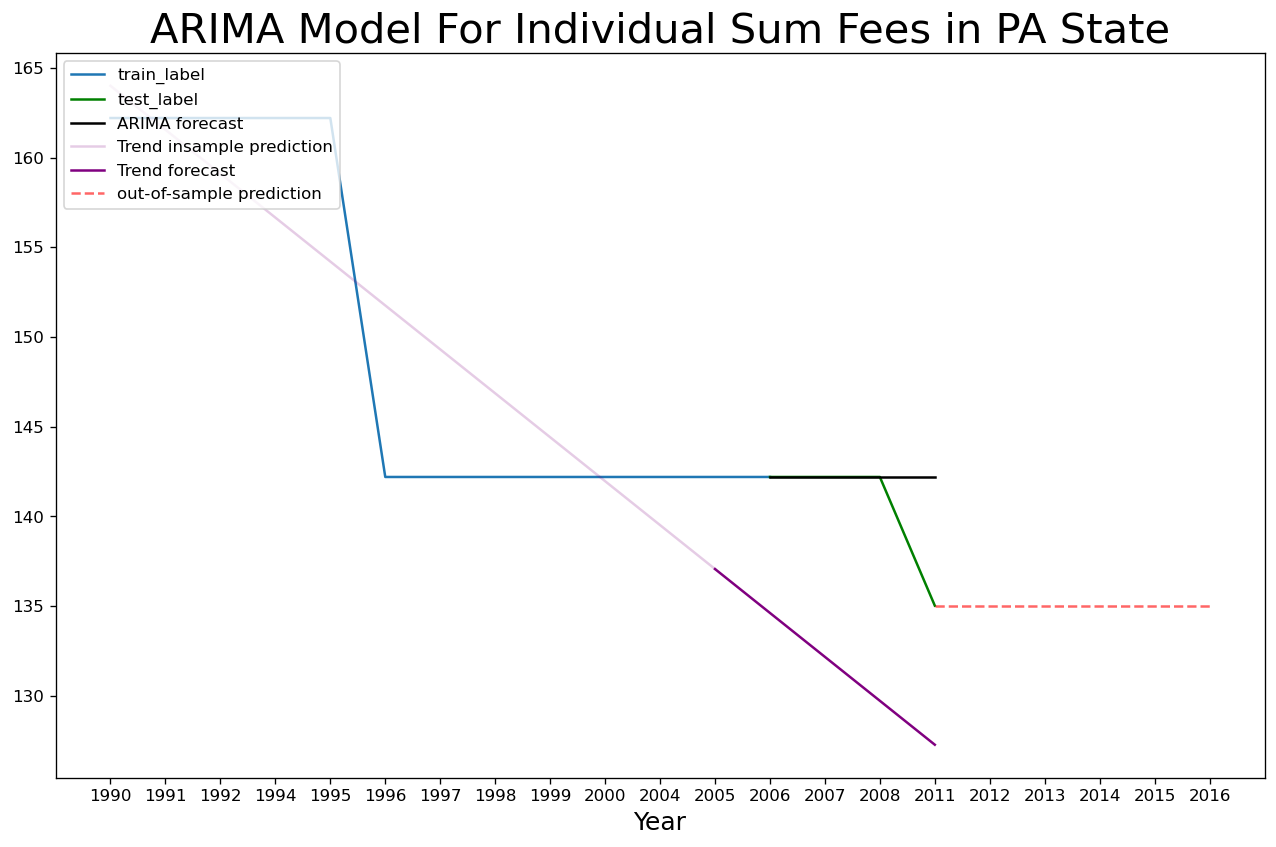

In [112]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_PA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_PA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_PA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_PA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_PA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_PA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_PA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_PA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in PA State', fontsize=25)
plt.legend(loc='upper left')

# RI Data

In [113]:
#Prepocessing the data first
df33 = pd.read_csv('RI.csv',index_col=None, header=0)
df33_temp = df33[(df33['liv_arr'] == 'Living alone')|(df33['liv_arr'] == 'Living in household of another')|(df33['liv_arr'] == 'Medicaid facility')]
df33_temp['state_indv_sum'] = df33_temp['state_indv']

temp = df33_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_RI = pd.merge(left=df33,
              right=temp,
              how='left',
              on='year')
df_RI

year state                           liv_arr  sub_cat  combn_indv  \
0   1990    RI                      Living alone      NaN      450.35   
1   1990    RI    Living in household of another      NaN      331.94   
2   1990    RI                 Medicaid facility      NaN       40.00   
3   1991    RI                      Living alone      NaN      471.35   
4   1991    RI    Living in household of another      NaN      345.94   
..   ...   ...                               ...      ...         ...   
58  2008    RI                 Medicaid facility      NaN       50.00   
59  2011    RI                      Living alone      NaN      713.92   
60  2011    RI    Living in household of another      NaN      501.26   
61  2011    RI  Residential care/assisted living      NaN     1212.00   
62  2011    RI                 Medicaid facility      NaN       50.00   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      699.50       64.35     120.50    386.00   579.00       56.15   
1      522.50       74.60     136.50    257.34   386.00       61.90   
2       80.00       10.00      20.00     30.00    60.00       10.00   
3      730.50       64.35     120.50    407.00   610.00       56.15   
4      543.17       74.60     136.50    271.34   406.67       61.90   
..        ...         ...        ...       ...      ...         ...   
58     100.00       20.00      40.00     30.00    60.00       20.00   
59    1090.38       39.92      79.38    674.00  1011.00       39.46   
60     771.30       51.92      97.30    449.34   674.00       45.38   
61       0.00      538.00       0.00    674.00     0.00     -538.00   
62     100.00       20.00      40.00     30.00    60.00       20.00   

    state_diff_dbl  state_indv_sum  
0            False          148.95  
1            False          148.95  
2             True          148.95  
3            False          148.95  
4            False          148.95  
..             ...             ...  
58            True          147.29  
59           False          111.84  
60           False          111.84  
61           False          111.84  
62            True          111.84  

[63 rows x 13 columns]

In [114]:
df_RI = df_RI[(df_RI['liv_arr'] == 'Living alone')]
df33 = df_RI[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df33['year'] = df33['year'].apply(str)
df_RI = df33.drop(columns = ['index'])
df_RI

year state       liv_arr  state_indv  state_indv_sum
0   1990    RI  Living alone       64.35          148.95
1   1991    RI  Living alone       64.35          148.95
2   1992    RI  Living alone       66.79          154.19
3   1994    RI  Living alone       64.35          148.95
4   1995    RI  Living alone       64.35          148.95
5   1996    RI  Living alone       64.35          148.95
6   1997    RI  Living alone       64.35          148.95
7   1998    RI  Living alone       64.35          148.95
8   1999    RI  Living alone       64.35          148.95
9   2000    RI  Living alone       64.35          158.95
10  2004    RI  Living alone       57.35          147.29
11  2005    RI  Living alone       57.35          147.29
12  2006    RI  Living alone       57.35          147.29
13  2007    RI  Living alone       57.35          147.29
14  2008    RI  Living alone       57.35          147.29
15  2011    RI  Living alone       39.92          111.84

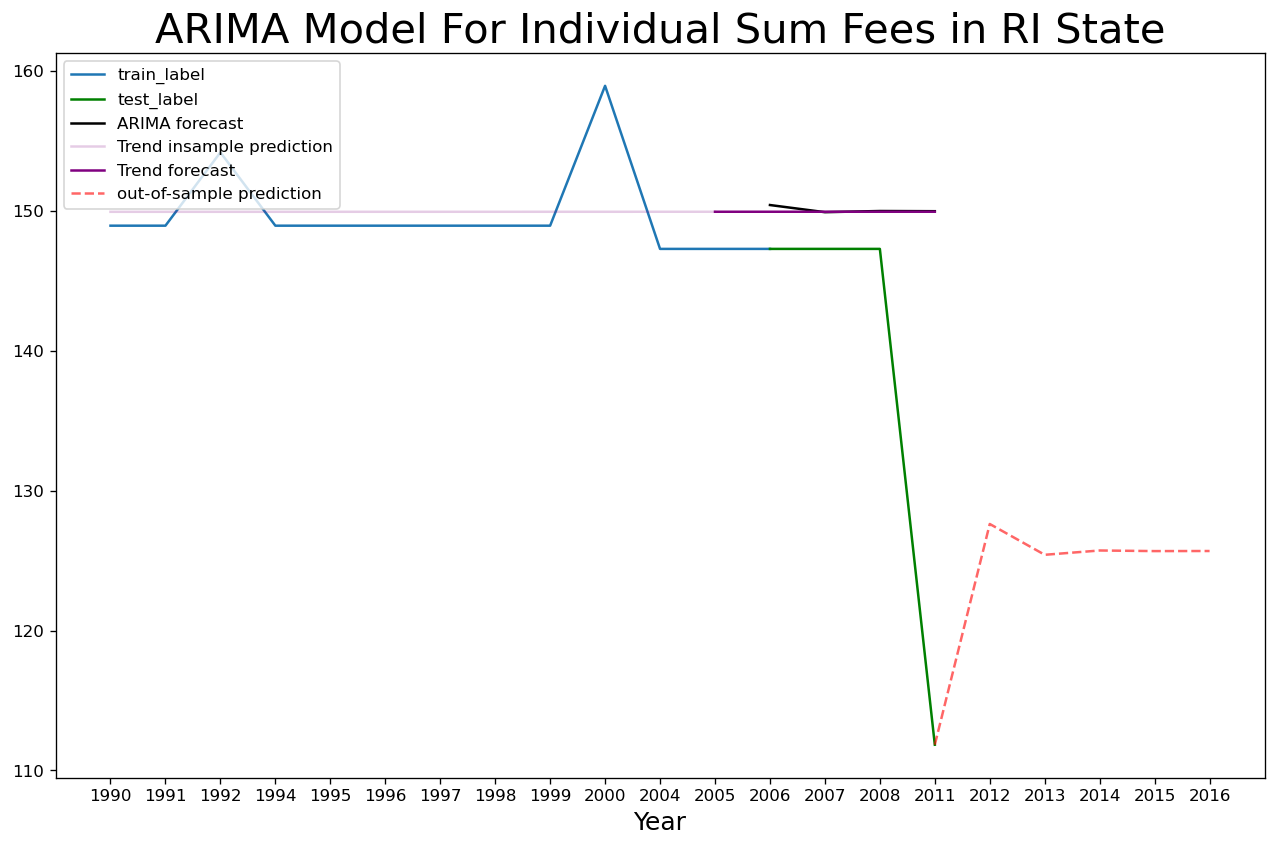

In [115]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_RI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_RI['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_RI)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_RI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_RI.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_RI.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_RI)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_RI['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in RI State', fontsize=25)
plt.legend(loc='upper left')

# SC Data

In [116]:
#Prepocessing the data first
df34 = pd.read_csv('SC.csv',index_col=None, header=0)
df34_temp = df34[(df34['liv_arr'] == 'Licensed residential care facility')]
df34_temp['state_indv_sum'] = df34_temp['state_indv']

temp = df34_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_SC = pd.merge(left=df34,
              right=temp,
              how='left',
              on='year')
df_SC

year state                             liv_arr  sub_cat  combn_indv  \
0   1990    SC  Licensed residential care facility      NaN       612.0   
1   1991    SC  Licensed residential care facility      NaN       650.0   
2   1992    SC  Licensed residential care facility      NaN       665.0   
3   1994    SC  Licensed residential care facility      NaN       707.0   
4   1995    SC  Licensed residential care facility      NaN       732.0   
5   1996    SC  Licensed residential care facility      NaN       741.0   
6   1997    SC  Licensed residential care facility      NaN       753.0   
7   1998    SC  Licensed residential care facility      NaN       795.0   
8   1999    SC  Licensed residential care facility      NaN       811.0   
9   2000    SC  Licensed residential care facility      NaN       860.0   
10  2004    SC  Licensed residential care facility      NaN       912.0   
11  2005    SC  Licensed residential care facility      NaN       927.0   
12  2006    SC  Licensed residential care facility      NaN       951.0   
13  2007    SC  Licensed residential care facility      NaN       971.0   
14  2008    SC  Licensed residential care facility      NaN      1065.0   
15  2011    SC  Licensed residential care facility      NaN      1157.0   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      1224.0       226.0      645.0     386.0    579.0       419.0   
1      1300.0       243.0      690.0     407.0    610.0       447.0   
2      1323.0       243.0      690.0     422.0    633.0       447.0   
3      1414.0       261.0      745.0     446.0    669.0       484.0   
4         0.0       274.0        0.0     458.0      0.0      -274.0   
5         0.0       271.0        0.0     470.0      0.0      -271.0   
6         0.0       269.0        0.0     484.0      0.0      -269.0   
7         0.0       301.0        0.0     494.0      0.0      -301.0   
8         0.0       311.0        0.0     500.0      0.0      -311.0   
9      1720.0       348.0      696.0     512.0   1024.0       348.0   
10        0.0       348.0        0.0     564.0      0.0      -348.0   
11        0.0       348.0        0.0     579.0      0.0      -348.0   
12        0.0       348.0        0.0     603.0      0.0      -348.0   
13        0.0       348.0        0.0     623.0      0.0      -348.0   
14        0.0       428.0        0.0     637.0      0.0      -428.0   
15        0.0       483.0        0.0     674.0      0.0      -483.0   

    state_diff_dbl  state_indv_sum  
0            False           226.0  
1            False           243.0  
2            False           243.0  
3            False           261.0  
4            False           274.0  
5            False           271.0  
6            False           269.0  
7            False           301.0  
8            False           311.0  
9             True           348.0  
10           False           348.0  
11           False           348.0  
12           False           348.0  
13           False           348.0  
14           False           428.0  
15           False           483.0

In [117]:
df34 = df_SC[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df34['year'] = df34['year'].apply(str)
df_SC = df34.drop(columns = ['index'])
df_SC

year state                             liv_arr  state_indv  state_indv_sum
0   1990    SC  Licensed residential care facility       226.0           226.0
1   1991    SC  Licensed residential care facility       243.0           243.0
2   1992    SC  Licensed residential care facility       243.0           243.0
3   1994    SC  Licensed residential care facility       261.0           261.0
4   1995    SC  Licensed residential care facility       274.0           274.0
5   1996    SC  Licensed residential care facility       271.0           271.0
6   1997    SC  Licensed residential care facility       269.0           269.0
7   1998    SC  Licensed residential care facility       301.0           301.0
8   1999    SC  Licensed residential care facility       311.0           311.0
9   2000    SC  Licensed residential care facility       348.0           348.0
10  2004    SC  Licensed residential care facility       348.0           348.0
11  2005    SC  Licensed residential care facility       348.0           348.0
12  2006    SC  Licensed residential care facility       348.0           348.0
13  2007    SC  Licensed residential care facility       348.0           348.0
14  2008    SC  Licensed residential care facility       428.0           428.0
15  2011    SC  Licensed residential care facility       483.0           483.0

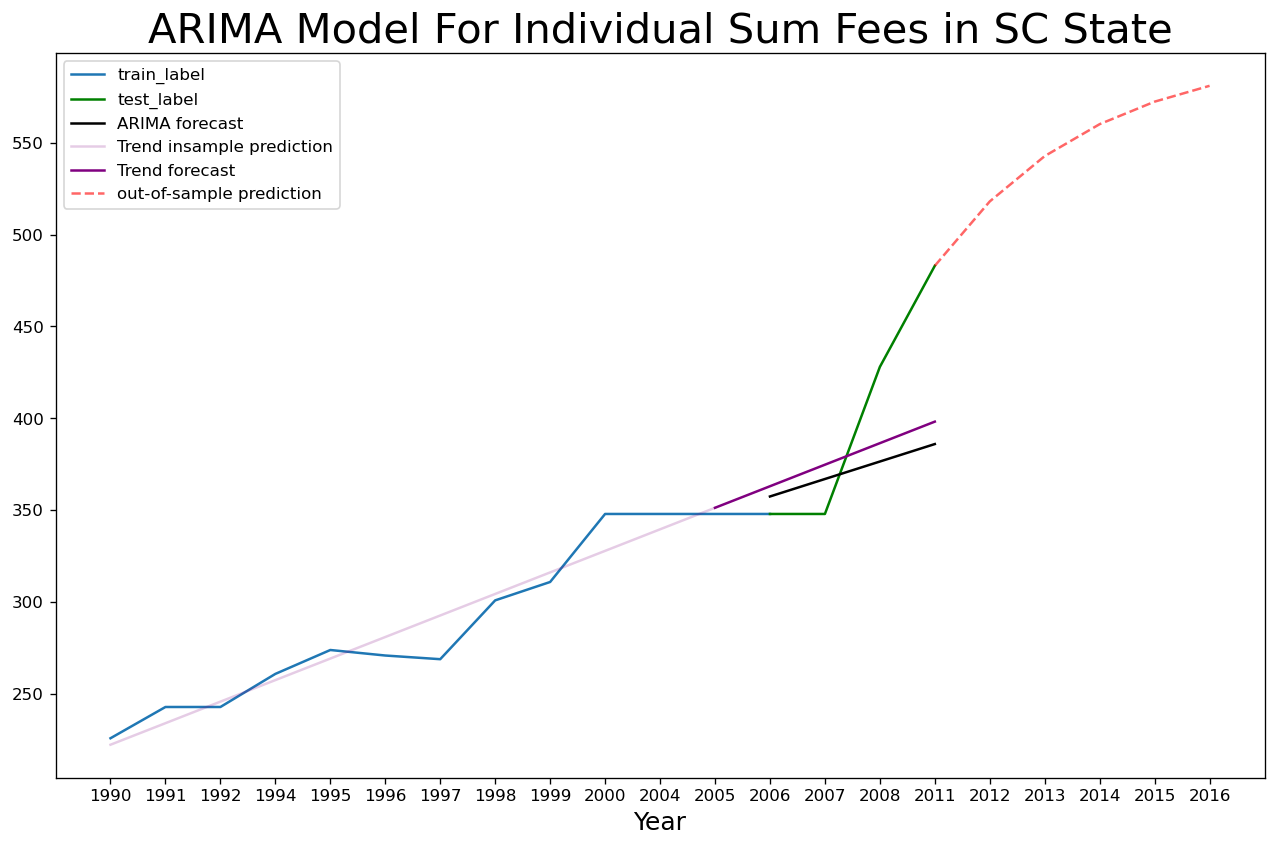

In [118]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_SC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_SC['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_SC)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_SC['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_SC.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_SC.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_SC)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_SC['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in SC State', fontsize=25)
plt.legend(loc='upper left')

# SD Data

In [119]:
#Prepocessing the data first
df35 = pd.read_csv('SD.csv',index_col=None, header=0)
df35_temp = df35[(df35['liv_arr'] == 'Living independently')|(df35['liv_arr'] == 'Assisted living facility')|(df35['liv_arr'] == 'Adult foster care')]
df35_temp['state_indv_sum'] = df35_temp['state_indv']

temp = df35_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_SD = pd.merge(left=df35,
              right=temp,
              how='left',
              on='year')
df_SD

year state                   liv_arr  sub_cat  combn_indv  combn_cpl  \
0   1990    SD      Living independently      NaN       401.0      594.0   
1   1990    SD  Assisted living facility      NaN       559.0        0.0   
2   1990    SD         Adult foster care      NaN       494.0        0.0   
3   1991    SD      Living independently      NaN       422.0      625.0   
4   1991    SD  Assisted living facility      NaN       630.0        0.0   
5   1991    SD         Adult foster care      NaN       537.0        0.0   
6   1992    SD      Living independently      NaN       437.0      648.0   
7   1992    SD  Assisted living facility      NaN       672.0        0.0   
8   1992    SD         Adult foster care      NaN       574.0        0.0   
9   1994    SD      Living independently      NaN       461.0      684.0   
10  1994    SD  Assisted living facility      NaN       696.0        0.0   
11  1994    SD         Adult foster care      NaN       598.0        0.0   
12  1995    SD      Living independently      NaN       473.0      702.0   
13  1995    SD  Assisted living facility      NaN       708.0        0.0   
14  1995    SD         Adult foster care      NaN       610.0        0.0   
15  1996    SD      Living independently      NaN       485.0      720.0   
16  1996    SD  Assisted living facility      NaN       720.0        0.0   
17  1996    SD         Adult foster care      NaN       622.0        0.0   
18  1997    SD      Living independently      NaN       499.0      741.0   
19  1997    SD  Assisted living facility      NaN       734.0        0.0   
20  1997    SD         Adult foster care      NaN       636.0        0.0   
21  1998    SD      Living independently      NaN       509.0      756.0   
22  1998    SD  Assisted living facility      NaN       910.0        0.0   
23  1998    SD         Adult foster care      NaN       711.0        0.0   
24  1999    SD      Living independently      NaN       515.0      766.0   
25  1999    SD  Assisted living facility      NaN       934.0        0.0   
26  1999    SD         Adult foster care      NaN       730.0        0.0   
27  2000    SD      Living independently      NaN       527.0      784.0   
28  2000    SD  Assisted living facility      NaN       946.0        0.0   
29  2000    SD         Adult foster care      NaN       742.0        0.0   
30  2004    SD      Living independently      NaN       579.0      861.0   
31  2004    SD  Assisted living facility      NaN      1095.0        0.0   
32  2004    SD         Adult foster care      NaN       831.0        0.0   
33  2005    SD      Living independently      NaN       594.0      884.0   
34  2005    SD  Assisted living facility      NaN      1110.0        0.0   
35  2005    SD         Adult foster care      NaN       846.0        0.0   
36  2006    SD      Living independently      NaN       618.0      919.0   
37  2006    SD  Assisted living facility      NaN      1173.0        0.0   
38  2006    SD         Adult foster care      NaN       890.0        0.0   
39  2007    SD      Living independently      NaN       638.0      949.0   
40  2007    SD  Assisted living facility      NaN      1212.0        0.0   
41  2007    SD         Adult foster care      NaN       919.0        0.0   
42  2008    SD      Living independently      NaN       652.0      971.0   
43  2008    SD  Assisted living facility      NaN      1248.0        0.0   
44  2008    SD         Adult foster care      NaN       947.0        0.0   
45  2011    SD      Living independently      NaN       689.0     1026.0   
46  2011    SD  Assisted living facility      NaN      1379.0        0.0   
47  2011    SD         Adult foster care      NaN      1002.0        0.0   

    state_indv  state_cpl  fed_indv  fed_cpl  state_diff  state_diff_dbl  \
0         15.0       15.0     386.0    579.0         0.0           False   
1        173.0        0.0     386.0      0.0      -173.0           False   
2        108.0        0.0     386.0      0.0      -

In [120]:
df_SD = df_SD[(df_SD['liv_arr'] == 'Living independently')]
df35 = df_SD[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df35['year'] = df35['year'].apply(str)
df_SD = df35.drop(columns = ['index'])
df_SD

year state               liv_arr  state_indv  state_indv_sum
0   1990    SD  Living independently        15.0           296.0
1   1991    SD  Living independently        15.0           368.0
2   1992    SD  Living independently        15.0           417.0
3   1994    SD  Living independently        15.0           417.0
4   1995    SD  Living independently        15.0           417.0
5   1996    SD  Living independently        15.0           417.0
6   1997    SD  Living independently        15.0           417.0
7   1998    SD  Living independently        15.0           648.0
8   1999    SD  Living independently        15.0           679.0
9   2000    SD  Living independently        15.0           679.0
10  2004    SD  Living independently        15.0           813.0
11  2005    SD  Living independently        15.0           813.0
12  2006    SD  Living independently        15.0           872.0
13  2007    SD  Living independently        15.0           900.0
14  2008    SD  Living independently        15.0          1056.0
15  2011    SD  Living independently        15.0          1168.0

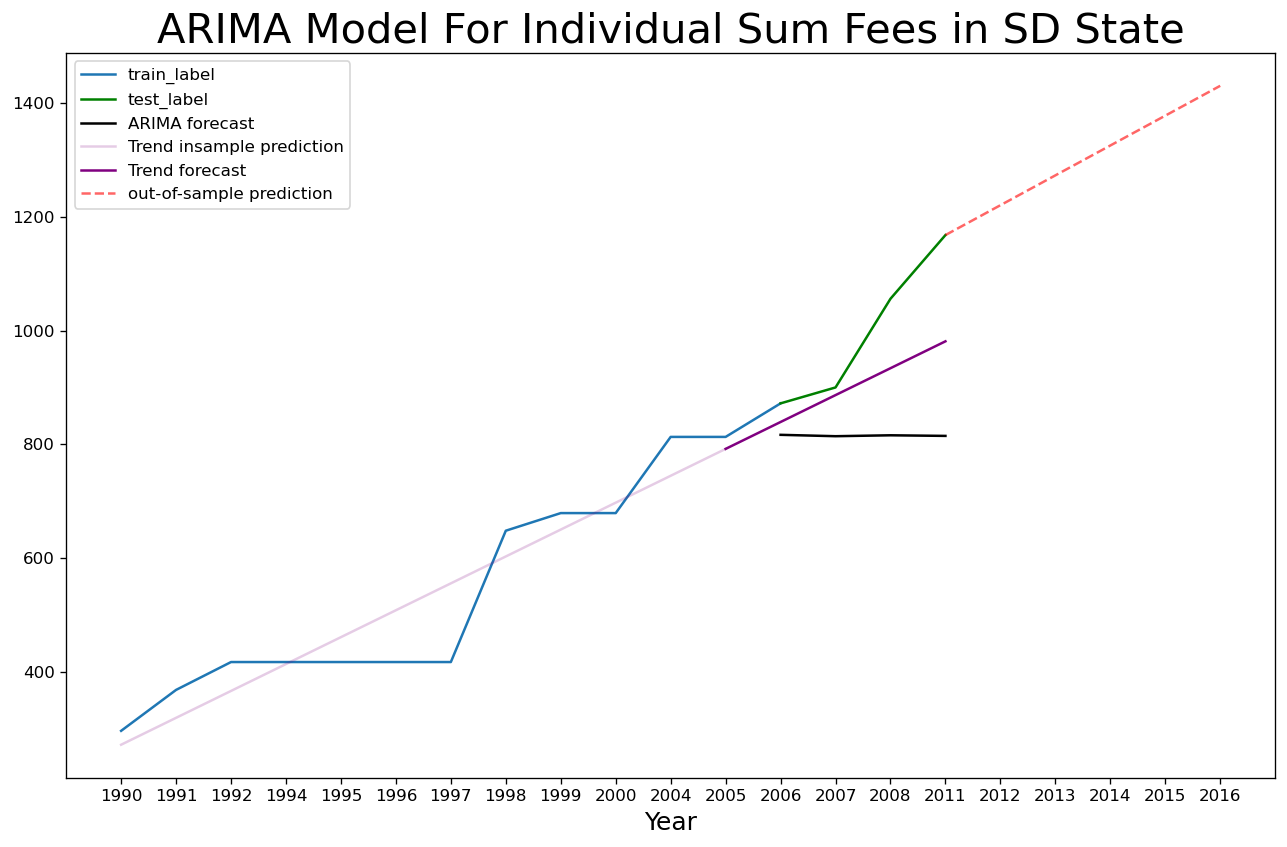

In [121]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_SD['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_SD['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_SD)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

NA = 16

series = df_SD['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_SD.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_SD.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_SD)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_SD['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in SD State', fontsize=25)
plt.legend(loc='upper left')

# UT Data

In [122]:
#Prepocessing the data first
df36 = pd.read_csv('UT.csv',index_col=None, header=0)
df36_temp = df36[(df36['liv_arr'] == 'Living alone or with others')]
df36_temp['state_indv_sum'] = df36_temp['state_indv']

temp = df36_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_UT = pd.merge(left=df36,
              right=temp,
              how='left',
              on='year')
df_UT

year state                             liv_arr  sub_cat  combn_indv  \
0   1990    UT         Living alone or with others      NaN      392.00   
1   1991    UT         Living alone or with others      NaN      413.00   
2   1992    UT         Living alone or with others      NaN      427.30   
3   1994    UT         Living alone or with others      NaN      447.00   
4   1994    UT  Living in the household of another      NaN      300.47   
5   1995    UT         Living alone or with others      NaN      458.00   
6   1995    UT  Living in the household of another      NaN      308.47   
7   1996    UT         Living alone or with others      NaN      470.00   
8   1996    UT  Living in the household of another      NaN        3.00   
9   1997    UT         Living alone or with others      NaN      484.00   
10  1997    UT  Living in the household of another      NaN      325.80   
11  1998    UT         Living alone or with others      NaN      494.00   
12  1998    UT  Living in the household of another      NaN      332.47   
13  1999    UT         Living alone or with others      NaN      500.00   
14  1999    UT  Living in the household of another      NaN      336.47   
15  2000    UT         Living alone or with others      NaN      512.00   
16  2000    UT  Living in the household of another      NaN      344.47   
17  2004    UT         Living alone or with others      NaN      564.00   
18  2004    UT  Living in the household of another      NaN      379.13   
19  2005    UT         Living alone or with others      NaN      579.00   
20  2005    UT  Living in the household of another      NaN      389.13   
21  2006    UT         Living alone or with others      NaN      603.00   
22  2006    UT  Living in the household of another      NaN      405.13   
23  2007    UT         Living alone or with others      NaN      623.00   
24  2007    UT  Living in the household of another      NaN      418.47   
25  2008    UT         Living alone or with others      NaN      637.00   
26  2008    UT  Living in the household of another      NaN      427.80   
27  2011    UT         Living alone or with others      NaN      674.00   
28  2011    UT  Living in the household of another      NaN      452.47   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      591.00        6.00      12.00    386.00   579.00         6.0   
1      622.00        6.00      12.00    407.00   610.00         6.0   
2      643.60        5.30      10.60    422.00   633.00         5.3   
3      673.60        1.00       4.60    446.00   669.00         3.6   
4      455.73        3.13       9.73    297.34   446.00         6.6   
5      691.60        0.00       4.60    458.00   687.00         4.6   
6      467.73        3.13       9.73    305.34   458.00         6.6   
7        1.00        0.00       7.00    470.00    -6.00         7.0   
8        6.00        4.00     709.60     -1.00  -703.60       705.6   
9      730.60        0.00       4.60    484.00   726.00         4.6   
10     493.73        3.13       9.73    322.67   484.00         6.6   
11     745.60        0.00       4.60    494.00   741.00         4.6   
12     503.73        3.13       9.73    329.34   494.00         6.6   
13     755.60        0.00       4.60    500.00   751.00         4.6   
14     510.40        3.13       9.73    333.34   500.67         6.6   
15     773.60        0.00       4.60    512.00   769.00         4.6   
16     522.40        3.13       9.73    341.34   512.67         6.6   
17     850.60        0.00       4.60    564.00   846.00         4.6   
18     573.73        3.13       9.73    376.00   564.00         6.6   
19     873.60        0.00       4.60    579.00   869.00         4.6   
20     589.07        3.13       9.73    386.00   579.34         6.6   
21     908.60        0.00       4.60    603.00   904.00         4.6   
22     612.40        3.13       9.73    402.00   602.67         6.6   
23     936.60        0.00       4.60    623.00   

In [123]:
df_UT = df_UT[(df_UT['liv_arr'] == 'Living alone or with others')]
df36 = df_UT[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df36['year'] = df36['year'].apply(str)
df_36 = df36.drop(columns = ['index'])
df_36

year state                      liv_arr  state_indv  state_indv_sum
0   1990    UT  Living alone or with others         6.0             6.0
1   1991    UT  Living alone or with others         6.0             6.0
2   1992    UT  Living alone or with others         5.3             5.3
3   1994    UT  Living alone or with others         1.0             1.0
4   1995    UT  Living alone or with others         0.0             0.0
5   1996    UT  Living alone or with others         0.0             0.0
6   1997    UT  Living alone or with others         0.0             0.0
7   1998    UT  Living alone or with others         0.0             0.0
8   1999    UT  Living alone or with others         0.0             0.0
9   2000    UT  Living alone or with others         0.0             0.0
10  2004    UT  Living alone or with others         0.0             0.0
11  2005    UT  Living alone or with others         0.0             0.0
12  2006    UT  Living alone or with others         0.0             0.0
13  2007    UT  Living alone or with others         0.0             0.0
14  2008    UT  Living alone or with others         0.0             0.0
15  2011    UT  Living alone or with others         0.0             0.0

# VA Data

In [124]:
#Prepocessing the data first
df37 = pd.read_csv('VA.csv',index_col=None, header=0)
df37_temp = df37[(df37['liv_arr'] == 'Adult care residence')|(df37['liv_arr'] == 'Adult family care')]
df37_temp['state_indv_sum'] = df37_temp['state_indv']

temp = df37_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_VA = pd.merge(left=df37,
              right=temp,
              how='left',
              on='year')
df_VA

year state               liv_arr              sub_cat  combn_indv  \
0   1990    VA  Adult care residence  Planning district 8       703.0   
1   1990    VA  Adult care residence      All other areas       616.0   
2   1990    VA     Adult family care  Planning district 8       530.0   
3   1990    VA     Adult family care      All other areas       465.0   
4   1991    VA  Adult care residence  Planning district 8       727.0   
..   ...   ...                   ...                  ...         ...   
59  2008    VA     Adult family care      All other areas      1152.0   
60  2011    VA  Adult care residence  Planning district 8      1360.0   
61  2011    VA  Adult care residence      All other areas      1193.0   
62  2011    VA     Adult family care  Planning district 8      1360.0   
63  2011    VA     Adult family care      All other areas      1193.0   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      1406.0       317.0      827.0     386.0    579.0       510.0   
1      1232.0       230.0      653.0     386.0    579.0       423.0   
2      1060.0       144.0      481.0     386.0    579.0       337.0   
3       930.0        79.0      351.0     386.0    579.0       272.0   
4      1454.0       320.0      844.0     407.0    610.0       524.0   
..        ...         ...        ...       ...      ...         ...   
59     2304.0       515.0     1348.0     637.0    956.0       833.0   
60     2720.0       686.0     1709.0     674.0   1011.0      1023.0   
61     2386.0       519.0     1375.0     674.0   1011.0       856.0   
62     2720.0       686.0     1709.0     674.0   1011.0      1023.0   
63     2386.0       519.0     1375.0     674.0   1011.0       856.0   

    state_diff_dbl  state_indv_sum  
0            False           770.0  
1            False           770.0  
2            False           770.0  
3            False           770.0  
4            False           764.0  
..             ...             ...  
59           False          2382.0  
60           False          2410.0  
61           False          2410.0  
62           False          2410.0  
63           False          2410.0  

[64 rows x 13 columns]

In [125]:
dfVA = df_VA[(df_VA['liv_arr'] == 'Adult care residence') ]

df37 = df_VA[['year','state','liv_arr','state_indv','state_indv_sum']]
df37 = df37.drop_duplicates(subset='year', keep='first').reset_index()
df37['year'] = df37['year'].apply(str)
df_VA= df37.drop(columns = ['index'])
df_VA

year state               liv_arr  state_indv  state_indv_sum
0   1990    VA  Adult care residence       317.0           770.0
1   1991    VA  Adult care residence       320.0           764.0
2   1992    VA  Adult care residence       321.0           756.0
3   1994    VA  Adult care residence       319.0           734.0
4   1995    VA  Adult care residence       347.0           790.0
5   1996    VA  Adult care residence       346.0           763.0
6   1997    VA  Adult care residence       355.0           750.0
7   1998    VA  Adult care residence       394.0           861.0
8   1999    VA  Adult care residence       413.0           914.0
9   2000    VA  Adult care residence       448.0           978.0
10  2004    VA  Adult care residence       464.0          1071.0
11  2005    VA  Adult care residence       507.0          1744.0
12  2006    VA  Adult care residence       596.0          2090.0
13  2007    VA  Adult care residence       657.0          2314.0
14  2008    VA  Adult care residence       676.0          2382.0
15  2011    VA  Adult care residence       686.0          2410.0

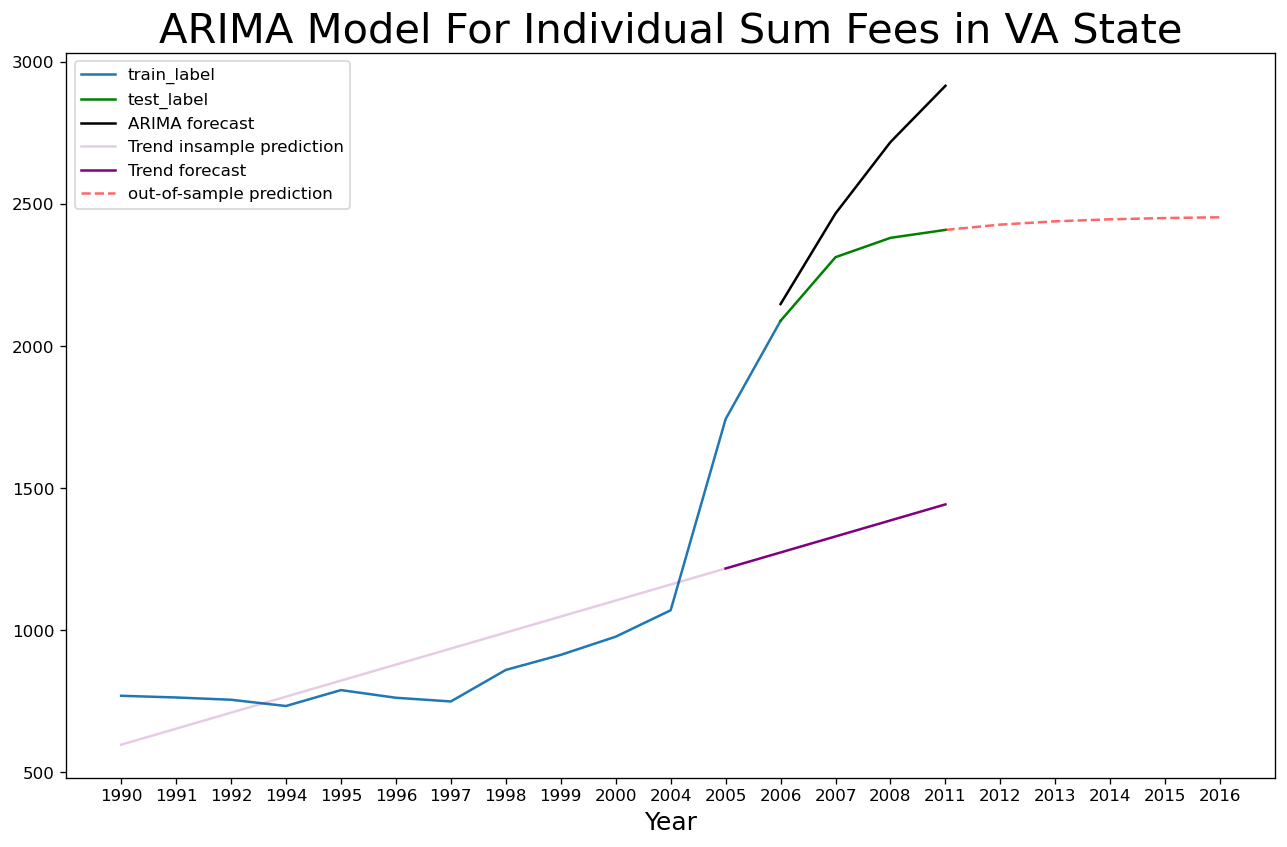

In [126]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_VA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_VA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_VA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_VA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_VA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_VA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_VA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_VA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in VA State', fontsize=25)
plt.legend(loc='upper left')

# VT Data

In [127]:
#Prepocessing the data first
df38 = pd.read_csv('VT.csv',index_col=None, header=0)
df38_temp = df38[(df38['liv_arr'] == 'Living independently')|(df38['liv_arr'] == 'Living in the household of another')|(df38['liv_arr'] == 'Resident care home')]
df38_temp['state_indv_sum'] = df38_temp['state_indv']

temp = df38_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_VT = pd.merge(left=df38,
              right=temp,
              how='left',
              on='year')
df_VT

year state                             liv_arr    sub_cat  combn_indv  \
0    1990    VT                Living independently        NaN      449.10   
1    1990    VT  Living in the household of another        NaN      299.34   
2    1990    VT                  Resident care home  Level III      637.00   
3    1990    VT                  Resident care home   Level IV      598.00   
4    1990    VT          Custodial care/family home        NaN      484.90   
..    ...   ...                                 ...        ...         ...   
113  2011    VT                  Resident care home  Level III      722.38   
114  2011    VT  Living in the household of another        NaN      488.64   
115  2011    VT                  Resident care home   Level IV      897.94   
116  2011    VT          Custodial care/family home        NaN      772.69   
117  2011    VT                   Medicaid facility        NaN       47.66   

     combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0       693.80       63.10     114.80    386.00    579.0       51.70   
1       439.40       42.00      53.40    257.34    386.0       11.40   
2      1138.80      251.00     559.80    386.00    579.0      308.80   
3      1101.20      212.00     522.20    386.00    579.0      310.20   
4       894.20       98.90     315.20    386.00    579.0      216.30   
..         ...         ...        ...       ...      ...         ...   
113    1107.77       48.38      96.77    674.00   1011.0       48.39   
114     722.31       39.30      48.31    449.34    674.0        9.01   
115    1573.06      223.94     562.06    674.00   1011.0      338.12   
116    1343.82       98.69     332.82    674.00   1011.0      234.13   
117      95.33       17.66      35.33     30.00     60.0       17.67   

     state_diff_dbl  state_indv_sum  
0             False          568.10  
1             False          568.10  
2             False          568.10  
3             False          568.10  
4             False          568.10  
..              ...             ...  
113           False          363.66  
114           False          363.66  
115           False          363.66  
116           False          363.66  
117           False          363.66  

[118 rows x 13 columns]

In [128]:
df_VT =df_VT[(df_VT['liv_arr'] == 'Living independently') ]

df38 = df_VT[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
#df23 = df23.drop_duplicates(subset='year', keep='first').reset_index()
df38['year'] = df38['year'].apply(str)
df_VT = df38.drop(columns = ['index'])
df_VT

year state               liv_arr  state_indv  state_indv_sum
0   1990    VT  Living independently       63.10          568.10
1   1991    VT  Living independently       64.99          585.14
2   1992    VT  Living independently       64.99          585.14
3   1994    VT  Living independently       54.87          548.03
4   1995    VT  Living independently       59.41          564.69
5   1996    VT  Living independently       47.41          521.84
6   1997    VT  Living independently       54.91          548.19
7   1998    VT  Living independently       54.91          548.19
8   1999    VT  Living independently       54.91          548.19
9   2000    VT  Living independently       57.66          361.98
10  2004    VT  Living independently       52.04          363.66
11  2005    VT  Living independently       52.04          363.66
12  2006    VT  Living independently       52.04          363.66
13  2007    VT  Living independently       52.04          363.66
14  2008    VT  Living independently       52.04          363.66
15  2011    VT  Living independently       52.04          363.66

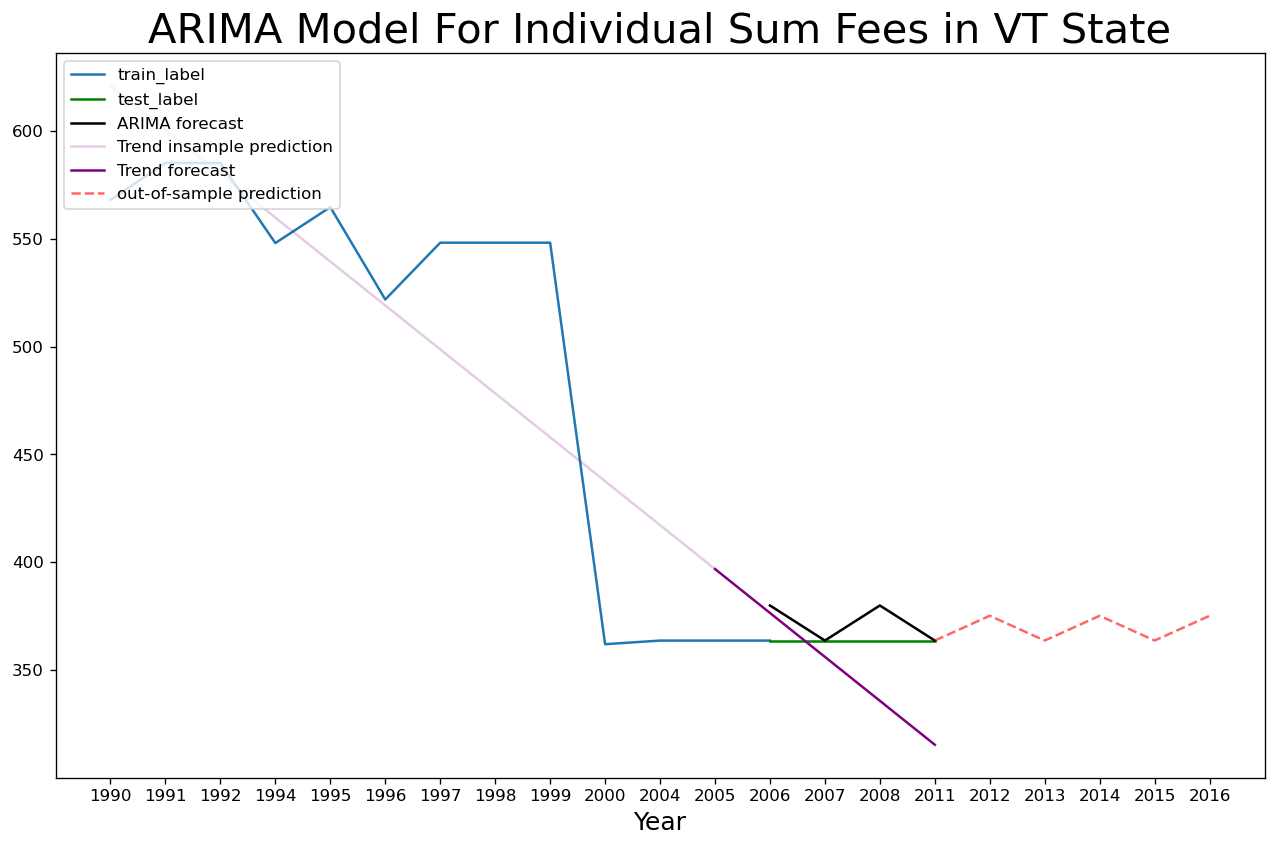

In [129]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_VT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_VT['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_VT)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_VT['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_VT.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_VT.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_VT)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_VT['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in VT State', fontsize=25)
plt.legend(loc='upper left')

# WA Data

In [130]:
#Prepocessing the data first
df39 = pd.read_csv('WA.csv',index_col=None, header=0)
df39_temp = df39[(df39['liv_arr'] == 'Living independently')|(df39['liv_arr'] == 'Living with ineligible spouse')|(df39['liv_arr'] == 'Living in household of another')|(df39['liv_arr'] == 'Living in household of another with ineligible spouse')|(df39['liv_arr'] == 'Living with one essential person')]
df39_temp['state_indv_sum'] = df39_temp['state_indv']

temp = df39_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_WA = pd.merge(left=df39,
              right=temp,
              how='left',
              on='year')
df_WA

year state                                            liv_arr sub_cat  \
0    1990    WA                               Living independently  Area 1   
1    1990    WA                               Living independently  Area 2   
2    1990    WA                      Living with ineligible spouse  Area 1   
3    1990    WA                      Living with ineligible spouse  Area 2   
4    1990    WA                     Living in household of another     NaN   
..    ...   ...                                                ...     ...   
137  2011    WA                      Living with ineligible spouse  Area 1   
138  2011    WA                      Living with ineligible spouse  Area 2   
139  2011    WA                     Living in household of another     NaN   
140  2011    WA  Living in household of another with ineligible...     NaN   
141  2011    WA                                  Medicaid facility     NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        414.00     601.00       28.00      22.00    386.00    579.0   
1        393.55     579.00        7.55       0.00    386.00    579.0   
2        578.00       0.00      192.00       0.00    386.00      0.0   
3        546.15       0.00      160.15       0.00    386.00      0.0   
4        263.15     392.30        5.81       6.30    257.34    386.0   
..          ...        ...         ...        ...       ...      ...   
137      720.00       0.00       46.00       0.00    674.00      0.0   
138      720.00       0.00       46.00       0.00    674.00      0.0   
139      495.34     766.00       46.00      92.00    449.34    674.0   
140      495.34       0.00       46.00       0.00    449.34      0.0   
141       57.28     107.36       27.28      47.36     30.00     60.0   

     state_diff  state_diff_dbl  state_indv_sum  
0         -6.00           False          535.14  
1         -7.55           False          535.14  
2       -192.00           False          535.14  
3       -160.15           False          535.14  
4          0.49           False          535.14  
..          ...             ...             ...  
137      -46.00           False          276.00  
138      -46.00           False          276.00  
139       46.00            True          276.00  
140      -46.00           False          276.00  
141       20.08           False          276.00  

[142 rows x 13 columns]

In [131]:
df_WA = df_WA[(df_WA['liv_arr'] == 'Living independently') ]

df39 = df_WA[['year','state','liv_arr','state_indv','state_indv_sum']]
df39 = df39.drop_duplicates(subset='year', keep='first').reset_index()
df39['year'] = df39['year'].apply(str)
df_WA = df39.drop(columns = ['index'])
df_WA

year state               liv_arr  state_indv  state_indv_sum
0   1990    WA  Living independently       28.00          535.14
1   1991    WA  Living independently       28.00          535.14
2   1992    WA  Living independently       28.00          535.14
3   1994    WA  Living independently       28.00          535.14
4   1995    WA  Living independently       28.00          473.57
5   1996    WA  Living independently       25.42          430.01
6   1997    WA  Living independently       28.00          473.57
7   1998    WA  Living independently       27.00          466.57
8   1999    WA  Living independently       27.00          466.57
9   2000    WA  Living independently       27.00          466.57
10  2004    WA  Living independently       25.90          438.97
11  2005    WA  Living independently       25.90          438.97
12  2006    WA  Living independently       46.00          276.00
13  2007    WA  Living independently       46.00          276.00
14  2008    WA  Living independently       46.00          276.00
15  2011    WA  Living independently       46.00          276.00

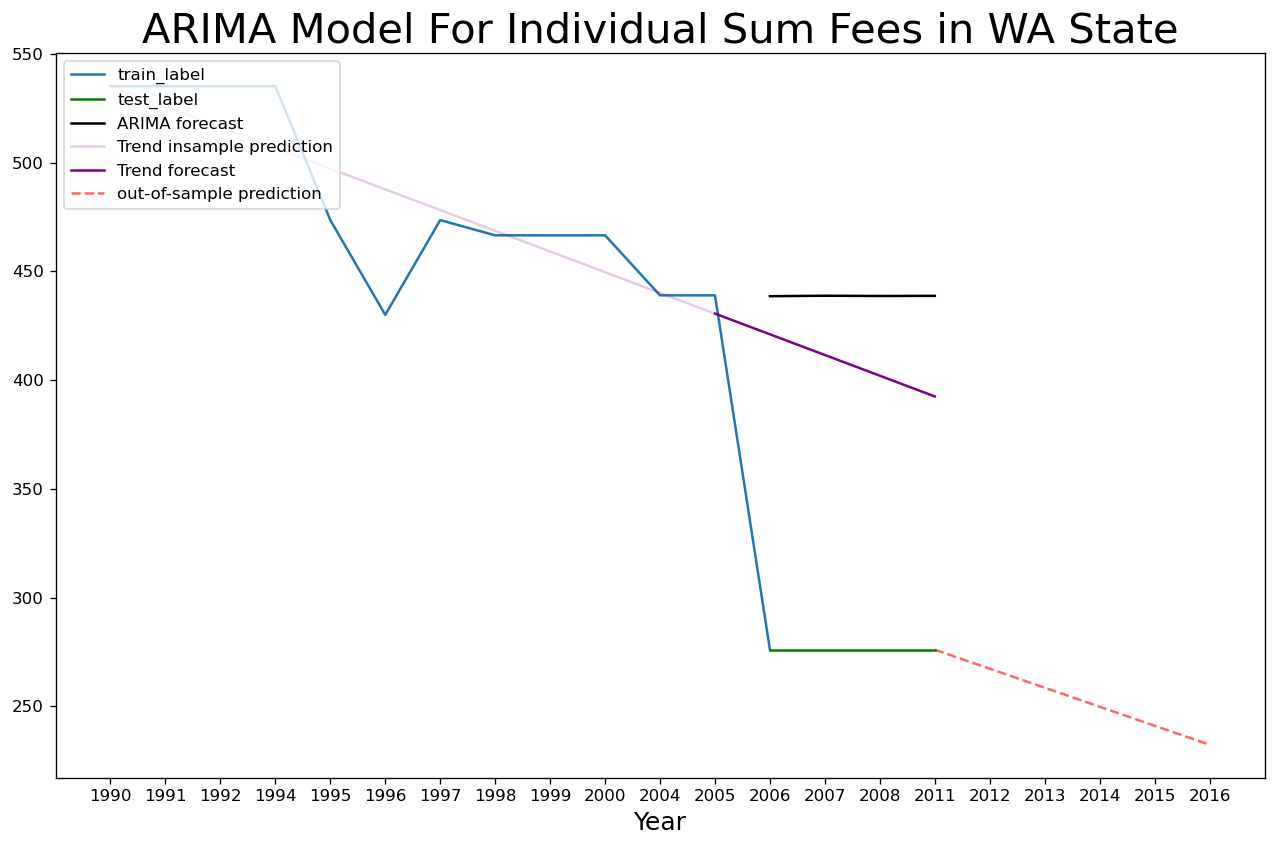

In [132]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_WA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_WA['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_WA)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_WA['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_WA.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_WA.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_WA)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_WA['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in WA State', fontsize=25)
plt.legend(loc='upper left')

# WI Data

In [133]:
#Prepocessing the data first
df40 = pd.read_csv('WI.csv',index_col=None, header=0)
df40_temp = df40[(df40['liv_arr'] == 'Living independently')|(df40['liv_arr'] == 'Living in household of another')|(df40['liv_arr'] == 'Living independently with an ineligible spouse')|(df40['liv_arr'] == 'Living in household of another with ineligible spouse')|(df40['liv_arr'] == 'Living independently with an essential person')
                |(df40['liv_arr'] == 'Living in household of another with an essential person')|(df40['liv_arr'] == 'Living independently with an ineligible spouse who is an essential person')|(df40['liv_arr'] == 'Living in household of another with an ineligible spouse who is an essential person')]
df40_temp['state_indv_sum'] = df40_temp['state_indv']

temp = df40_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_WI = pd.merge(left=df40,
              right=temp,
              how='left',
              on='year')
df_WI

year state                                            liv_arr sub_cat  \
0    1990    WI                               Living independently     NaN   
1    1990    WI                     Living in household of another     NaN   
2    1990    WI     Living independently with an ineligible spouse     NaN   
3    1990    WI  Living in household of another with ineligible...     NaN   
4    1990    WI                      Private nonmedical group home     NaN   
..    ...   ...                                                ...     ...   
115  2011    WI                               Living independently     NaN   
116  2011    WI                     Living in household of another     NaN   
117  2011    WI     Living independently with an ineligible spouse     NaN   
118  2011    WI  Living in household of another with ineligible...     NaN   
119  2011    WI                      Private nonmedical group home     NaN   

     combn_indv  combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  \
0        488.72     744.86      102.72     165.86    386.00    579.0   
1        360.06     551.86      102.72     165.86    257.34    386.0   
2        540.08       0.00      154.08       0.00    386.00      0.0   
3        411.42       0.00      154.08       0.00    257.34      0.0   
4        589.16    1098.02      203.16     519.02    386.00    579.0   
..          ...        ...         ...        ...       ...      ...   
115      757.78    1143.05       83.78     132.05    674.00   1011.0   
116      533.12     806.05       83.78     132.05    449.34    674.0   
117      804.43       0.00      130.43       0.00    674.00      0.0   
118      584.39       0.00      135.05       0.00    449.34      0.0   
119      853.77    1488.41      179.77     477.41    674.00   1011.0   

     state_diff  state_diff_dbl  state_indv_sum  
0         63.14           False         1027.20  
1         63.14           False         1027.20  
2       -154.08           False         1027.20  
3       -154.08           False         1027.20  
4        315.86           False         1027.20  
..          ...             ...             ...  
115       48.27           False          433.04  
116       48.27           False          433.04  
117     -130.43           False          433.04  
118     -135.05           False          433.04  
119      297.64           False          433.04  

[120 rows x 13 columns]

In [134]:
df_WI = df_WI[(df_WI['liv_arr'] == 'Living independently') ]

df40 = df_WI[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df40['year'] = df40['year'].apply(str)
df_WI = df40.drop(columns = ['index'])
df_WI

year state               liv_arr  state_indv  state_indv_sum
0   1990    WI  Living independently      102.72         1027.20
1   1991    WI  Living independently      102.72         1027.20
2   1992    WI  Living independently       92.72          947.20
3   1994    WI  Living independently       84.70          876.26
4   1995    WI  Living independently       83.78          866.08
5   1996    WI  Living independently       83.78          866.08
6   1997    WI  Living independently       83.78          866.08
7   1998    WI  Living independently       83.78          866.08
8   1999    WI  Living independently       83.78          866.08
9   2000    WI  Living independently       83.78          866.08
10  2004    WI  Living independently       83.78          433.04
11  2005    WI  Living independently       83.78          433.04
12  2006    WI  Living independently       83.78          433.04
13  2007    WI  Living independently       83.78          433.04
14  2008    WI  Living independently       83.78          433.04
15  2011    WI  Living independently       83.78          433.04

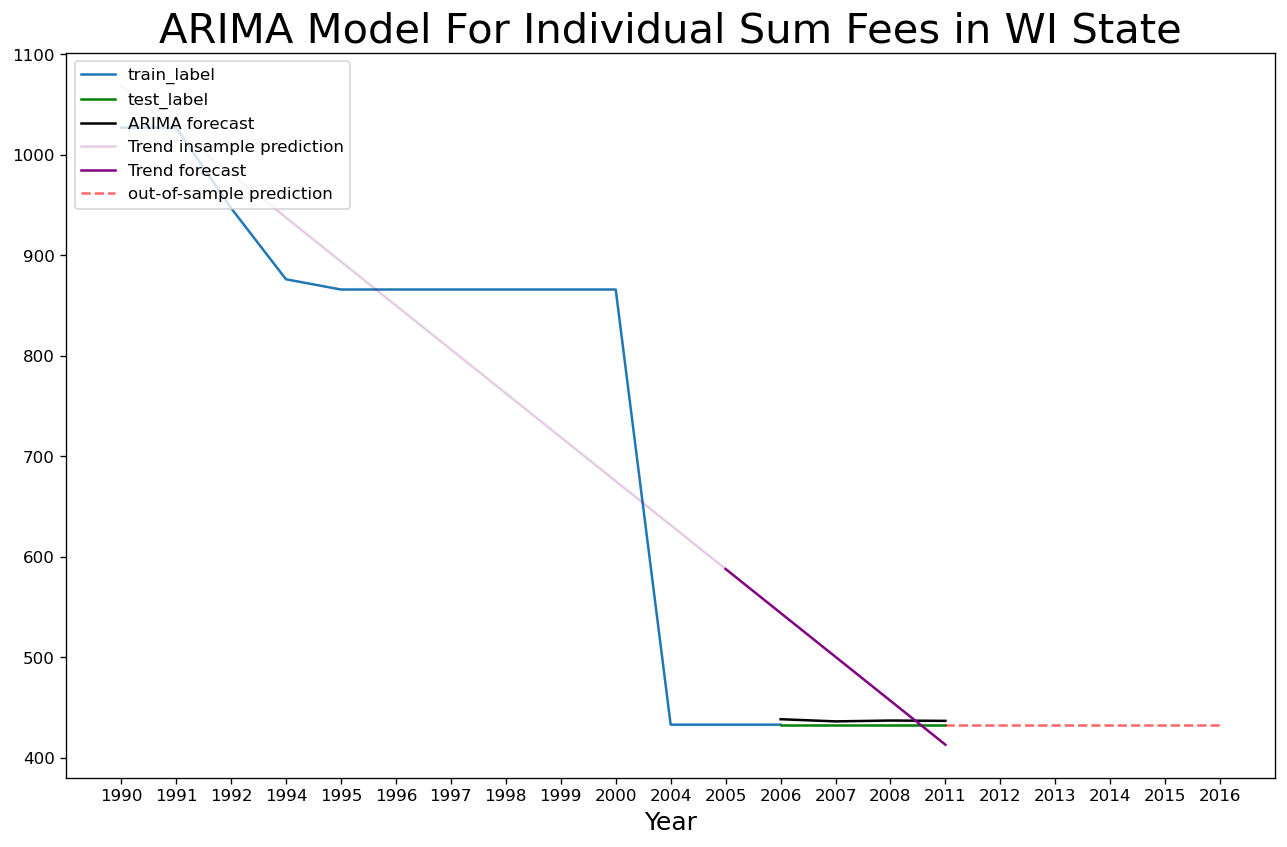

In [135]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_WI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_WI['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_WI)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_WI['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_WI.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_WI.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_WI)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_WI['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in WI State', fontsize=25)
plt.legend(loc='upper left')

# WY Data

In [136]:
#Prepocessing the data first
df41 = pd.read_csv('WY.csv',index_col=None, header=0)
df41_temp = df41[(df41['liv_arr'] == 'Living independently')|(df41['liv_arr'] == 'Living in the household of another')]
df41_temp['state_indv_sum'] = df41_temp['state_indv']

temp = df41_temp[['year','state_indv_sum']].groupby(by='year').sum().reset_index()
df_WY = pd.merge(left=df41,
              right=temp,
              how='left',
              on='year')
df_WY

year state                             liv_arr  sub_cat  combn_indv  \
0   1990    WY                Living independently      NaN      406.00   
1   1990    WY  Living in the household of another      NaN      277.34   
2   1991    WY                Living independently      NaN      427.00   
3   1991    WY  Living in the household of another      NaN      291.34   
4   1992    WY                Living independently      NaN      442.00   
5   1992    WY  Living in the household of another      NaN      301.34   
6   1994    WY                Living independently      NaN      455.70   
7   1994    WY  Living in the household of another      NaN      307.04   
8   1995    WY                Living independently      NaN      467.70   
9   1995    WY  Living in the household of another      NaN      318.47   
10  1996    WY                Living independently      NaN      479.70   
11  1996    WY  Living in the household of another      NaN      326.47   
12  1997    WY                Living independently      NaN      493.70   
13  1997    WY  Living in the household of another      NaN      335.80   
14  1998    WY                Living independently      NaN      503.70   
15  1998    WY  Living in the household of another      NaN      342.47   
16  1999    WY                Living independently      NaN      509.70   
17  1999    WY  Living in the household of another      NaN      346.47   
18  2000    WY                Living independently      NaN      521.90   
19  2000    WY  Living in the household of another      NaN      354.75   
20  2004    WY                Living independently      NaN      573.90   
21  2004    WY  Living in the household of another      NaN      389.41   
22  2005    WY                Living independently      NaN      589.44   
23  2005    WY  Living in the household of another      NaN      399.24   
24  2006    WY                Living independently      NaN      613.44   
25  2006    WY  Living in the household of another      NaN      415.24   
26  2007    WY                Living independently      NaN      648.00   
27  2007    WY  Living in the household of another      NaN      443.14   
28  2008    WY                Living independently      NaN      662.00   
29  2008    WY  Living in the household of another      NaN      452.47   
30  2011    WY                Living independently      NaN      699.00   
31  2011    WY  Living in the household of another      NaN      477.14   

    combn_cpl  state_indv  state_cpl  fed_indv  fed_cpl  state_diff  \
0      619.00       20.00      40.00    386.00   579.00       20.00   
1      426.00       20.00      40.00    257.34   386.00       20.00   
2      650.00       20.00      40.00    407.00   610.00       20.00   
3      446.67       20.00      40.00    271.34   406.67       20.00   
4      673.00       20.00      40.00    422.00   633.00       20.00   
5      462.00       20.00      40.00    281.34   422.00       20.00   
6      688.40        9.70      19.40    446.00   669.00        9.70   
7      465.07        9.70      19.40    297.34   445.67        9.70   
8      711.60        9.70      24.60    458.00   687.00       14.90   
9      487.74       13.13      29.74    305.34   458.00       16.61   
10     729.60        9.70      24.60    470.00   705.00       14.90   
11     499.74       13.13      29.74    313.34   470.00       16.61   
12     750.60        9.70      24.60    484.00   726.00       14.90   
13     513.74       13.13      29.74    322.67   484.00       16.61   
14     765.60        9.70      24.60    494.00   741.00       14.90   
15     523.74       13.13      29.74    329.34   494.00       16.61   
16     775.60        9.70      24.60    500.00   751.00       14.90   
17     530.41       13.13      29.74    333.34   500.67       16.61   
18     794.12        9.90      25.12    512.00   769.00       15.22   
19     543.03       13.41      30.36    341.34   512.67       16.95   
20     871.12        9.90      25.12 

In [137]:
df_WY = df_WY[(df_WY['liv_arr'] == 'Living independently') ]

df41 = df_WY[['year','state','liv_arr','state_indv','state_indv_sum']].reset_index()
df41['year'] = df41['year'].apply(str)
df_WY = df41.drop(columns = ['index'])
df_WY

year state               liv_arr  state_indv  state_indv_sum
0   1990    WY  Living independently       20.00           40.00
1   1991    WY  Living independently       20.00           40.00
2   1992    WY  Living independently       20.00           40.00
3   1994    WY  Living independently        9.70           19.40
4   1995    WY  Living independently        9.70           22.83
5   1996    WY  Living independently        9.70           22.83
6   1997    WY  Living independently        9.70           22.83
7   1998    WY  Living independently        9.70           22.83
8   1999    WY  Living independently        9.70           22.83
9   2000    WY  Living independently        9.90           23.31
10  2004    WY  Living independently        9.90           23.31
11  2005    WY  Living independently       10.44           23.68
12  2006    WY  Living independently       10.44           23.68
13  2007    WY  Living independently       25.00           52.80
14  2008    WY  Living independently       25.00           52.80
15  2011    WY  Living independently       25.00           52.80

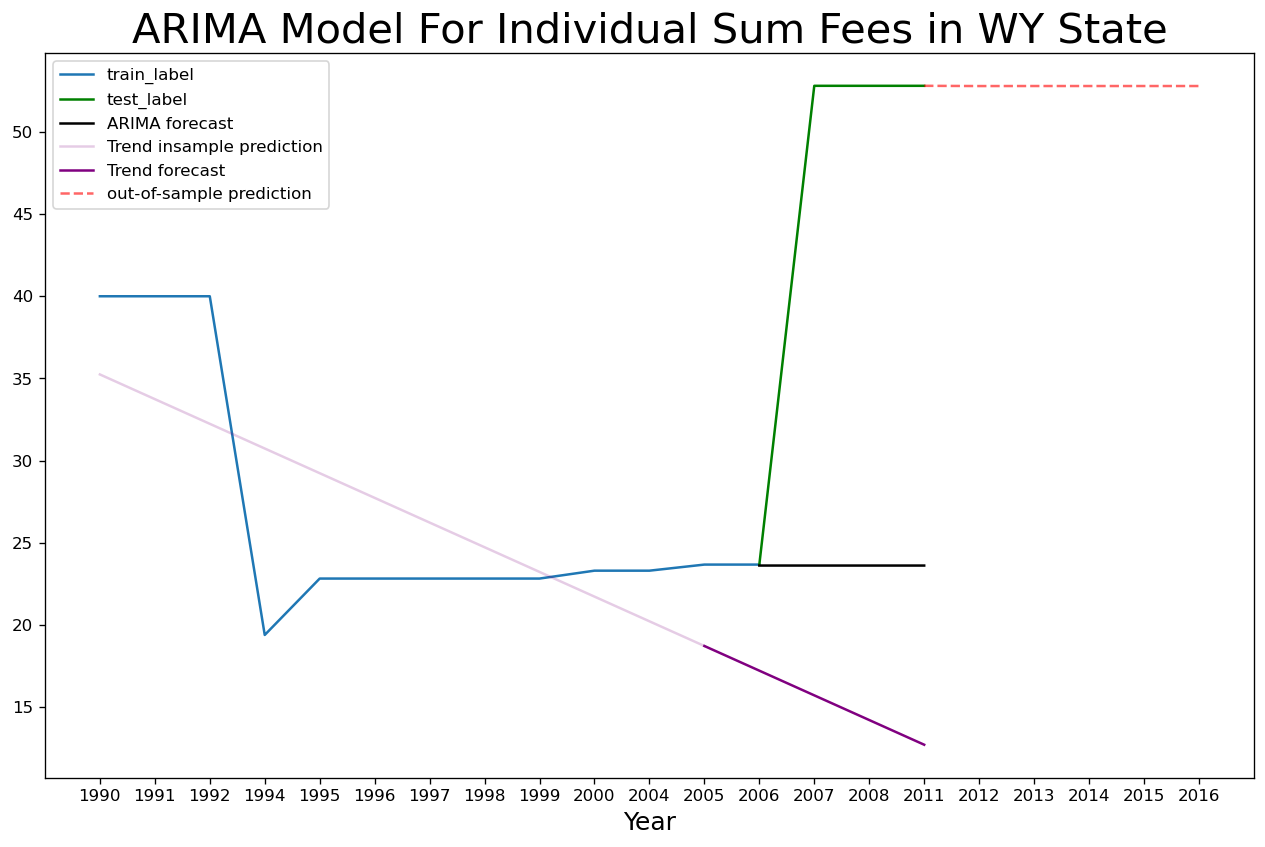

In [138]:
P=1
D=1
Q=1

# fit model
N = 12
series = df_WY['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()


#For X
X = pd.DataFrame(range(N),columns=['year'])
X = sm.add_constant(X)
lm=sm.OLS(df_WY['state_indv_sum'][:N],X).fit()
insample = lm.predict(X)

#For Y
Y = pd.DataFrame(range(N-1,len(df_WY)),columns=['year'])
Y = sm.add_constant(Y)
pred = lm.predict(Y)

#For prediction
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

#For prediction
NA = 16

series = df_WY['state_indv_sum']
model = sm.tsa.arima.ARIMA(series[:NA], order=(P,D,Q))
model_fit = model.fit()

fcast = model_fit.forecast(5, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(5, alpha = 0.5).summary_frame()
fc_seriesA = pd.Series(fc['mean'], index=range(NA,len(series)+5))

#Plot the Graph
plt.rcParams.update({'figure.figsize':(13,8), 'figure.dpi':120})

fig, ax = plt.subplots()

ax.plot(df_WY.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df_WY.index[N:],series[N:],color='green',label='test_label') # test


ax.plot(fc_series, label='ARIMA forecast', color='black')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.2)
ax.plot(range(N-1,len(df_WY)),pred, label='Trend forecast', color='purple')


ax.plot(series[-1:].append(fc_seriesA), label='out-of-sample prediction', color='red',ls='--',alpha = 0.6)# forecast


lst_tmp = list(range(0, 16+5))
ax.set_xticks(lst_tmp)
ax.set_xticklabels(list(df_WY['year'])+[str(i) for i in range(2012,2017)])
plt.xlabel('Year',fontsize=15)
plt.title('ARIMA Model For Individual Sum Fees in WY State', fontsize=25)
plt.legend(loc='upper left')